<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# Logistic Regression on Wine dataset

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Preprocessing](#section3)
4. [Logistic Regression](#section4)<br>
    - 4.1 [Introduction of Logistic Regression](#section401)<br>
    - 4.2 [Mathematics behind Logistic Regression](#section402)<br>
    - 4.3 [Applications of Logistic Regression](#section402)<br>
    - 4.4 [Preparing X and y using pandas](#section403)<br>
    - 4.5 [Splitting X and y into training and test datasets.](#section404)<br>
    - 4.6 [Logistic regression in scikit-learn](#section406)<br>
    - 4.7 [Using the Model for Prediction](#section407)<br>
5. [Model evaluation](#section5)<br>
    - 5.1 [Model Evaluation using accuracy classification score](#section501)<br>
    - 5.2 [Model Evaluation using confusion matrix](#section502)<br> 

<a id=section1></a>

### 1. Problem Statement

The goal is to __predict quality__ of wine amongst the list of red and white wines using __Logistic regression__.


### 2. Data Loading and Description

- The dataset consists of the information about physicochemical tests on the different varieties of wines. Various variables present in the dataset includes data of fixed acidity, volatile acidity, citric acid, ph, alcohol etc. 
- The dataset comprises of (red wine - 1599 observations; white wine - 4898 observations) with 12 columns. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| fixed acidity   | Fixed acidity content                                        | 
| volatile acidity      | Volatile acidity content                         |  
| citric acid        | citric acid content in ml                                          | 
| residual sugar          | Residual sugar content                                         |   
| chlorides           | Chlorides content                                          |
| free sulfur dioxide           | Free sulphur dioxide content                                          |
| total sulfur dioxide         | Total Sulphur dioxide content |
| density         | Density|
| pH        | pH value                                             |
| sulphates         | sulphate content                                          |
| alcohol        | alcohol content in ml                                              |
| quality        | Output Variable - score between 0 and 10                                              |

#### Importing packages                                          

In [0]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()
import os as osObj
from subprocess import check_output
import time
from datetime import datetime

#### Importing the Dataset

In [0]:
#wine_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv")     # Importing training dataset using pd.read_csv

#read the red wine report
file = "https://raw.githubusercontent.com/VenkateshNarayana/WineQuality-Classification/master/winequality-red.csv"

print("Started Reading data from file ..",file)

redwine_data = pd.read_csv(file)     # Importing training dataset using pd.read_csv

print("Reading data completed ..")

#Read the white wine data
file = "https://raw.githubusercontent.com/VenkateshNarayana/WineQuality-Classification/master/winequality-white.csv"
print("Started Reading data from file ..",file)

whitewine_data = pd.read_csv(file) # Importing training dataset using pd.read_csv

print("Reading data completed ..")

Started Reading data from file .. https://raw.githubusercontent.com/VenkateshNarayana/WineQuality-Classification/master/winequality-red.csv
Reading data completed ..
Started Reading data from file .. https://raw.githubusercontent.com/VenkateshNarayana/WineQuality-Classification/master/winequality-white.csv
Reading data completed ..


In [0]:
#Add Type as Red
redwine_data["Type"] = "Red"
redwine_data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


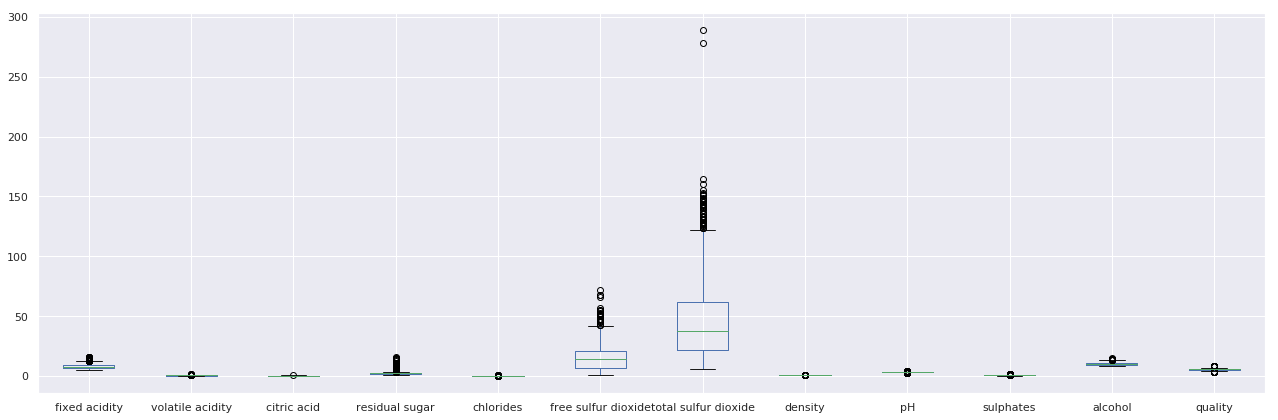

In [0]:
f,ax = plt.subplots(figsize=(22,7))
ax = redwine_data.plot.box(ax=ax)

-Outliers found in **free suphur** , **total sulfur dioxide**,**residual sugar**, **chlorides**, **sulphates**, **citric acid** and **fixed acidity** data

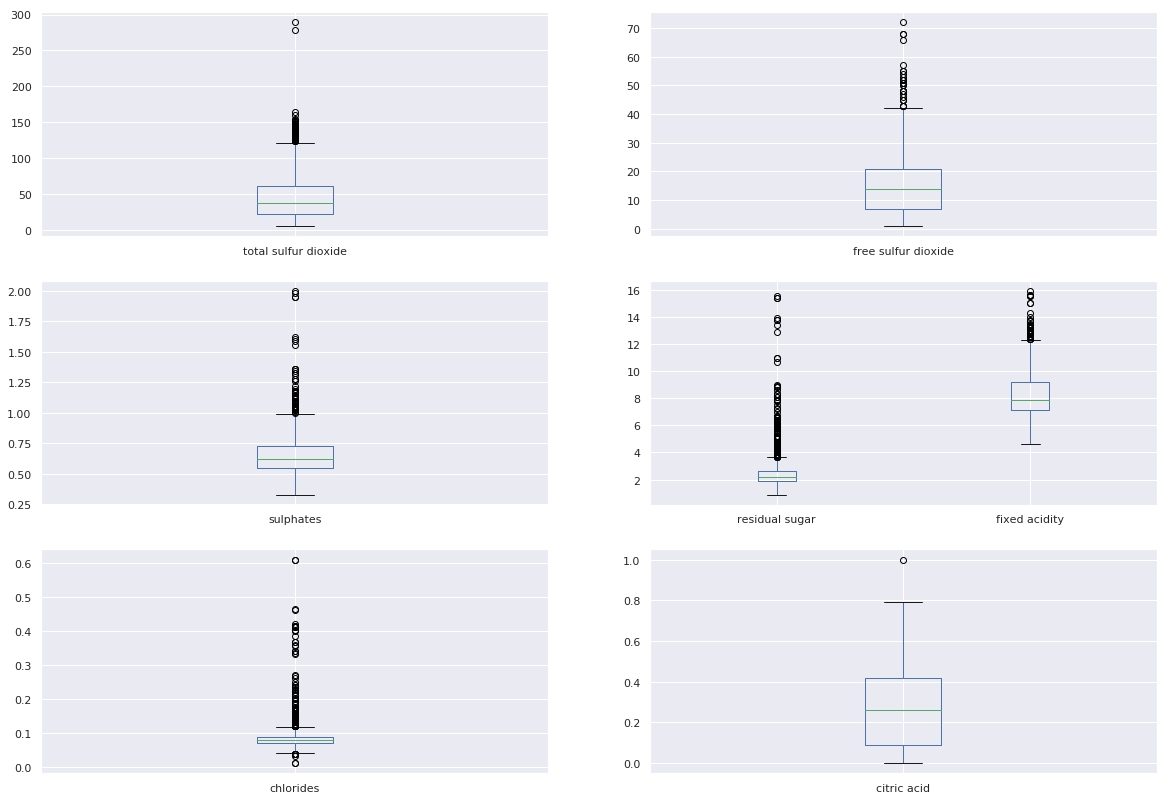

In [0]:
f,ax = plt.subplots(3,2,figsize=(20,14))
ax[0,0] = redwine_data[["total sulfur dioxide"]].plot.box(ax=ax[0,0])
ax[0,1] = redwine_data[["free sulfur dioxide"]].plot.box(ax=ax[0,1])
#ax[0,1] = redwine_data[["residual sugar"]].plot.box(ax=ax[0,1])
ax[1,0] = redwine_data[["sulphates"]].plot.box(ax=ax[1,0])
ax[1,1] = redwine_data[["residual sugar","fixed acidity"]].plot.box(ax=ax[1,1])
ax[2,0] = redwine_data[["chlorides"]].plot.box(ax=ax[2,0])
ax[2,1] = redwine_data[["citric acid"]].plot.box(ax=ax[2,1])


In [0]:
#CLEAN THE REDWINE DATA FOR OUTLIERS
#check for volume of outliers for total sulfur dioxide
colname = "total sulfur dioxide"
outliervalue = 125.0

TotalRedWines = redwine_data[colname].count()
TotalActRedWines = TotalRedWines
print(TotalRedWines)

TotalOutliers = redwine_data[colname][redwine_data[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

#check for volume of outliers for total sulfur dioxide
#TotalTSD_Outliers = redwine_data["total sulfur dioxide"][redwine_data["total sulfur dioxide"]>125].count()
#print(TotalTSD_Outliers)
#print("total sulfur dioxide - outliers percentage=",round(TotalTSD_Outliers/TotalRedWines*100,2))

redwine_datacleaned = redwine_data[redwine_data[colname]<=outliervalue].copy()
print("After clean",redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count())
print("After clean count=",redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

#check for volume of outliers for free sulfur dioxide
colname = "free sulfur dioxide"
outliervalue = 45.0

TotalRedWines = redwine_datacleaned[colname].count()
TotalOutliers = redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

#check for volume of outliers for free sulfur dioxide
#TotalFSD_Outliers = redwine_data["free sulfur dioxide"][redwine_data["free sulfur dioxide"]>45].count()
#print(TotalFSD_Outliers)
#print("free sulfur dioxide - outliers percentage=",round(TotalFSD_Outliers/TotalRedWines*100,2))

redwine_datacleaned = redwine_datacleaned[redwine_datacleaned[colname]<=outliervalue]
print("After clean",redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count())
print("After clean count=",redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

#check for volume of outliers for sulphates
colname = "sulphates"
outliervalue = 1.0

TotalRedWines = redwine_datacleaned[colname].count()
TotalOutliers = redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

#check for volume of outliers for sulphates
#TotalSUL_Outliers = redwine_data[colname][redwine_data[colname]>1].count()
#print(TotalSUL_Outliers)
#print("sulphates - outliers percentage=",round(TotalSUL_Outliers/TotalRedWines*100,2))

redwine_datacleaned = redwine_datacleaned[redwine_datacleaned[colname]<=outliervalue]
print("After clean",redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count())
print("After clean count=",redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

#check for volume of outliers for residual sugar
colname = "residual sugar"
outliervalue = 4.8

TotalRedWines = redwine_datacleaned[colname].count()
TotalOutliers = redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

#check for volume of outliers for residual sugar
#TotalRES_Outliers = redwine_data["residual sugar"][redwine_data["residual sugar"]>4.8].count()
#print(TotalRES_Outliers)
#print("residual sugar - outliers percentage=",round(TotalRES_Outliers/TotalRedWines*100,2))

redwine_datacleaned = redwine_datacleaned[redwine_datacleaned[colname]<=outliervalue]
print("After clean",redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count())
print("After clean count=",redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

#check for volume of outliers for fixed acidity
colname = "fixed acidity"
outliervalue = 12.0

TotalRedWines = redwine_datacleaned[colname].count()
TotalOutliers = redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

#check for volume of outliers for fixed acidity
#TotalFAC_Outliers = redwine_data["fixed acidity"][redwine_data["fixed acidity"]>12].count()
#print(TotalFAC_Outliers)
#print("fixed acidity - outliers percentage=",round(TotalFAC_Outliers/TotalRedWines*100,2))

redwine_datacleaned = redwine_datacleaned[redwine_datacleaned[colname]<=outliervalue]
print("After clean",redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count())
print("After clean count=",redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

#check for volume of outliers for chlorides
colname = "chlorides"
outliervalue = 0.15

TotalRedWines = redwine_datacleaned[colname].count()
TotalOutliers = redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

#check for volume of outliers for chlorides
#TotalCHL_Outliers = redwine_data["chlorides"][redwine_data["chlorides"]>0.15].count()
#print(TotalCHL_Outliers)
#print("chlorides- outliers percentage=",round(TotalCHL_Outliers/TotalRedWines*100,2))

redwine_datacleaned = redwine_datacleaned[redwine_datacleaned[colname]<=outliervalue]
print("After clean",redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count())
print("After clean count=",redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

#check for volume of outliers for citric acid
colname = "citric acid"
outliervalue = 0.8

TotalRedWines = redwine_datacleaned[colname].count()
TotalOutliers = redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

#check for volume of outliers for citric acid
#TotalCAC_Outliers = redwine_data["citric acid"][redwine_data["citric acid"]>0.8].count()
#print(TotalCAC_Outliers)
#print("citric acid - outliers percentage=",round(TotalCAC_Outliers/TotalRedWines*100,2))

redwine_datacleaned = redwine_datacleaned[redwine_datacleaned[colname]<=outliervalue]
print("After clean",redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count())
print("After clean count=",redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

print("Original Count=",TotalActRedWines)
print("After Cleanup Count=",TotalRedWines)
print("After Removal Percentage=",round((TotalActRedWines-TotalRedWines)/TotalActRedWines*100,2))

1599
50
total sulfur dioxide - outliers percentage= 3.13
After clean 0
After clean count= 1549
Removal percentage= 3.13
19
free sulfur dioxide - outliers percentage= 1.23
After clean 0
After clean count= 1530
Removal percentage= 1.23
51
sulphates - outliers percentage= 3.33
After clean 0
After clean count= 1479
Removal percentage= 3.33
66
residual sugar - outliers percentage= 4.46
After clean 0
After clean count= 1413
Removal percentage= 4.46
53
fixed acidity - outliers percentage= 3.75
After clean 0
After clean count= 1360
Removal percentage= 3.75
34
chlorides - outliers percentage= 2.5
After clean 0
After clean count= 1326
Removal percentage= 2.5
0
citric acid - outliers percentage= 0.0
After clean 0
After clean count= 1326
Removal percentage= 0.0
Original Count= 1599
After Cleanup Count= 1326
After Removal Percentage= 17.07


-Removed the Outliers found in **free suphur** , **total sulfur dioxide**,**residual sugar**, **chlorides**, **sulphates**, **citric acid** and **fixed acidity** data

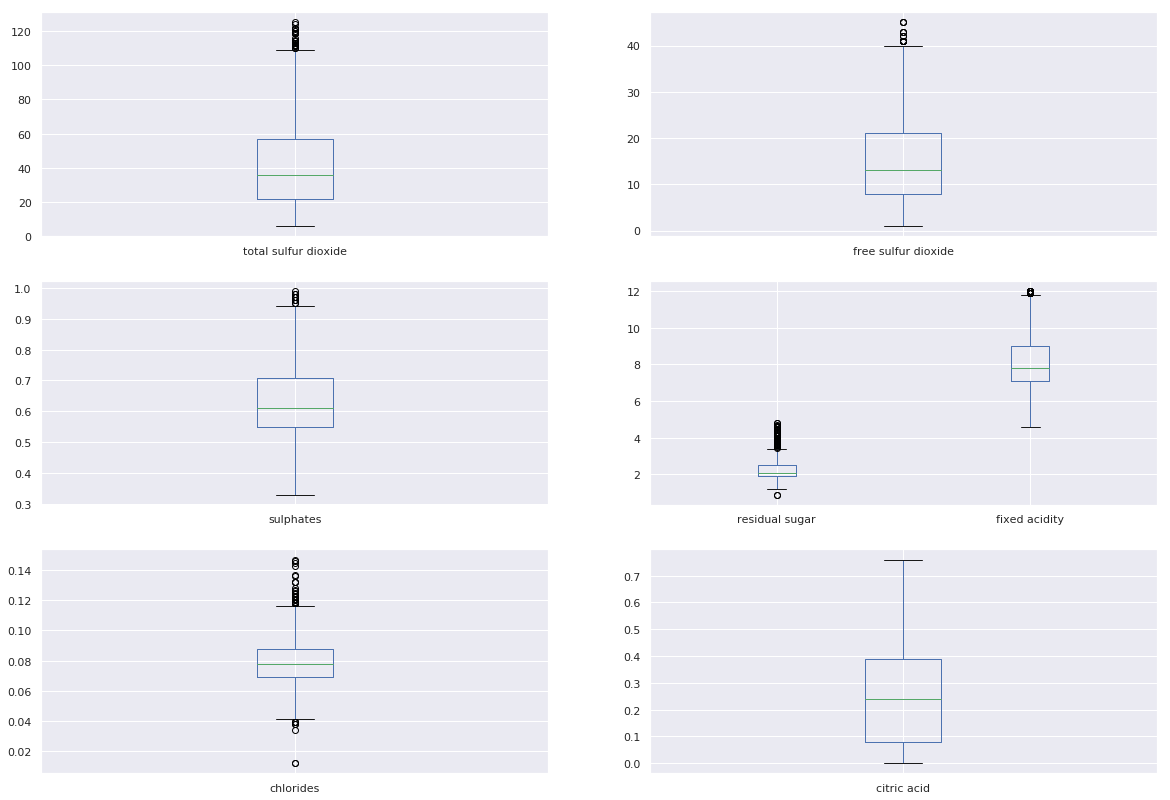

In [0]:
f,ax = plt.subplots(3,2,figsize=(20,14))
ax[0,0] = redwine_datacleaned[["total sulfur dioxide"]].plot.box(ax=ax[0,0])
ax[0,1] = redwine_datacleaned[["free sulfur dioxide"]].plot.box(ax=ax[0,1])
#ax[0,1] = redwine_datacleaned[["residual sugar"]].plot.box(ax=ax[0,1])
ax[1,0] = redwine_datacleaned[["sulphates"]].plot.box(ax=ax[1,0])
ax[1,1] = redwine_datacleaned[["residual sugar","fixed acidity"]].plot.box(ax=ax[1,1])
ax[2,0] = redwine_datacleaned[["chlorides"]].plot.box(ax=ax[2,0])
ax[2,1] = redwine_datacleaned[["citric acid"]].plot.box(ax=ax[2,1])

-Data looks better for **free suphur** , **total sulfur dioxide**,**residual sugar**, **chlorides**, **sulphates**, **citric acid** and **fixed acidity** after removing the outlier data

In [0]:
#Add Type as White
whitewine_data["Type"] = "White"
whitewine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White


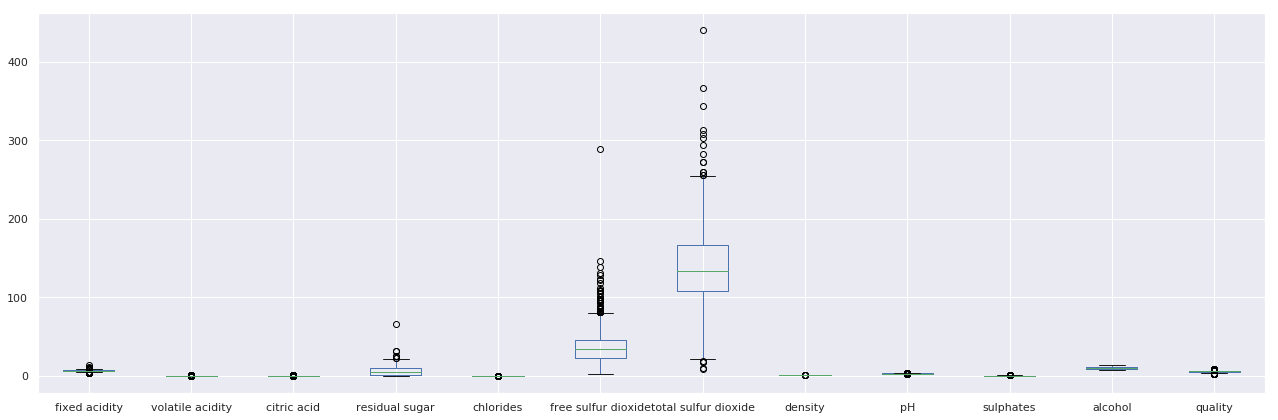

In [0]:
f,ax = plt.subplots(figsize=(22,7))
ax = whitewine_data.plot.box(ax=ax)

-Outliers found in **free suphur** , **total sulfur dioxide**,**residual sugar**, **chlorides**, **sulphates**, **citric acid** and **fixed acidity** data

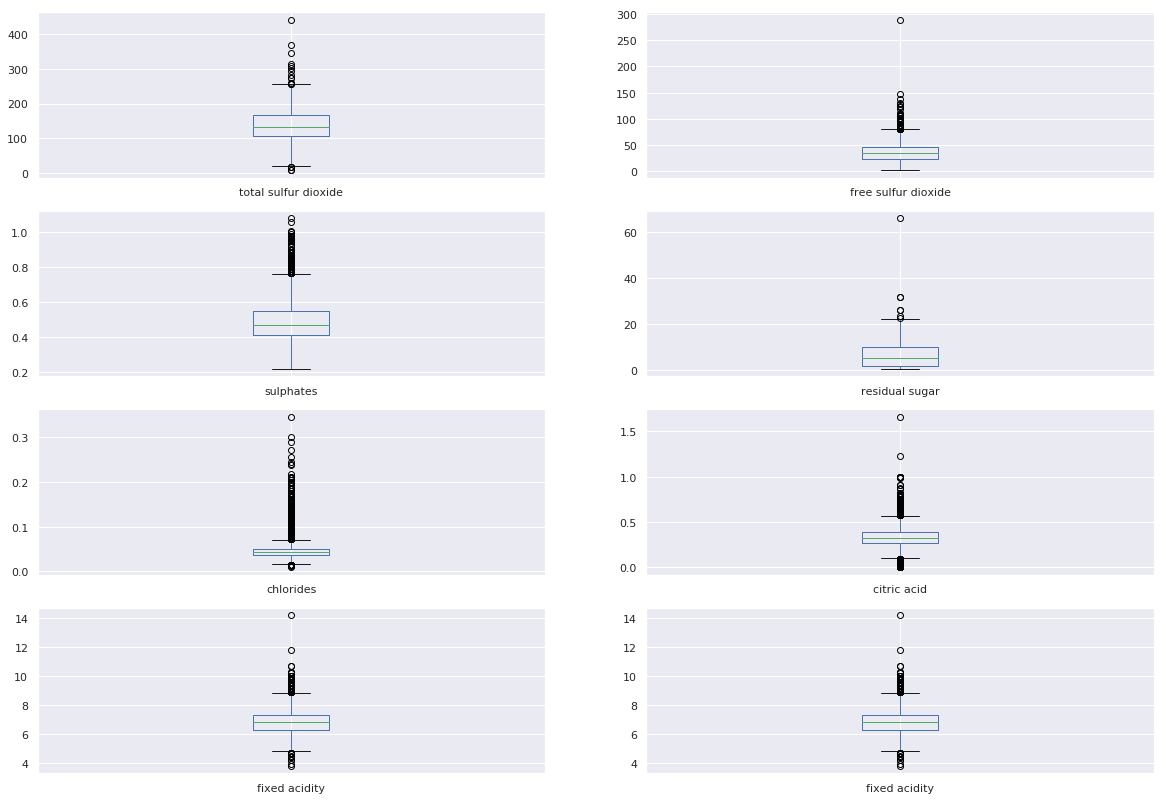

In [0]:
f,ax = plt.subplots(4,2,figsize=(20,14))
ax[0,0] = whitewine_data[["total sulfur dioxide"]].plot.box(ax=ax[0,0])
ax[0,1] = whitewine_data[["free sulfur dioxide"]].plot.box(ax=ax[0,1])
#ax[0,1] = whitewine_data[["residual sugar"]].plot.box(ax=ax[0,1])
ax[1,0] = whitewine_data[["sulphates"]].plot.box(ax=ax[1,0])
ax[1,1] = whitewine_data[["residual sugar"]].plot.box(ax=ax[1,1])
ax[2,0] = whitewine_data[["chlorides"]].plot.box(ax=ax[2,0])
ax[2,1] = whitewine_data[["citric acid"]].plot.box(ax=ax[2,1])
ax[3,0] = whitewine_data[["fixed acidity"]].plot.box(ax=ax[3,0])
ax[3,1] = whitewine_data[["fixed acidity"]].plot.box(ax=ax[3,1])


In [0]:
#CLEAN THE WHITE WINE DATA FOR OUTLIERS
#check for volume of outliers for total sulfur dioxide
colname = "total sulfur dioxide"
outliervalue = 260.0

TotalRedWines = whitewine_data[colname].count()
TotalActRedWines = TotalRedWines
print(TotalRedWines)

TotalOutliers = whitewine_data[colname][whitewine_data[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

#check for volume of outliers for total sulfur dioxide
#TotalTSD_Outliers = whitewine_data["total sulfur dioxide"][whitewine_data["total sulfur dioxide"]>125].count()
#print(TotalTSD_Outliers)
#print("total sulfur dioxide - outliers percentage=",round(TotalTSD_Outliers/TotalRedWines*100,2))

whitewine_datacleaned = whitewine_data[whitewine_data[colname]<=outliervalue].copy()
print("After clean",whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count())
print("After clean count=",whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

#check for volume of outliers for free sulfur dioxide
colname = "free sulfur dioxide"
outliervalue = 80.0

TotalRedWines = whitewine_datacleaned[colname].count()
TotalOutliers = whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

#check for volume of outliers for free sulfur dioxide
#TotalFSD_Outliers = whitewine_data["free sulfur dioxide"][whitewine_data["free sulfur dioxide"]>45].count()
#print(TotalFSD_Outliers)
#print("free sulfur dioxide - outliers percentage=",round(TotalFSD_Outliers/TotalRedWines*100,2))

whitewine_datacleaned = whitewine_datacleaned[whitewine_datacleaned[colname]<=outliervalue]
print("After clean",whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count())
print("After clean count=",whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

#check for volume of outliers for sulphates
colname = "sulphates"
outliervalue = 0.7

TotalRedWines = whitewine_datacleaned[colname].count()
TotalOutliers = whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

#check for volume of outliers for sulphates
#TotalSUL_Outliers = whitewine_data[colname][whitewine_data[colname]>1].count()
#print(TotalSUL_Outliers)
#print("sulphates - outliers percentage=",round(TotalSUL_Outliers/TotalRedWines*100,2))

whitewine_datacleaned = whitewine_datacleaned[whitewine_datacleaned[colname]<=outliervalue]
print("After clean",whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count())
print("After clean count=",whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

#check for volume of outliers for residual sugar
colname = "residual sugar"
outliervalue = 25.0

TotalRedWines = whitewine_datacleaned[colname].count()
TotalOutliers = whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

#check for volume of outliers for residual sugar
#TotalRES_Outliers = whitewine_data["residual sugar"][whitewine_data["residual sugar"]>4.8].count()
#print(TotalRES_Outliers)
#print("residual sugar - outliers percentage=",round(TotalRES_Outliers/TotalRedWines*100,2))

whitewine_datacleaned = whitewine_datacleaned[whitewine_datacleaned[colname]<=outliervalue]
print("After clean",whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count())
print("After clean count=",whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

#check for volume of outliers for fixed acidity
colname = "fixed acidity"
outliervalue = 9.7

TotalRedWines = whitewine_datacleaned[colname].count()
TotalOutliers = whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

#check for volume of outliers for fixed acidity
#TotalFAC_Outliers = whitewine_data["fixed acidity"][whitewine_data["fixed acidity"]>12].count()
#print(TotalFAC_Outliers)
#print("fixed acidity - outliers percentage=",round(TotalFAC_Outliers/TotalRedWines*100,2))

whitewine_datacleaned = whitewine_datacleaned[whitewine_datacleaned[colname]<=outliervalue]
print("After clean",whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count())
print("After clean count=",whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

#check for volume of outliers for chlorides
colname = "chlorides"
outliervalue = 0.08

TotalRedWines = whitewine_datacleaned[colname].count()
TotalOutliers = whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

#check for volume of outliers for chlorides
#TotalCHL_Outliers = whitewine_data["chlorides"][whitewine_data["chlorides"]>0.15].count()
#print(TotalCHL_Outliers)
#print("chlorides- outliers percentage=",round(TotalCHL_Outliers/TotalRedWines*100,2))

whitewine_datacleaned = whitewine_datacleaned[whitewine_datacleaned[colname]<=outliervalue]
print("After clean",whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count())
print("After clean count=",whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

#check for volume of outliers for citric acid
colname = "citric acid"
outliervalue = 0.65

TotalRedWines = whitewine_datacleaned[colname].count()
TotalOutliers = whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

#check for volume of outliers for citric acid
#TotalCAC_Outliers = whitewine_data["citric acid"][whitewine_data["citric acid"]>0.8].count()
#print(TotalCAC_Outliers)
#print("citric acid - outliers percentage=",round(TotalCAC_Outliers/TotalRedWines*100,2))

whitewine_datacleaned = whitewine_datacleaned[whitewine_datacleaned[colname]<=outliervalue]
print("After clean",whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count())
print("After clean count=",whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

print("Original Count=",TotalActRedWines)
print("After Cleanup Count=",TotalRedWines)
print("After Removal Percentage=",round((TotalActRedWines-TotalRedWines)/TotalActRedWines*100,2))

4898
10
total sulfur dioxide - outliers percentage= 0.2
After clean 0
After clean count= 4888
Removal percentage= 0.2
46
free sulfur dioxide - outliers percentage= 0.94
After clean 0
After clean count= 4842
Removal percentage= 0.94
240
sulphates - outliers percentage= 4.96
After clean 0
After clean count= 4602
Removal percentage= 4.96
5
residual sugar - outliers percentage= 0.11
After clean 0
After clean count= 4597
Removal percentage= 0.11
20
fixed acidity - outliers percentage= 0.44
After clean 0
After clean count= 4577
Removal percentage= 0.44
158
chlorides - outliers percentage= 3.45
After clean 0
After clean count= 4419
Removal percentage= 3.45
81
citric acid - outliers percentage= 1.83
After clean 0
After clean count= 4338
Removal percentage= 1.83
Original Count= 4898
After Cleanup Count= 4419
After Removal Percentage= 9.78


-Removed the Outliers found in **free suphur** , **total sulfur dioxide**,**residual sugar**, **chlorides**, **sulphates**, **citric acid** and **fixed acidity** data

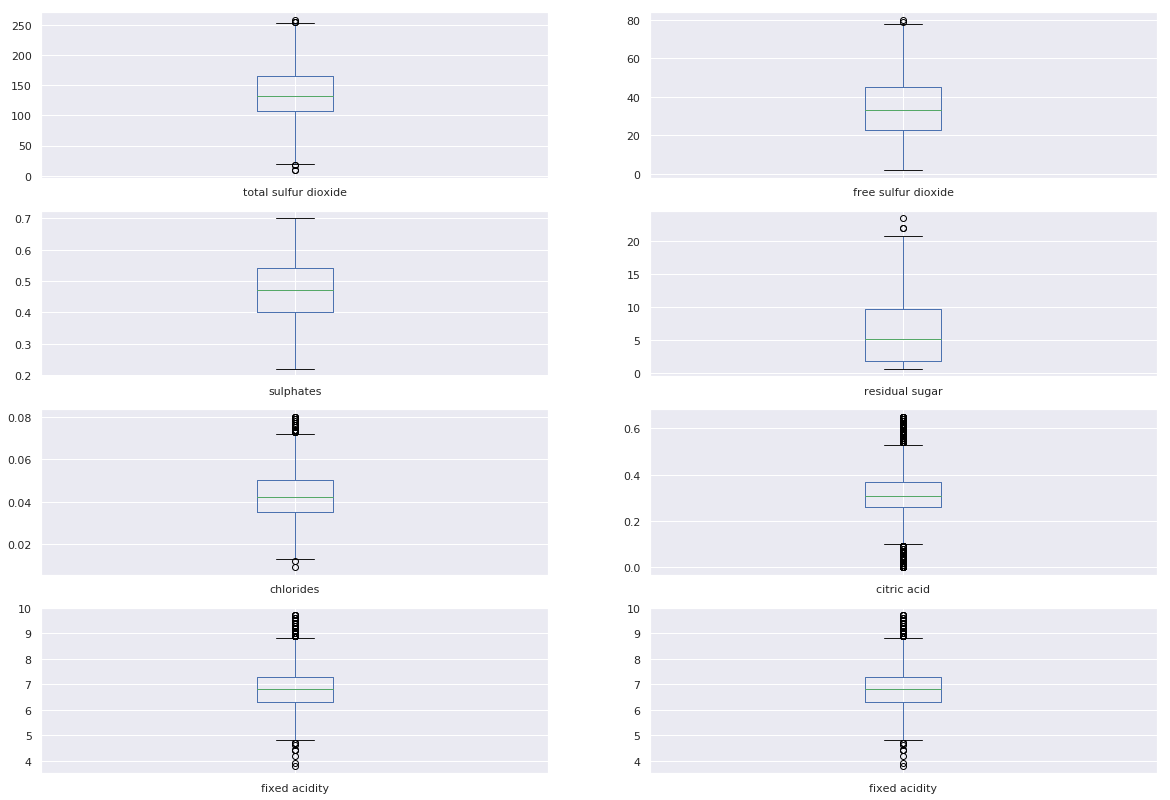

In [0]:
f,ax = plt.subplots(4,2,figsize=(20,14))
ax[0,0] = whitewine_datacleaned[["total sulfur dioxide"]].plot.box(ax=ax[0,0])
ax[0,1] = whitewine_datacleaned[["free sulfur dioxide"]].plot.box(ax=ax[0,1])
#ax[0,1] = whitewine_datacleaned[["residual sugar"]].plot.box(ax=ax[0,1])
ax[1,0] = whitewine_datacleaned[["sulphates"]].plot.box(ax=ax[1,0])
ax[1,1] = whitewine_datacleaned[["residual sugar"]].plot.box(ax=ax[1,1])
ax[2,0] = whitewine_datacleaned[["chlorides"]].plot.box(ax=ax[2,0])
ax[2,1] = whitewine_datacleaned[["citric acid"]].plot.box(ax=ax[2,1])
ax[3,0] = whitewine_datacleaned[["fixed acidity"]].plot.box(ax=ax[3,0])
ax[3,1] = whitewine_datacleaned[["fixed acidity"]].plot.box(ax=ax[3,1])

-Data look better after removing Outliers found in **free suphur** , **total sulfur dioxide**,**residual sugar**, **chlorides**, **sulphates**, **citric acid** and **fixed acidity** data

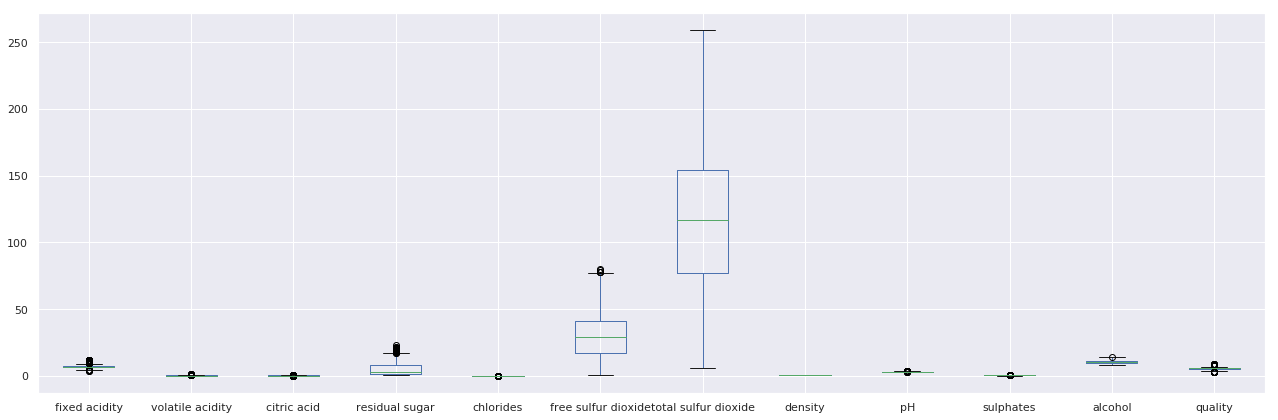

In [0]:
wine_data = pd.concat([redwine_datacleaned, whitewine_datacleaned], ignore_index=True)
f,ax = plt.subplots(figsize=(22,7))
ax = wine_data.plot.box(ax=ax)

###The distribution looks better after the clean up of outliers. This is also seen in the individual box plots below.

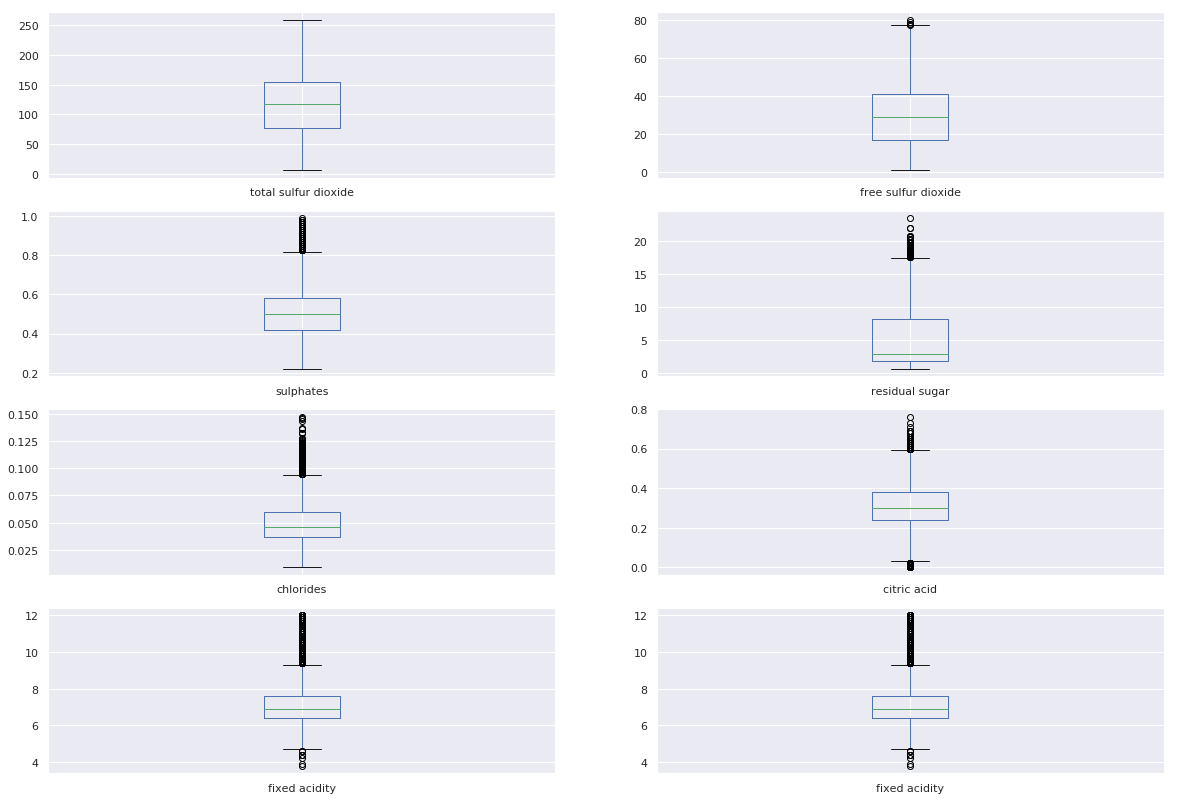

In [0]:
f,ax = plt.subplots(4,2,figsize=(20,14))
ax[0,0] = wine_data[["total sulfur dioxide"]].plot.box(ax=ax[0,0])
ax[0,1] = wine_data[["free sulfur dioxide"]].plot.box(ax=ax[0,1])
ax[1,0] = wine_data[["sulphates"]].plot.box(ax=ax[1,0])
ax[1,1] = wine_data[["residual sugar"]].plot.box(ax=ax[1,1])
ax[2,0] = wine_data[["chlorides"]].plot.box(ax=ax[2,0])
ax[2,1] = wine_data[["citric acid"]].plot.box(ax=ax[2,1])
ax[3,0] = wine_data[["fixed acidity"]].plot.box(ax=ax[3,0])
ax[3,1] = wine_data[["fixed acidity"]].plot.box(ax=ax[3,1])

In [0]:
wine_data = pd.concat([redwine_data, whitewine_data], ignore_index=True)
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,Red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,Red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,Red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,Red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,Red


In [0]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [0]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
Type                    6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


In [0]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Type                    0
dtype: int64

We do not see any Null Values present.Hence data looks clean.

In [0]:
wine_data.skew()

fixed acidity           1.723290
volatile acidity        1.495097
citric acid             0.471731
residual sugar          1.435404
chlorides               5.399828
free sulfur dioxide     1.220066
total sulfur dioxide   -0.001177
density                 0.503602
pH                      0.386839
sulphates               1.797270
alcohol                 0.565718
quality                 0.189623
dtype: float64

In [0]:
#wd_trans=wine_data.transpose()
wd_group = wine_data.groupby(['quality']).mean()
wd_group

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000
4,7.288889,0.457963,0.272315,4.153704,0.060056,20.636574,103.432870,0.994833,3.231620,0.505648,10.180093
5,7.326801,0.389614,0.307722,5.804116,0.064666,30.237371,120.839102,0.995849,3.212189,0.526403,9.837783
6,7.177257,0.313863,0.323583,5.549753,0.054157,31.165021,115.410790,0.994558,3.217726,0.532549,10.587553
7,7.128962,0.288800,0.334764,4.731696,0.045272,30.422150,108.498610,0.993126,3.228072,0.547025,11.386006
8,6.835233,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,0.992514,3.223212,0.512487,11.678756
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


Drawing __pair plot__ to know the joint relationship between __'fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
                     'total sulfur dioxide','density','pH' , 'sulphates' , 'alcohol' & 'qualityclass_Good'__



### observation:
Here, we can see wine data is skewed, quality 5,6 and 7 in majority.




Establishing __coorelation__ between all the features using __heatmap__.

Text(0.5, 1.0, 'Correlation between features')

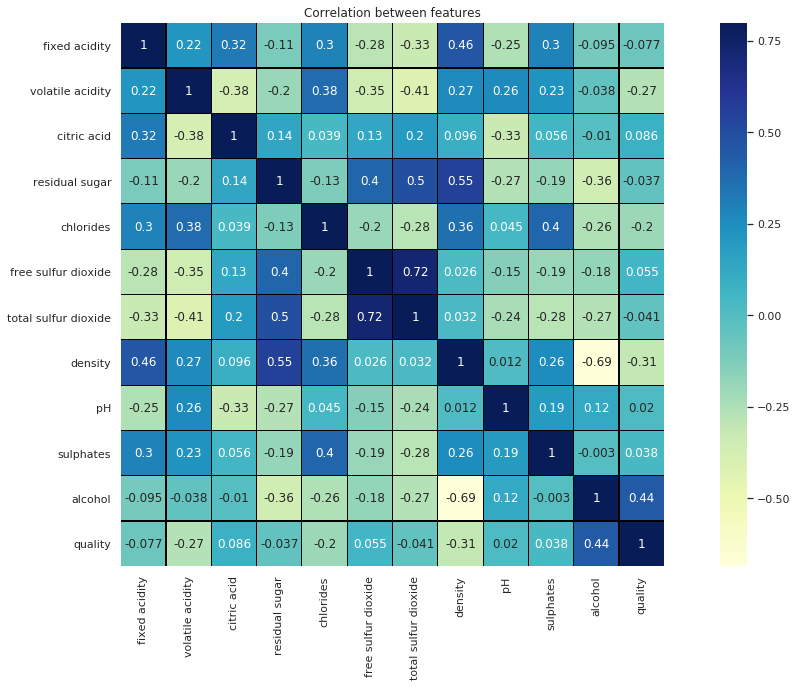

In [0]:
corr = wine_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

- __density, residual sugar,total sulphur dioxide and chlorides__ are negatively corelated with __alcohol.__.
- __total sulphur dioxide is__ positively coorelated with __free sulphur dioxide.__
- With high corelation we face __redundancy__ issues.

## 1) Let us Try a KNN Model , Logistic Regression and Decision Tree- where data is not cleaned for outliers and not scaled and ignoring Type. We try to predict the quality -all quality without any category (poor,good and excellent).

### Prepare the data first 
#### Ignore Type column to remove the type of wine data from prediction 
#### Train-Test split and check for shape of data_train and data_test set

In [0]:
#USE THE non cleaned data and with out TYPE and dont bin the qualityclass
wine_data = pd.concat([redwine_data, whitewine_data], ignore_index=True)

In [0]:
#Ignore the Type column data
temp_wine = wine_data.loc[:,wine_data.columns != 'Type']
temp_wine.skew()
#label quality column
label = temp_wine.pop('quality')

In [0]:
# Train-Test split 
from sklearn.model_selection import train_test_split
#data_train, data_test, label_train, label_test = train_test_split(wine_scale, label, test_size = 0.2, random_state = 42)
data_train, data_test, label_train, label_test = train_test_split(temp_wine, label, test_size = 0.2, random_state = 42)

#check for data_train and date test
print('There are {} samples in the training set and {} samples in the test set'.format(data_train.shape[0], data_test.shape[0]))
print()

There are 5197 samples in the training set and 1300 samples in the test set



##  1.Modelling and prediction (KNN)

#### 1(a) Instantiate K nearest neighbour Classifier
#### 1(b) Fit the model
#### 1(c) Use the model for prediction
#### 1(d) Model evaluation using accuracy score

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski') #p=2 ,Euclidean distance calculation

In [0]:
knn.fit(data_train, label_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [0]:
y_preds = knn.predict(data_test)

In [0]:
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(label_test,y_preds)
print('Accuracy score for the KNN model:', knn_accuracy)

Accuracy score for the KNN model: 0.46615384615384614


###1(e)Trying different neighbour (n) values to see if the accuracy increases

Accuracy score for the KNN model with n_neighbors= 4 : 0.4823076923076923
Accuracy score for the KNN model with n_neighbors= 5 : 0.45384615384615384
Accuracy score for the KNN model with n_neighbors= 6 : 0.4492307692307692
Accuracy score for the KNN model with n_neighbors= 7 : 0.46615384615384614
Accuracy score for the KNN model with n_neighbors= 8 : 0.4676923076923077
Accuracy score for the KNN model with n_neighbors= 9 : 0.46
Accuracy score for the KNN model with n_neighbors= 10 : 0.46153846153846156
Accuracy score for the KNN model with n_neighbors= 11 : 0.46
Accuracy score for the KNN model with n_neighbors= 12 : 0.47307692307692306
Accuracy score for the KNN model with n_neighbors= 13 : 0.46153846153846156


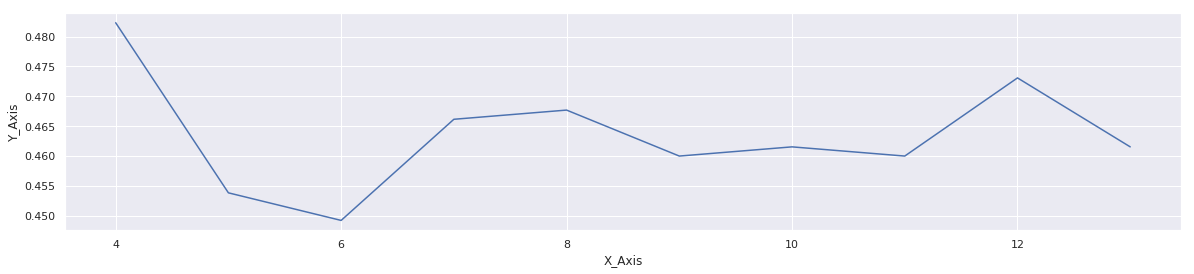

In [0]:
#Check for different neighbours from 5 to 50
xAxis = list()
yAxis = list()
for i in range(4,14,1):
  knn = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski') #p=2 ,Euclidean distance calculation

  #Fit the model
  knn.fit(data_train, label_train)
  xAxis.append(i)
  #Use the model for pridiction
  y_preds = knn.predict(data_test)
  
  #Model evaluation - check the accuracy score
  knn_accuracy = accuracy_score(label_test,y_preds)
  yAxis.append(knn_accuracy)
  print('Accuracy score for the KNN model with n_neighbors=', i,":",knn_accuracy)

linedata = pd.DataFrame({'X_Axis' : xAxis,
                         'Y_Axis' : yAxis})
#print(linedata)
#plot the line graph
fig, ax = plt.subplots(figsize=(20,4))
#sns.set_style("ticks")
sns.set_style("whitegrid")
sns.lineplot(x = 'X_Axis',y = 'Y_Axis', data=linedata,ax=ax)

#store the max accuracy of the KNN model
knn_accuracy = max(yAxis)
#sinplot()

### 1.Modelling and Prediction (Logistic Regression)
### 1(a) Instantiate Logistic Regression
### 1(b) Fit the model
### 1(c) Use the model for prediction
### 1.(d) Model Evaluation using Accuracy score

In [0]:
#Instantiatel Logistic Regression
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()

In [0]:
#Fit the model
logis.fit(data_train, label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#Model Prediction
y_pred = logis.predict(data_test)

In [0]:
#Model Evaluation using Accuracy score
from sklearn.metrics import accuracy_score
logit_accuracy = accuracy_score(label_test,y_pred)
print('Accuracy score for the Logistic model:', logit_accuracy)

Accuracy score for the Logistic model: 0.5223076923076924


## 1.Modelling and Prediction(Decision Tree)
#### 1(a) Instantiate Logistic Regression
#### 1b) Fit the model
#### 1c) Use the model for prediction
#### 1d) Model Evaluation using Accuracy score

In [0]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(random_state = 0)
dtree.fit(data_train, label_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [0]:
from graphviz import Source
graph = Source( tree.export_graphviz(dtree, out_file=None,filled=True, 
                                rounded=True,  
                                special_characters=True, feature_names=temp_wine.columns))
graph.format = 'png'
graph.render('dtree_render',view=True)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.301744 to fit


'dtree_render.png'

In [0]:
#Use the model for prediction
y_pred_tree = dtree.predict(data_test)
print("Instantiated decision tree, fit the model and complete prediction")


Instantiated decision tree, fit the model and complete prediction


In [0]:
#Model evaluation using Accuracy score
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(label_test,y_pred_tree)
print('Accuracy score for the Decision Tree model:', dtree_accuracy)

Accuracy score for the Decision Tree model: 0.5961538461538461


In [0]:
# Decision Tree with Gridsearch
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0)


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(data_train, label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                         

In [0]:
#use the model for prediction
y_pred_tree_cv = grid_search.predict(data_test)

In [0]:
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(label_test,y_pred_tree_cv)
print('Accuracy score for Decision Tree model using grid search is:', dtree_accuracy)

Accuracy score for Decision Tree model using grid search is: 0.5853846153846154


In [0]:
#Model evaluation using confustion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(label_test, y_pred_tree_cv))

#get the quality data
qlty_data = wine_data.quality.unique().tolist()
#print(type(qlty_data))
qlty_data.sort(reverse=False)
#print(qlty_data)
indexName = list()
colName = list()
for quality_no in qlty_data:
  indexName.append('Act ' + str(quality_no))
  colName.append('Pred ' + str(quality_no))
#print(indexName)

#confusion_matrix.index = ['Actual Poor','Actual Good','Actual Excellent']
confusion_matrix.index = indexName
#confusion_matrix.columns = ['Predicted Poor','Predicted Good','Predicted Excellent']
confusion_matrix.columns = colName
print(confusion_matrix)

       Pred 3  Pred 4  Pred 5  Pred 6  Pred 7  Pred 8  Pred 9
Act 3       0       0       4       2       0       0       0
Act 4       0       9      14      13       6       1       0
Act 5       0      16     258     109      16       3       0
Act 6       0      19     142     354      72      10       0
Act 7       0       1      23      58     127       6       0
Act 8       0       0       0      15       8      13       0
Act 9       0       0       0       1       0       0       0


This means 0 + 9 + 258 + 354 + 127 + 13 = __761 correct predictions__ & 36 + 183 + 198 + 102 +20 = __539 false predictions__.

## 1.Model comparison using accuracy score

In [0]:
#models = pd.DataFrame({
#        'Model'          : ['LogReg_W-Outliers_&_WO-Type-QltyBin-UnscaledData', 'kNN_W-Outliers_&_WO-Type-QltyBin-UnscaledData'],
#        'Accuracy_score' : [logit_accuracy, knn_accuracy]
#    })
#
#models.sort_values(by='Accuracy_score', ascending=False)

models = pd.DataFrame({
        'ModelName'         : ['Model 1'],
        'Scaled?'           : ['No'],
        'Outliers?'         : ['Yes'],
        'Include Type?'     : ['No'],
        'Added Qlty Cat?'   : ['No'],
        'Added Wts?'        : ['No'],
        'Logit_score'       : [logit_accuracy],
        'KNN_score'         : [knn_accuracy],
        'DTREE_score'       : [dtree_accuracy]
    
    })
models.sort_values(by='ModelName', ascending=True)

,ModelName,Scaled?,Outliers?,Include Type?,Added Qlty Cat?,Added Wts?,Logit_score,KNN_score,DTREE_score
0,Model 1,No,Yes,No,No,No,0.522308,0.482308,0.585385


####Observation
####Though we see a difference in the accuracy between the Logit and DTREE models the score doesnt seem to be  a good one , however we will keep this as baseline and explore other options.
#### Let us add weights to see if it improves the accuracy

## 1A) Let us add weights for KNN Model , Logistic Regression and Decision Tree- where data is not cleaned for outliers and not scaled and ignoring Type. We try to predict the quality -all quality without any category (poor,good and excellent).


##  1A.Modelling and prediction (KNN)

#### 1A(a) Instantiate K nearest neighbour Classifier
#### 1A(b) Fit the model
#### 1A(c) Use the model for prediction
#### 1A(d) Model evaluation using accuracy score

In [0]:
from sklearn.neighbors import KNeighborsClassifier
#Add weights 
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski',weights = 'distance') #p=2 ,Euclidean distance calculation

In [0]:
knn.fit(data_train, label_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='distance')

In [0]:
y_preds = knn.predict(data_test)

In [0]:
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(label_test,y_preds)
print('Accuracy score for the KNN model:', knn_accuracy)

Accuracy score for the KNN model: 0.583076923076923


###1A(e)Trying different neighbour (n) values to see if the accuracy increases

Accuracy score for the KNN model with n_neighbors= 4 : 0.5661538461538461
Accuracy score for the KNN model with n_neighbors= 5 : 0.573076923076923
Accuracy score for the KNN model with n_neighbors= 6 : 0.5769230769230769
Accuracy score for the KNN model with n_neighbors= 7 : 0.583076923076923
Accuracy score for the KNN model with n_neighbors= 8 : 0.5784615384615385
Accuracy score for the KNN model with n_neighbors= 9 : 0.583076923076923
Accuracy score for the KNN model with n_neighbors= 10 : 0.5823076923076923
Accuracy score for the KNN model with n_neighbors= 11 : 0.5853846153846154
Accuracy score for the KNN model with n_neighbors= 12 : 0.5930769230769231
Accuracy score for the KNN model with n_neighbors= 13 : 0.6015384615384616
Accuracy score for the KNN model with n_neighbors= 14 : 0.5969230769230769
Accuracy score for the KNN model with n_neighbors= 15 : 0.6015384615384616
Accuracy score for the KNN model with n_neighbors= 16 : 0.5976923076923077
Accuracy score for the KNN model w

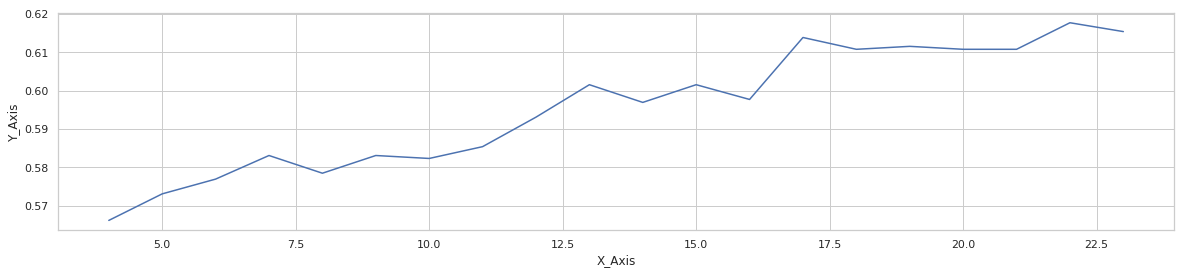

In [0]:
#Check for different neighbours from 5 to 50
xAxis = list()
yAxis = list()
for i in range(4,24,1):
  knn = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski',weights = 'distance') #p=2 ,Euclidean distance calculation

  #Fit the model
  knn.fit(data_train, label_train)
  xAxis.append(i)
  #Use the model for pridiction
  y_preds = knn.predict(data_test)
  
  #Model evaluation - check the accuracy score
  knn_accuracy = accuracy_score(label_test,y_preds)
  yAxis.append(knn_accuracy)
  print('Accuracy score for the KNN model with n_neighbors=', i,":",knn_accuracy)

linedata = pd.DataFrame({'X_Axis' : xAxis,
                         'Y_Axis' : yAxis})
#print(linedata)
#plot the line graph
fig, ax = plt.subplots(figsize=(20,4))
#sns.set_style("ticks")
sns.set_style("whitegrid")
sns.lineplot(x = 'X_Axis',y = 'Y_Axis', data=linedata,ax=ax)

#store the max accuracy of the KNN model
knn_accuracy = max(yAxis)
#sinplot()

### 1A.Modelling and Prediction (Logistic Regression)
### 1A(a) Instantiate Logistic Regression
### 1A(b) Fit the model
### 1A(c) Use the model for prediction
### 1A(d) Model Evaluation using Accuracy score

In [0]:
#Instantiatel Logistic Regression
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression(class_weight='balanced')


In [0]:
#Fit the model
logis.fit(data_train, label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#Model Prediction
y_pred = logis.predict(data_test)

In [0]:
#Model Evaluation using Accuracy score
from sklearn.metrics import accuracy_score
logit_accuracy = accuracy_score(label_test,y_pred)
print('Accuracy score for the Logistic model:', logit_accuracy)

Accuracy score for the Logistic model: 0.44153846153846155


####1A(e). Model evaluation using confusion matrix

In [0]:
#Model evaluation using confustion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(label_test, y_pred))

#get the quality data
qlty_data = wine_data.quality.unique().tolist()
#print(type(qlty_data))
qlty_data.sort(reverse=False)
#print(qlty_data)
indexName = list()
colName = list()
for quality_no in qlty_data:
  indexName.append('Act ' + str(quality_no))
  colName.append('Pred ' + str(quality_no))
#print(indexName)

#confusion_matrix.index = ['Actual Poor','Actual Good','Actual Excellent']
confusion_matrix.index = indexName
#confusion_matrix.columns = ['Predicted Poor','Predicted Good','Predicted Excellent']
confusion_matrix.columns = colName
print(confusion_matrix)

       Pred 3  Pred 4  Pred 5  Pred 6  Pred 7  Pred 8  Pred 9
Act 3       1       1       2       1       0       0       1
Act 4       8       7      17       7       4       0       0
Act 5      11      27     249      89      13       1      12
Act 6      14      17     188     240      86      16      36
Act 7       2       5      21      70      71      13      33
Act 8       0       1       1       6      13       5      10
Act 9       0       0       0       0       0       0       1


## 1A.Modelling and Prediction(Decision Tree)
#### 1A(a) Instantiate Logistic Regression
#### 1A(b) Fit the model
#### 1A(c) Use the model for prediction
#### 1A(d) Model Evaluation using Accuracy score

In [0]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(random_state = 0,class_weight='balanced')
dtree.fit(data_train, label_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [0]:
from graphviz import Source
graph = Source( tree.export_graphviz(dtree, out_file=None,filled=True, 
                                rounded=True,  
                                special_characters=True, feature_names=temp_wine.columns))
graph.format = 'png'
graph.render('dtree_render',view=True)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.187327 to fit


'dtree_render.png'

In [0]:
#Use the model for prediction
y_pred_tree = dtree.predict(data_test)
print("Instantiated decision tree, fit the model and complete prediction")


Instantiated decision tree, fit the model and complete prediction


In [0]:
#Model evaluation using Accuracy score
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(label_test,y_pred_tree)
print('Accuracy score for the Decision Tree model:', dtree_accuracy)

Accuracy score for the Decision Tree model: 0.6153846153846154


In [0]:
# Decision Tree with Gridsearch
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0,class_weight='balanced')


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(data_train, label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                   

In [0]:
#use the model for prediction
y_pred_tree_cv = grid_search.predict(data_test)

In [0]:
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(label_test,y_pred_tree_cv)
print('Accuracy score for Decision Tree model using grid search is:', dtree_accuracy)

Accuracy score for Decision Tree model using grid search is: 0.6


In [0]:
#Model evaluation using confustion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(label_test, y_pred_tree_cv))

#get the quality data
qlty_data = wine_data.quality.unique().tolist()
#print(type(qlty_data))
qlty_data.sort(reverse=False)
#print(qlty_data)
indexName = list()
colName = list()
for quality_no in qlty_data:
  indexName.append('Act ' + str(quality_no))
  colName.append('Pred ' + str(quality_no))
#print(indexName)

#confusion_matrix.index = ['Actual Poor','Actual Good','Actual Excellent']
confusion_matrix.index = indexName
#confusion_matrix.columns = ['Predicted Poor','Predicted Good','Predicted Excellent']
confusion_matrix.columns = colName
print(confusion_matrix)

       Pred 3  Pred 4  Pred 5  Pred 6  Pred 7  Pred 8  Pred 9
Act 3       0       0       4       1       0       0       1
Act 4       2      12      17       9       3       0       0
Act 5       1      14     261     102      19       5       0
Act 6       1      18     130     371      62      14       1
Act 7       0       1      17      63     120      14       0
Act 8       0       0       1      13       6      16       0
Act 9       0       0       0       0       1       0       0


## 1A.Model comparison using accuracy score

In [0]:
#models = pd.DataFrame({
#        'Model'          : ['LogReg_W-Outliers_&_WO-Type-QltyBin-UnscaledData', 'kNN_W-Outliers_&_WO-Type-QltyBin-UnscaledData'],
#        'Accuracy_score' : [logit_accuracy, knn_accuracy]
#    })
#
#models.sort_values(by='Accuracy_score', ascending=False)

model1A = pd.DataFrame({
        'ModelName'         : ['Model 1A'],
        'Scaled?'           : ['No'],
        'Outliers?'         : ['Yes'],
        'Include Type?'     : ['No'],
        'Added Qlty Cat?'   : ['No'],
        'Added Wts?'        : ['Yes'],
        'Logit_score'       : [logit_accuracy],
        'KNN_score'         : [knn_accuracy],
        'DTREE_score'       : [dtree_accuracy]
    
    })
models = models.append(model1A,ignore_index=True)
models.drop_duplicates(subset = None, keep = 'first', inplace = True) 
models.sort_values(by='ModelName', ascending=True)

models

,ModelName,Scaled?,Outliers?,Include Type?,Added Qlty Cat?,Added Wts?,Logit_score,KNN_score,DTREE_score
0,Model 1,No,Yes,No,No,No,0.522308,0.482308,0.585385
1,Model 1A,No,Yes,No,No,Yes,0.441538,0.617692,0.600000


####Observation
####Though we see an improvement in  accuracy for KNN and DTREE models it is just 60% , hence we keep exploring other options.
####Let us try to see if we add the type and see if it improves the prediction

## 2) Let us Try a KNN Model , Logistic Regression and Decision Tree - where data is not cleaned for outliers and not scaled and include type. We try to predict the quality -all quality without any category (poor,good and excellent).

### Prepare the data first 
#### include Type column for prediction using dummies
#### Train-Test split and check for shape of data_train and data_test set

In [0]:
#USE the not cleaned up data but bin the quality data
#_W-Outliers-QltyBin_&_WO-Type-UnscaledData
wine_data = pd.concat([redwine_data, whitewine_data], ignore_index=True)


In [0]:
wine_data = pd.get_dummies(wine_data, columns=['Type'], drop_first=True)
wine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type_White
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [0]:
#we will use the uncleaned data, no standard scaled data, remove type and predict quality
temp_wine = wine_data.loc[:,wine_data.columns != 'Type']
temp_wine.skew()

#label is quality
label = temp_wine.pop('quality')

In [0]:
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(temp_wine, label, test_size = 0.2, random_state = 42)

print('There are {} samples in the training set and {} samples in the test set'.format(data_train.shape[0], data_test.shape[0]))
print()

There are 5197 samples in the training set and 1300 samples in the test set



##  2.Modelling and prediction(KNN)
### 2(a) Instantiate K nearest neighbour Classifier
### 2(b) Fit the model
### 2(c) Use the model for prediction
### 2(d) Model evaluation using accuracy score

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski') #p=2 ,Euclidean distance calculation
#knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski',weights='distance') #p=2 ,Euclidean distance calculation with added weights

knn.fit(data_train, label_train)

y_preds = knn.predict(data_test)

from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(label_test,y_preds)
print('Accuracy score for the KNN model:', knn_accuracy)

Accuracy score for the KNN model: 0.4646153846153846


### 2(e)Trying different neighbour (n) values to see if the accuracy increases

Accuracy score for the KNN model with n_neighbors= 4 : 0.4808
Accuracy score for the KNN model with n_neighbors= 5 : 0.4531
Accuracy score for the KNN model with n_neighbors= 6 : 0.4462
Accuracy score for the KNN model with n_neighbors= 7 : 0.4646
Accuracy score for the KNN model with n_neighbors= 8 : 0.4677
Accuracy score for the KNN model with n_neighbors= 9 : 0.4592
Accuracy score for the KNN model with n_neighbors= 10 : 0.4631
Accuracy score for the KNN model with n_neighbors= 11 : 0.4585
Accuracy score for the KNN model with n_neighbors= 12 : 0.4731
Accuracy score for the KNN model with n_neighbors= 13 : 0.46
Accuracy score for the KNN model with n_neighbors= 14 : 0.4623
Accuracy score for the KNN model with n_neighbors= 15 : 0.4554
Accuracy score for the KNN model with n_neighbors= 16 : 0.4608
Accuracy score for the KNN model with n_neighbors= 17 : 0.4662
Accuracy score for the KNN model with n_neighbors= 18 : 0.4777
Accuracy score for the KNN model with n_neighbors= 19 : 0.4654


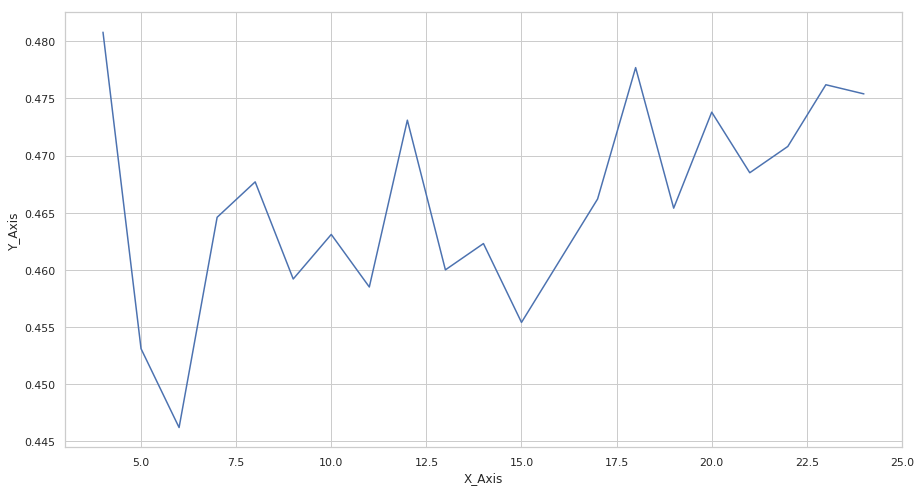

In [0]:
#Check for different neighbours from 4 to 20
xAxis = list()
yAxis = list()
for i in range(4,25,1):
  knn = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski') #p=2 ,Euclidean distance calculation

  #Fit the model
  knn.fit(data_train, label_train)
  xAxis.append(i)
  #Use the model for pridiction
  y_preds = knn.predict(data_test)
  
  #Model evaluation - check the accuracy score
  knn_accuracy = accuracy_score(label_test,y_preds)
  yAxis.append(round(knn_accuracy,4))
  print('Accuracy score for the KNN model with n_neighbors=', i,":",round(knn_accuracy,4))

linedata = pd.DataFrame({'X_Axis' : xAxis,
                         'Y_Axis' : yAxis})
#print(linedata)
#plot the line graph
fig, ax = plt.subplots(figsize=(15,8))
#sns.set_style("ticks")
sns.set_style("whitegrid")
sns.lineplot(x = 'X_Axis',y = 'Y_Axis', data=linedata,ax=ax)

knn_accuracy = max(yAxis)
#sinplot()

## 2. Modelling and Prediction (Logistic Regression)
#### 2(a) Instantiate Logistic Regression
#### 2(b) Fit the model
#### 2(c) Use the model for prediction
#### 2.(d) Model Evaluation using Accuracy score

In [0]:
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()


In [0]:
logis.fit(data_train, label_train)
y_pred = logis.predict(data_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
from sklearn.metrics import accuracy_score
logit_accuracy = accuracy_score(label_test,y_pred)
print('Accuracy score for the Logistic model:', logit_accuracy)

Accuracy score for the Logistic model: 0.5176923076923077


## 2.Modelling and Prediction(Decision Tree)
#### 2(a) Instantiate Logistic Regression
#### 2(b) Fit the model
#### 2(c) Use the model for prediction
#### 2(d) Model Evaluation using Accuracy score

In [0]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(random_state = 0)
dtree.fit(data_train, label_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [0]:
from graphviz import Source
graph = Source( tree.export_graphviz(dtree, out_file=None,filled=True, 
                                rounded=True,  
                                special_characters=True, feature_names=temp_wine.columns))
graph.format = 'png'
graph.render('dtree_render',view=True)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.303092 to fit


'dtree_render.png'

In [0]:
#Use the model for prediction
y_pred_tree = dtree.predict(data_test)
print("Instantiated logistic regression, fit the model and complete prediction")

Instantiated logistic regression, fit the model and complete prediction


In [0]:
#Model evaluation using Accuracy score
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(label_test,y_pred_tree)
print('Accuracy score for the Decision Tree model:', dtree_accuracy)

Accuracy score for the Decision Tree model: 0.5976923076923077


In [0]:
# Decision Tree with Gridsearch
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0)


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            

grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(data_train, label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                         

In [0]:
#use the model for prediction
y_pred_tree_cv = grid_search.predict(data_test)

In [0]:
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(label_test,y_pred_tree_cv)
print('Accuracy score for Decision Tree model using grid search is:',dtree_accuracy )

Accuracy score for Decision Tree model using grid search is: 0.59


In [0]:
#Model evaluation using confustion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(label_test, y_pred_tree_cv))

#get the quality data
qlty_data = wine_data.quality.unique().tolist()
#print(type(qlty_data))
qlty_data.sort(reverse=False)
#print(qlty_data)
indexName = list()
colName = list()
for quality_no in qlty_data:
  indexName.append('Act ' + str(quality_no))
  colName.append('Pred ' + str(quality_no))
#print(indexName)

#confusion_matrix.index = ['Actual Poor','Actual Good','Actual Excellent']
confusion_matrix.index = indexName
#confusion_matrix.columns = ['Predicted Poor','Predicted Good','Predicted Excellent']
confusion_matrix.columns = colName
print(confusion_matrix)

       Pred 3  Pred 4  Pred 5  Pred 6  Pred 7  Pred 8  Pred 9
Act 3       0       2       1       3       0       0       0
Act 4       0       6      22      14       0       1       0
Act 5       1      19     260      98      19       4       1
Act 6       0      15     146     352      71      12       1
Act 7       0       3      21      53     133       5       0
Act 8       0       0       4      11       5      16       0
Act 9       0       0       0       1       0       0       0


## 2. Model comparison using accuracy score

In [0]:
#model2 = pd.DataFrame({
#        'Model'          : ['LogReg_W-Outliers-Type_&_WO-QltyBin', 'kNN_W-Outliers-Type_&_WO-QltyBin'],
#        'Accuracy_score' : [logit_accuracy, knn_accuracy]
#    })
#models = models.append(model2,ignore_index=True)
#models.drop_duplicates(subset = None, keep = 'first', inplace = True) 
#models = models.sort_index(ascending=True)



model2 = pd.DataFrame({
        'ModelName'         : ['Model 2'],
        'Scaled?'           : ['No'],
        'Outliers?'         : ['Yes'],
        'Include Type?'     : ['Yes'],
        'Added Qlty Cat?'   : ['No'],
        'Added Wts?'        : ['No'],
        'Logit_score'       : [logit_accuracy],
        'KNN_score'         : [knn_accuracy],
        'DTREE_score'       : [dtree_accuracy]
    })
models = models.append(model2,ignore_index=True)
models.drop_duplicates(subset = None, keep = 'first', inplace = True) 
models.sort_values(by='ModelName', ascending=True)

models

,ModelName,Scaled?,Outliers?,Include Type?,Added Qlty Cat?,Added Wts?,Logit_score,KNN_score,DTREE_score
0,Model 1,No,Yes,No,No,No,0.522308,0.482308,0.585385
1,Model 1A,No,Yes,No,No,Yes,0.441538,0.617692,0.600000
2,Model 2,No,Yes,Yes,No,No,0.517692,0.480800,0.590000


####Observation
####Adding the Type also dont seem to increase the accuracy much(ie beyond 59%).
####Let us also see if we add weights to see if it improves.

##2A) Let us Try with added weights to  KNN Model , Logistic Regression and Decision Tree - where data is not cleaned for outliers and not scaled and include type. We try to predict the quality -all quality without any category (poor,good and excellent).

##  2A.Modelling and prediction (KNN)

#### 2A(a) Instantiate K nearest neighbour Classifier
#### 2A(b) Fit the model
#### 2A(c) Use the model for prediction
#### 2A(d) Model evaluation using accuracy score

In [0]:
from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski') #p=2 ,Euclidean distance calculation
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski',weights='distance') #p=2 ,Euclidean distance calculation

knn.fit(data_train, label_train)

y_preds = knn.predict(data_test)

from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(label_test,y_preds)
print('Accuracy score for the KNN model:', knn_accuracy)

Accuracy score for the KNN model: 0.58


### 2A(e)Trying different neighbour (n) values to see if the accuracy increases

Accuracy score for the KNN model with n_neighbors= 4 : 0.5646
Accuracy score for the KNN model with n_neighbors= 5 : 0.5738
Accuracy score for the KNN model with n_neighbors= 6 : 0.5731
Accuracy score for the KNN model with n_neighbors= 7 : 0.58
Accuracy score for the KNN model with n_neighbors= 8 : 0.5777
Accuracy score for the KNN model with n_neighbors= 9 : 0.5831
Accuracy score for the KNN model with n_neighbors= 10 : 0.5838
Accuracy score for the KNN model with n_neighbors= 11 : 0.5869
Accuracy score for the KNN model with n_neighbors= 12 : 0.5946
Accuracy score for the KNN model with n_neighbors= 13 : 0.5985
Accuracy score for the KNN model with n_neighbors= 14 : 0.5962
Accuracy score for the KNN model with n_neighbors= 15 : 0.6008
Accuracy score for the KNN model with n_neighbors= 16 : 0.5977
Accuracy score for the KNN model with n_neighbors= 17 : 0.6108
Accuracy score for the KNN model with n_neighbors= 18 : 0.61
Accuracy score for the KNN model with n_neighbors= 19 : 0.6123
Ac

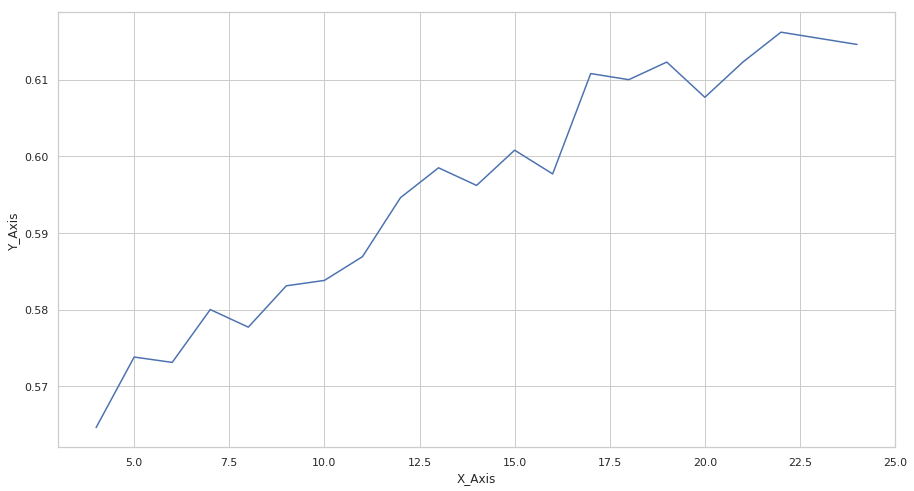

In [0]:
#Check for different neighbours from 4 to 20
xAxis = list()
yAxis = list()
for i in range(4,25,1):
  knn = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski',weights='distance') #p=2 ,Euclidean distance calculation

  #Fit the model
  knn.fit(data_train, label_train)
  xAxis.append(i)
  #Use the model for pridiction
  y_preds = knn.predict(data_test)
  
  #Model evaluation - check the accuracy score
  knn_accuracy = accuracy_score(label_test,y_preds)
  yAxis.append(round(knn_accuracy,4))
  print('Accuracy score for the KNN model with n_neighbors=', i,":",round(knn_accuracy,4))

linedata = pd.DataFrame({'X_Axis' : xAxis,
                         'Y_Axis' : yAxis})
#print(linedata)
#plot the line graph
fig, ax = plt.subplots(figsize=(15,8))
#sns.set_style("ticks")
sns.set_style("whitegrid")
sns.lineplot(x = 'X_Axis',y = 'Y_Axis', data=linedata,ax=ax)

knn_accuracy = max(yAxis)
#sinplot()

## 2A. Modelling and Prediction (Logistic Regression)
#### 2A(a) Instantiate Logistic Regression
#### 2A(b) Fit the model
#### 2A(c) Use the model for prediction
#### 2A(d) Model Evaluation using Accuracy score

In [0]:
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression(class_weight='balanced')


In [0]:
logis.fit(data_train, label_train)
y_pred = logis.predict(data_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
from sklearn.metrics import accuracy_score
logit_accuracy = accuracy_score(label_test,y_pred)
print('Accuracy score for the Logistic model:', logit_accuracy)

Accuracy score for the Logistic model: 0.4338461538461538


####2A(e) Model evaluation using confusion matrix

In [0]:
#Model evaluation using confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(label_test, y_pred))

#get the quality data
qlty_data = wine_data.quality.unique().tolist()
#print(type(qlty_data))
qlty_data.sort(reverse=False)
#print(qlty_data)
indexName = list()
colName = list()
for quality_no in qlty_data:
  indexName.append('Act ' + str(quality_no))
  colName.append('Pred ' + str(quality_no))
#print(indexName)

#confusion_matrix.index = ['Actual Poor','Actual Good','Actual Excellent']
confusion_matrix.index = indexName
#confusion_matrix.columns = ['Predicted Poor','Predicted Good','Predicted Excellent']
confusion_matrix.columns = colName
print(confusion_matrix)

       Pred 3  Pred 4  Pred 5  Pred 6  Pred 7  Pred 8  Pred 9
Act 3       1       0       3       0       0       0       2
Act 4       9      12      13       5       4       0       0
Act 5      12      32     245      83      12       1      17
Act 6      20      21     181     229      88      18      40
Act 7       3       2      22      75      70      13      30
Act 8       0       1       1       9      14       6       5
Act 9       0       0       0       0       0       0       1


## 2A.Modelling and Prediction(Decision Tree)
#### 2A(a) Instantiate Decision Tree
#### 2A(b) Fit the model
#### 2A(c) Use the model for prediction
#### 2A(d) Model Evaluation using Accuracy score

In [0]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(random_state = 0,class_weight='balanced')
dtree.fit(data_train, label_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [0]:
from graphviz import Source
graph = Source( tree.export_graphviz(dtree, out_file=None,filled=True, 
                                rounded=True,  
                                special_characters=True, feature_names=temp_wine.columns))
graph.format = 'png'
graph.render('dtree_render',view=True)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.182155 to fit


'dtree_render.png'

In [0]:
#Use the model for prediction
y_pred_tree = dtree.predict(data_test)
print("Instantiated logistic regression, fit the model and complete prediction")

Instantiated logistic regression, fit the model and complete prediction


In [0]:
#Model evaluation using Accuracy score
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(label_test,y_pred_tree)
print('Accuracy score for the Decision Tree model:', dtree_accuracy)

Accuracy score for the Decision Tree model: 0.6061538461538462


In [0]:
# Decision Tree with Gridsearch
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0,class_weight='balanced')


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            

grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(data_train, label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                   

In [0]:
#use the model for prediction
y_pred_tree_cv = grid_search.predict(data_test)

In [0]:
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(label_test,y_pred_tree_cv)
print('Accuracy score for Decision Tree model using grid search is:',dtree_accuracy )

Accuracy score for Decision Tree model using grid search is: 0.5853846153846154


In [0]:
#Model evaluation using confustion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(label_test, y_pred_tree_cv))

#get the quality data
qlty_data = wine_data.quality.unique().tolist()
#print(type(qlty_data))
qlty_data.sort(reverse=False)
#print(qlty_data)
indexName = list()
colName = list()
for quality_no in qlty_data:
  indexName.append('Act ' + str(quality_no))
  colName.append('Pred ' + str(quality_no))
#print(indexName)

#confusion_matrix.index = ['Actual Poor','Actual Good','Actual Excellent']
confusion_matrix.index = indexName
#confusion_matrix.columns = ['Predicted Poor','Predicted Good','Predicted Excellent']
confusion_matrix.columns = colName
print(confusion_matrix)

       Pred 3  Pred 4  Pred 5  Pred 6  Pred 7  Pred 8  Pred 9
Act 3       0       1       2       2       1       0       0
Act 4       3      12      18       9       1       0       0
Act 5       4      19     255      95      26       3       0
Act 6       3      10     136     355      79      14       0
Act 7       0       1      16      66     125       6       1
Act 8       0       0       5       8       9      14       0
Act 9       0       0       0       0       1       0       0


## 2A. Model comparison using accuracy score

In [0]:
#model2 = pd.DataFrame({
#        'Model'          : ['LogReg_W-Outliers-Type_&_WO-QltyBin', 'kNN_W-Outliers-Type_&_WO-QltyBin'],
#        'Accuracy_score' : [logit_accuracy, knn_accuracy]
#    })
#models = models.append(model2,ignore_index=True)
#models.drop_duplicates(subset = None, keep = 'first', inplace = True) 
#models = models.sort_index(ascending=True)



model2A = pd.DataFrame({
        'ModelName'         : ['Model 2A'],
        'Scaled?'           : ['No'],
        'Outliers?'         : ['Yes'],
        'Include Type?'     : ['Yes'],
        'Added Qlty Cat?'   : ['No'],
        'Added Wts?'        : ['Yes'],
        'Logit_score'       : [logit_accuracy],
        'KNN_score'         : [knn_accuracy],
        'DTREE_score'       : [dtree_accuracy]
    })
models = models.append(model2A,ignore_index=True)
models.drop_duplicates(subset = None, keep = 'first', inplace = True) 
models.sort_values(by='ModelName', ascending=True)

models

,ModelName,Scaled?,Outliers?,Include Type?,Added Qlty Cat?,Added Wts?,Logit_score,KNN_score,DTREE_score
0,Model 1,No,Yes,No,No,No,0.522308,0.482308,0.585385
1,Model 1A,No,Yes,No,No,Yes,0.441538,0.617692,0.600000
2,Model 2,No,Yes,Yes,No,No,0.517692,0.480800,0.590000
3,Model 2A,No,Yes,Yes,No,Yes,0.433846,0.616200,0.585385


####Observation
####Adding the Weights also dont seem to increase the accuracy it is still (61%).
####Let us try to see if we group the quality into 3 groups poor, good and excellent and see if it improves the prediction?Segment __quality__ column as __qualityclass__ as per __Score__, Score less than or equal to 3 as __Poor__, Score between 4 and 6 as __Good__ and Score greater than 6 as __Excellent__ .

## 3) Let us Try a KNN Model , Logistic Regression and Decision Tree - where data is not cleaned for outliers and not scaled but include type and bin the quality into 3 category values (poor,good and excellent).

### Prepare the data
#### Creating qualityclass to segment quality into 3 categories poor, good and execllent
#### Dummification of the Type column
#### Train / Test Split and check the shape

In [0]:
#TRY WITHOUT the DATA CLEANING and without Standardize data
wine_data = pd.concat([redwine_data, whitewine_data], ignore_index=True)

#Bin the quality in qualityclass with 3 categories
wine_data['qualityclass'] = wine_data.apply(lambda x: 1 if x['quality'] <= 3 else 2 if (x['quality'] > 3 and x['quality'] <= 6) else 3,axis=1)


####Checking for  qualityclass data

In [0]:
wine_data[wine_data.qualityclass==3].head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type,qualityclass
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,Red,3
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,Red,3


In [0]:
wine_data[wine_data.qualityclass==2].head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type,qualityclass
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red,2
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red,2


In [0]:
wine_data[wine_data.qualityclass==1].head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type,qualityclass
459,11.6,0.58,0.66,2.2,0.074,10.0,47.0,1.0008,3.25,0.57,9.0,3,Red,1
517,10.4,0.61,0.49,2.1,0.200,5.0,16.0,0.9994,3.16,0.63,8.4,3,Red,1


In [0]:
wine_data = pd.get_dummies(wine_data, columns=['Type'], drop_first=True)
wine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualityclass,Type_White
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2,0


####checking for type_white dummification column

In [0]:
wine_data[wine_data.Type_White==1].head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualityclass,Type_White
1599,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,2,1
1600,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6,2,1


In [0]:
wine_data[wine_data.Type_White==0].head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualityclass,Type_White
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2,0


##  3.Modelling and prediction(KNN)
#### 3(a) Instantiate K nearest neighbour Classifier
#### 3(b) Fit the model
#### 3(c) Use the model for prediction
#### 3(d) Model evaluation using accuracy score

In [0]:
#remove quality and type and keep qualityclass and Type_White dummies
temp_wine = wine_data.loc[:,wine_data.columns != 'quality']
temp_wine = temp_wine.loc[:,temp_wine.columns != 'Type']
#temp_wine.skew()

label = temp_wine.pop('qualityclass')

#Train/Test data and check shape
from sklearn.model_selection import train_test_split
#data_train, data_test, label_train, label_test = train_test_split(wine_scale, label, test_size = 0.2, random_state = 42)
data_train, data_test, label_train, label_test = train_test_split(temp_wine, label, test_size = 0.2, random_state = 42)

print('There are {} samples in the training set and {} samples in the test set'.format(data_train.shape[0], data_test.shape[0]))

#Modelling and prediction
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski') #p=2 ,Euclidean distance calculation


knn.fit(data_train, label_train)

y_preds = knn.predict(data_test)

from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(label_test,y_preds)
print('Accuracy score for the KNN model:', knn_accuracy)

There are 5197 samples in the training set and 1300 samples in the test set
Accuracy score for the KNN model: 0.7915384615384615


#### 3(e)Trying different neighbour (n) values to see if the accuracy increases

Accuracy score for the KNN model with n_neighbors= 4 : 0.8038
Accuracy score for the KNN model with n_neighbors= 5 : 0.7892
Accuracy score for the KNN model with n_neighbors= 6 : 0.7938
Accuracy score for the KNN model with n_neighbors= 7 : 0.7915
Accuracy score for the KNN model with n_neighbors= 8 : 0.8031
Accuracy score for the KNN model with n_neighbors= 9 : 0.7985
Accuracy score for the KNN model with n_neighbors= 10 : 0.7992
Accuracy score for the KNN model with n_neighbors= 11 : 0.7938
Accuracy score for the KNN model with n_neighbors= 12 : 0.7931
Accuracy score for the KNN model with n_neighbors= 13 : 0.7946
Accuracy score for the KNN model with n_neighbors= 14 : 0.8008
Accuracy score for the KNN model with n_neighbors= 15 : 0.7985
Accuracy score for the KNN model with n_neighbors= 16 : 0.7954
Accuracy score for the KNN model with n_neighbors= 17 : 0.7962
Accuracy score for the KNN model with n_neighbors= 18 : 0.8
Accuracy score for the KNN model with n_neighbors= 19 : 0.7985
A

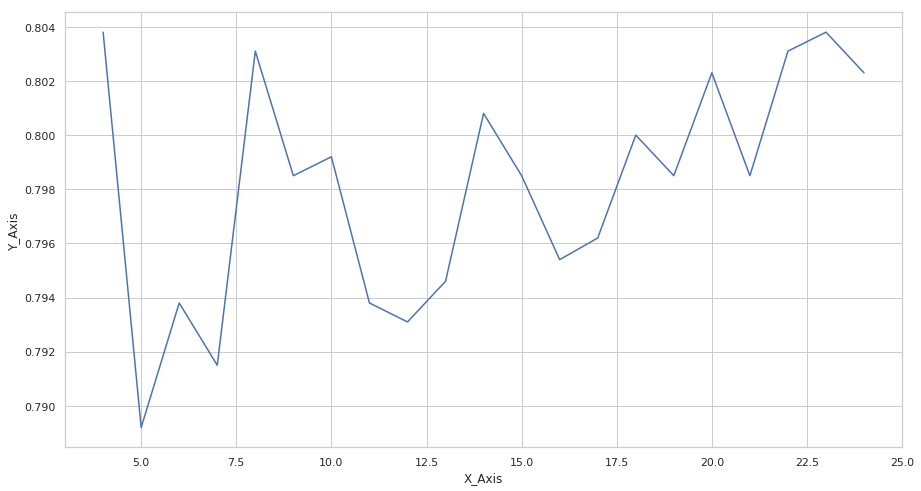

In [0]:
#TRYING DIFFERENT NEIGHBOURS
#Check for different neighbours from 4 to 20
xAxis = list()
yAxis = list()
for i in range(4,25,1):
  knn = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski') #p=2 ,Euclidean distance calculation

  #Fit the model
  knn.fit(data_train, label_train)
  xAxis.append(i)
  #Use the model for pridiction
  y_preds = knn.predict(data_test)
  
  #Model evaluation - check the accuracy score
  knn_accuracy = accuracy_score(label_test,y_preds)
  yAxis.append(round(knn_accuracy,4))
  print('Accuracy score for the KNN model with n_neighbors=', i,":",round(knn_accuracy,4))

linedata = pd.DataFrame({'X_Axis' : xAxis,
                         'Y_Axis' : yAxis})
#print(linedata)
#plot the line graph
fig, ax = plt.subplots(figsize=(15,8))
#sns.set_style("ticks")
sns.set_style("whitegrid")
sns.lineplot(x = 'X_Axis',y = 'Y_Axis', data=linedata,ax=ax)

knn_accuracy = max(yAxis)
#sinplot()

## 3. Modelling and Prediction (Logistic Regression)
#### 3(a) Instantiate Logistic Regression
#### 3(b) Fit the model
#### 3(c) Use the model for prediction
#### 3.(d) Model Evaluation using Accuracy score


In [0]:
#Instantiate Logistic Regression
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()

#Fit the model
logis.fit(data_train, label_train)

#Use for prediction
y_pred = logis.predict(data_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
#Model evaluation using accuracy score
from sklearn.metrics import accuracy_score
logit_accuracy = accuracy_score(label_test,y_pred)
print('Accuracy score for the Logistic model:', logit_accuracy)

Accuracy score for the Logistic model: 0.8192307692307692


## 3.Modelling and Prediction(Decision Tree)
#### 3(a) Instantiate Logistic Regression
#### 3(b) Fit the model
#### 3(c) Use the model for prediction
#### 3(d) Model Evaluation using Accuracy score

In [0]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(random_state = 0)
dtree.fit(data_train, label_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [0]:
from graphviz import Source
graph = Source( tree.export_graphviz(dtree, out_file=None,filled=True, 
                                rounded=True,  
                                special_characters=True, feature_names=temp_wine.columns))
graph.format = 'png'
graph.render('dtree_render',view=True)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.907472 to fit


'dtree_render.png'

In [0]:
#Use the model for prediction
y_pred_tree = dtree.predict(data_test)
print("Instantiated logistic regression, fit the model and complete prediction")

Instantiated logistic regression, fit the model and complete prediction


In [0]:
#Model evaluation using Accuracy score
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(label_test,y_pred_tree)
print('Accuracy score for the Decision Tree model:', dtree_accuracy)

Accuracy score for the Decision Tree model: 0.8315384615384616


In [0]:
# Decision Tree with Gridsearch
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0)


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            

grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(data_train, label_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                         

In [0]:
#use the model for prediction
y_pred_tree_cv = grid_search.predict(data_test)

In [0]:
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(label_test,y_pred_tree_cv)
print('Accuracy score for Decision Tree model using grid search is:',dtree_accuracy )

Accuracy score for Decision Tree model using grid search is: 0.8453846153846154


In [0]:
#Model evaluation using confustion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(label_test, y_pred_tree_cv))

#get the quality data
qlty_data = wine_data.qualityclass.unique().tolist()
#print(type(qlty_data))
qlty_data.sort(reverse=False)
#print(qlty_data)
indexName = list()
colName = list()
for quality_no in qlty_data:
  indexName.append('Act ' + str(quality_no))
  colName.append('Pred ' + str(quality_no))
#print(indexName)

#confusion_matrix.index = ['Actual Poor','Actual Good','Actual Excellent']
confusion_matrix.index = indexName
#confusion_matrix.columns = ['Predicted Poor','Predicted Good','Predicted Excellent']
confusion_matrix.columns = colName
print(confusion_matrix)

       Pred 1  Pred 2  Pred 3
Act 1       0       4       2
Act 2       1     937     104
Act 3       1      89     162


## 3. Model comparison using accuracy score

In [0]:
#model3 = pd.DataFrame({
#        'Model'          : ['LogReg_W-Outliers-Type-QltyBin', 'kNN_W-Outliers-Type-QltyBin'],
#        'Accuracy_score' : [logit_accuracy, knn_accuracy]
#    })
#models = models.append(model3,ignore_index=True)
#models.drop_duplicates(subset = None, keep = 'first', inplace = True) 
#models = models.sort_index(ascending=True)



model3 = pd.DataFrame({
        'ModelName'         : ['Model 3'],
        'Scaled?'           : ['No'],
        'Outliers?'         : ['Yes'],
        'Include Type?'     : ['Yes'],
        'Added Qlty Cat?'   : ['Yes'],
        'Added Wts?'        : ['No'],
        'Logit_score'       : [logit_accuracy],
        'KNN_score'         : [knn_accuracy],
        'DTREE_score'       : [dtree_accuracy]
    })
models = models.append(model3,ignore_index=True)
models.drop_duplicates(subset = None, keep = 'first', inplace = True) 
models.sort_values(by='ModelName', ascending=True)

models

,ModelName,Scaled?,Outliers?,Include Type?,Added Qlty Cat?,Added Wts?,Logit_score,KNN_score,DTREE_score
0,Model 1,No,Yes,No,No,No,0.522308,0.482308,0.585385
1,Model 1A,No,Yes,No,No,Yes,0.441538,0.617692,0.600000
2,Model 2,No,Yes,Yes,No,No,0.517692,0.480800,0.590000
3,Model 2A,No,Yes,Yes,No,Yes,0.433846,0.616200,0.585385
4,Model 3,No,Yes,Yes,Yes,No,0.819231,0.803800,0.845385


## Observation
#### By adding the 3 category for the qulity we see an  increase in the accuracy and Decision Tree Grid Search seems to be best with 84% accuracy
#### Let us see if adding weights improves this?

##3A)  Let us Try with added weights for KNN Model , Logistic Regression and Decision Tree - where data is not cleaned for outliers and not scaled but include type and bin the quality into 3 category values (poor,good and excellent).

##  3A.Modelling and prediction(KNN)
#### 3A(a) Instantiate K nearest neighbour Classifier
#### 3A(b) Fit the model
#### 3A(c) Use the model for prediction
#### 3A(d) Model evaluation using accuracy score

In [0]:
#remove quality and type and keep qualityclass and Type_White dummies
temp_wine = wine_data.loc[:,wine_data.columns != 'quality']
temp_wine = temp_wine.loc[:,temp_wine.columns != 'Type']
#temp_wine.skew()

label = temp_wine.pop('qualityclass')

#Train/Test data and check shape
from sklearn.model_selection import train_test_split
#data_train, data_test, label_train, label_test = train_test_split(wine_scale, label, test_size = 0.2, random_state = 42)
data_train, data_test, label_train, label_test = train_test_split(temp_wine, label, test_size = 0.2, random_state = 42)

print('There are {} samples in the training set and {} samples in the test set'.format(data_train.shape[0], data_test.shape[0]))

#Modelling and prediction
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski',weights='distance') #p=2 ,Euclidean distance calculation with added weights


knn.fit(data_train, label_train)

y_preds = knn.predict(data_test)

from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(label_test,y_preds)
print('Accuracy score for the KNN model:', knn_accuracy)

There are 5197 samples in the training set and 1300 samples in the test set
Accuracy score for the KNN model: 0.84


#### 3A(e)Trying different neighbour (n) values to see if the accuracy increases

Accuracy score for the KNN model with n_neighbors= 4 : 0.8238
Accuracy score for the KNN model with n_neighbors= 5 : 0.8346
Accuracy score for the KNN model with n_neighbors= 6 : 0.8385
Accuracy score for the KNN model with n_neighbors= 7 : 0.84
Accuracy score for the KNN model with n_neighbors= 8 : 0.84
Accuracy score for the KNN model with n_neighbors= 9 : 0.8462
Accuracy score for the KNN model with n_neighbors= 10 : 0.8531
Accuracy score for the KNN model with n_neighbors= 11 : 0.8523
Accuracy score for the KNN model with n_neighbors= 12 : 0.8569
Accuracy score for the KNN model with n_neighbors= 13 : 0.86
Accuracy score for the KNN model with n_neighbors= 14 : 0.8623
Accuracy score for the KNN model with n_neighbors= 15 : 0.8654
Accuracy score for the KNN model with n_neighbors= 16 : 0.8662
Accuracy score for the KNN model with n_neighbors= 17 : 0.8669
Accuracy score for the KNN model with n_neighbors= 18 : 0.8662
Accuracy score for the KNN model with n_neighbors= 19 : 0.8692
Accu

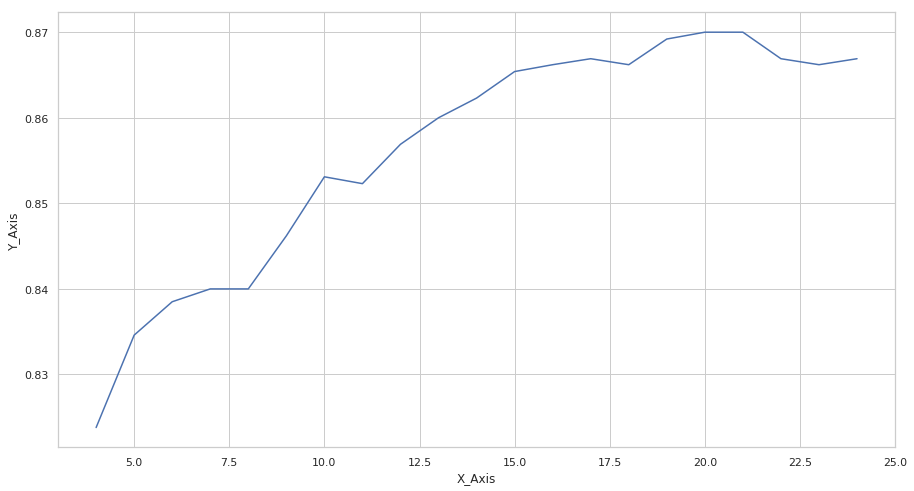

In [0]:
#TRYING DIFFERENT NEIGHBOURS
#Check for different neighbours from 4 to 20
xAxis = list()
yAxis = list()
for i in range(4,25,1):
  knn = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski',weights='distance') #p=2 ,Euclidean distance calculation with added weights

  #Fit the model
  knn.fit(data_train, label_train)
  xAxis.append(i)
  #Use the model for pridiction
  y_preds = knn.predict(data_test)
  
  #Model evaluation - check the accuracy score
  knn_accuracy = accuracy_score(label_test,y_preds)
  yAxis.append(round(knn_accuracy,4))
  print('Accuracy score for the KNN model with n_neighbors=', i,":",round(knn_accuracy,4))

linedata = pd.DataFrame({'X_Axis' : xAxis,
                         'Y_Axis' : yAxis})
#print(linedata)
#plot the line graph
fig, ax = plt.subplots(figsize=(15,8))
#sns.set_style("ticks")
sns.set_style("whitegrid")
sns.lineplot(x = 'X_Axis',y = 'Y_Axis', data=linedata,ax=ax)

knn_accuracy = max(yAxis)
#sinplot()

## 3A. Modelling and Prediction (Logistic Regression)
#### 3A(a) Instantiate Logistic Regression
#### 3A(b) Fit the model
#### 3A(c) Use the model for prediction
#### 3A.(d) Model Evaluation using Accuracy score


In [0]:
#Instantiate Logistic Regression
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression(class_weight='balanced')

#Fit the model
logis.fit(data_train, label_train)

#Use for prediction
y_pred = logis.predict(data_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
#Model evaluation using accuracy score
from sklearn.metrics import accuracy_score
logit_accuracy = accuracy_score(label_test,y_pred)
print('Accuracy score for the Logistic model:', logit_accuracy)

Accuracy score for the Logistic model: 0.7907692307692308


## 3A.Modelling and Prediction(Decision Tree)
#### 3A(a) Instantiate Logistic Regression
#### 3A(b) Fit the model
#### 3A(c) Use the model for prediction
#### 3A(d) Model Evaluation using Accuracy score

In [0]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(random_state = 0,class_weight='balanced')
dtree.fit(data_train, label_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [0]:
from graphviz import Source
graph = Source( tree.export_graphviz(dtree, out_file=None,filled=True, 
                                rounded=True,  
                                special_characters=True, feature_names=temp_wine.columns))
graph.format = 'png'
graph.render('dtree_render',view=True)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.734242 to fit


'dtree_render.png'

In [0]:
#Use the model for prediction
y_pred_tree = dtree.predict(data_test)
print("Instantiated logistic regression, fit the model and complete prediction")

Instantiated logistic regression, fit the model and complete prediction


In [0]:
#Model evaluation using Accuracy score
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(label_test,y_pred_tree)
print('Accuracy score for the Decision Tree model:', dtree_accuracy)

Accuracy score for the Decision Tree model: 0.8453846153846154


In [0]:
# Decision Tree with Gridsearch
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0,class_weight='balanced')


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            

grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(data_train, label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                   

In [0]:
#use the model for prediction
y_pred_tree_cv = grid_search.predict(data_test)

In [0]:
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(label_test,y_pred_tree_cv)
print('Accuracy score for Decision Tree model using grid search is:',dtree_accuracy )

Accuracy score for Decision Tree model using grid search is: 0.8338461538461538


In [0]:
#Model evaluation using confustion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(label_test, y_pred_tree_cv))

#get the quality data
qlty_data = wine_data.qualityclass.unique().tolist()
#print(type(qlty_data))
qlty_data.sort(reverse=False)
#print(qlty_data)
indexName = list()
colName = list()
for quality_no in qlty_data:
  indexName.append('Act ' + str(quality_no))
  colName.append('Pred ' + str(quality_no))
#print(indexName)

#confusion_matrix.index = ['Actual Poor','Actual Good','Actual Excellent']
confusion_matrix.index = indexName
#confusion_matrix.columns = ['Predicted Poor','Predicted Good','Predicted Excellent']
confusion_matrix.columns = colName
print(confusion_matrix)

       Pred 1  Pred 2  Pred 3
Act 1       1       4       1
Act 2       6     925     111
Act 3       1      93     158


## 3A. Model comparison using accuracy score

In [0]:
#model3 = pd.DataFrame({
#        'Model'          : ['LogReg_W-Outliers-Type-QltyBin', 'kNN_W-Outliers-Type-QltyBin'],
#        'Accuracy_score' : [logit_accuracy, knn_accuracy]
#    })
#models = models.append(model3,ignore_index=True)
#models.drop_duplicates(subset = None, keep = 'first', inplace = True) 
#models = models.sort_index(ascending=True)



model3A = pd.DataFrame({
        'ModelName'         : ['Model 3A'],
        'Scaled?'           : ['No'],
        'Outliers?'         : ['Yes'],
        'Include Type?'     : ['Yes'],
        'Added Qlty Cat?'   : ['Yes'],
        'Added Wts?'        : ['Yes'],
        'Logit_score'       : [logit_accuracy],
        'KNN_score'         : [knn_accuracy],
        'DTREE_score'       : [dtree_accuracy]
    })
models = models.append(model3A,ignore_index=True)
models.drop_duplicates(subset = None, keep = 'first', inplace = True) 
models.sort_values(by='ModelName', ascending=True)

models

,ModelName,Scaled?,Outliers?,Include Type?,Added Qlty Cat?,Added Wts?,Logit_score,KNN_score,DTREE_score
0,Model 1,No,Yes,No,No,No,0.522308,0.482308,0.585385
1,Model 1A,No,Yes,No,No,Yes,0.441538,0.617692,0.600000
2,Model 2,No,Yes,Yes,No,No,0.517692,0.480800,0.590000
3,Model 2A,No,Yes,Yes,No,Yes,0.433846,0.616200,0.585385
4,Model 3,No,Yes,Yes,Yes,No,0.819231,0.803800,0.845385
5,Model 3A,No,Yes,Yes,Yes,Yes,0.790769,0.870000,0.833846


## Observation
#### By adding the weights we see an  increase in the accuracy and KNN with 87% accuracy for n=20.
#### Let us try to see if Type dummification is really helping the accuracy? we will remove the type field and try to predict the new quality class with 3 categories poor, good and excellent.

## 4) Let us Try  KNN Model , Logistic Regression and Decision Tree- where data is not cleaned for outliers and not scaled and ignore type aslo but just keep the qualityclass with 3 category values (poor,good and excellent).

### Prepare the data
#### Creating qualityclass to segment quality into 3 categories poor, good and execllent
#### Ignoring the Type column
#### Train / Test Split and check the shape

In [0]:
#TRY WITHOUT the DATA CLEANING BUT Standardized Data
wine_data = pd.concat([redwine_data, whitewine_data], ignore_index=True)
#wine_data = pd.concat([redwine_datacleaned, whitewine_datacleaned], ignore_index=True)
wine_data['qualityclass'] = wine_data.apply(lambda x: 1 if x['quality'] <= 3 else 2 if (x['quality'] > 3 and x['quality'] <= 6) else 3,axis=1)

wine_data.head(10)

#remove quality and type , just keep qualityclass as label
temp_wine = wine_data.loc[:,wine_data.columns != 'quality']
temp_wine = temp_wine.loc[:,temp_wine.columns != 'Type']

#Label the qualityclass column
label = temp_wine.pop('qualityclass')


In [0]:
#Train/Test data and check shape
from sklearn.model_selection import train_test_split
#data_train, data_test, label_train, label_test = train_test_split(wine_scale, label, test_size = 0.2, random_state = 42)
data_train, data_test, label_train, label_test = train_test_split(temp_wine, label, test_size = 0.2, random_state = 42)

print('There are {} samples in the training set and {} samples in the test set'.format(data_train.shape[0], data_test.shape[0]))



There are 5197 samples in the training set and 1300 samples in the test set


## 4. Modelling and prediction(KNN)
#### 4(a) Instantiate K nearest neighbour Classifier
#### 4(b) Fit the model
#### 4(c) Use the model for prediction
#### 4(d) Model evaluation using accuracy score

In [0]:
#Modelling and prediction
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski') #p=2 ,Euclidean distance calculation

#Fit the Model
knn.fit(data_train, label_train)

#Use the model for prediction
y_preds = knn.predict(data_test)

#Model evaluation using accuracy score
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(label_test,y_preds)
print('Accuracy score for the KNN model:', knn_accuracy)

Accuracy score for the KNN model: 0.7923076923076923


#### 4(e)Trying different neighbour (n) values to see if the accuracy increases

Accuracy score for the KNN model with n_neighbors= 4 : 0.8031
Accuracy score for the KNN model with n_neighbors= 5 : 0.7908
Accuracy score for the KNN model with n_neighbors= 6 : 0.7938
Accuracy score for the KNN model with n_neighbors= 7 : 0.7923
Accuracy score for the KNN model with n_neighbors= 8 : 0.8031
Accuracy score for the KNN model with n_neighbors= 9 : 0.7992
Accuracy score for the KNN model with n_neighbors= 10 : 0.7992
Accuracy score for the KNN model with n_neighbors= 11 : 0.7954
Accuracy score for the KNN model with n_neighbors= 12 : 0.7938
Accuracy score for the KNN model with n_neighbors= 13 : 0.7931
Accuracy score for the KNN model with n_neighbors= 14 : 0.8008
Accuracy score for the KNN model with n_neighbors= 15 : 0.7985
Accuracy score for the KNN model with n_neighbors= 16 : 0.7946
Accuracy score for the KNN model with n_neighbors= 17 : 0.7969
Accuracy score for the KNN model with n_neighbors= 18 : 0.8008
Accuracy score for the KNN model with n_neighbors= 19 : 0.800

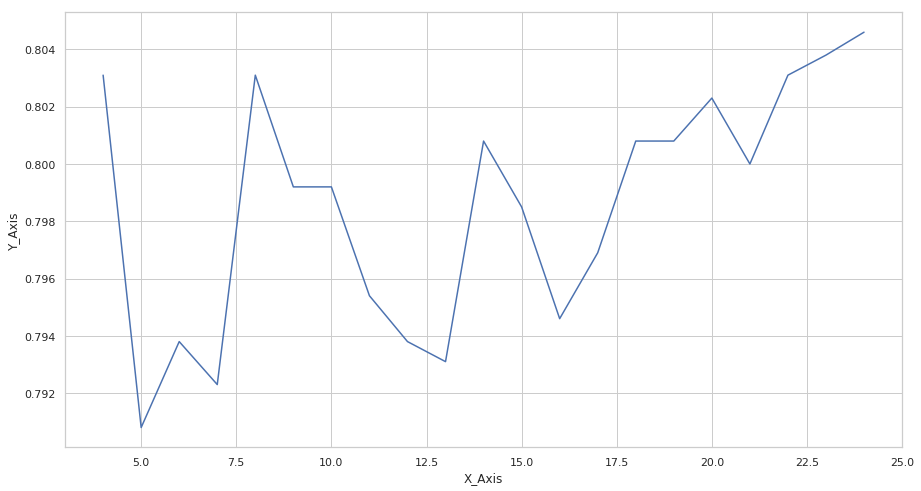

In [0]:
#TRYING DIFFERENT NEIGHBOURS
#Check for different neighbours from 4 to 20
xAxis = list()
yAxis = list()
for i in range(4,25,1):
  knn = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski') #p=2 ,Euclidean distance calculation

  #Fit the model
  knn.fit(data_train, label_train)
  xAxis.append(i)
  #Use the model for pridiction
  y_preds = knn.predict(data_test)
  
  #Model evaluation - check the accuracy score
  knn_accuracy = accuracy_score(label_test,y_preds)
  yAxis.append(round(knn_accuracy,4))
  print('Accuracy score for the KNN model with n_neighbors=', i,":",round(knn_accuracy,4))

linedata = pd.DataFrame({'X_Axis' : xAxis,
                         'Y_Axis' : yAxis})
#print(linedata)
#plot the line graph
fig, ax = plt.subplots(figsize=(15,8))
#sns.set_style("ticks")
sns.set_style("whitegrid")
sns.lineplot(x = 'X_Axis',y = 'Y_Axis', data=linedata,ax=ax)

knn_accuracy = max(yAxis)

## 4. Modelling and Prediction (Logistic Regression)
#### 4(a) Instantiate Logistic Regression
#### 4(b) Fit the model
#### 4(c) Use the model for prediction
#### 4.(d) Model Evaluation using Accuracy score

In [0]:
#CHECK TEH LOGISTIC REGRESSION AND COMPARE WITH KNN
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()

#Fit the model
logis.fit(data_train, label_train)

#Use model for prediction
y_pred = logis.predict(data_test)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
#Model evaluation using accuracy score
from sklearn.metrics import accuracy_score
logit_accuracy = accuracy_score(label_test,y_pred)
print('Accuracy score for the Logistic model:', logit_accuracy)

Accuracy score for the Logistic model: 0.8207692307692308


## 4.Modelling and Prediction(Decision Tree)
#### 4(a) Instantiate Logistic Regression
#### 4(b) Fit the model
#### 4(c) Use the model for prediction
#### 4(d) Model Evaluation using Accuracy score

In [0]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(random_state = 0)
dtree.fit(data_train, label_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [0]:
from graphviz import Source
graph = Source( tree.export_graphviz(dtree, out_file=None,filled=True, 
                                rounded=True,  
                                special_characters=True, feature_names=temp_wine.columns))
graph.format = 'png'
graph.render('dtree_render',view=True)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.934598 to fit


'dtree_render.png'

In [0]:
#Use the model for prediction
y_pred_tree = dtree.predict(data_test)
print("Instantiated logistic regression, fit the model and complete prediction")

Instantiated logistic regression, fit the model and complete prediction


In [0]:
#Model evaluation using Accuracy score
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(label_test,y_pred_tree)
print('Accuracy score for the Decision Tree model:', dtree_accuracy)

Accuracy score for the Decision Tree model: 0.83


In [0]:
# Decision Tree with Gridsearch
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0)


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            

grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(data_train, label_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                         

In [0]:
#use the model for prediction
y_pred_tree_cv = grid_search.predict(data_test)

In [0]:
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(label_test,y_pred_tree_cv)
print('Accuracy score for Decision Tree model using grid search is:',dtree_accuracy )

Accuracy score for Decision Tree model using grid search is: 0.8376923076923077


In [0]:
#Model evaluation using confustion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(label_test, y_pred_tree_cv))

#get the quality data
qlty_data = wine_data.qualityclass.unique().tolist()
#print(type(qlty_data))
qlty_data.sort(reverse=False)
#print(qlty_data)
indexName = list()
colName = list()
for quality_no in qlty_data:
  indexName.append('Act ' + str(quality_no))
  colName.append('Pred ' + str(quality_no))
#print(indexName)

#confusion_matrix.index = ['Actual Poor','Actual Good','Actual Excellent']
confusion_matrix.index = indexName
#confusion_matrix.columns = ['Predicted Poor','Predicted Good','Predicted Excellent']
confusion_matrix.columns = colName
print(confusion_matrix)

       Pred 1  Pred 2  Pred 3
Act 1       0       3       3
Act 2       4     936     102
Act 3       0      99     153


## 4. Model comparison using accuracy score

In [0]:
#model4 = pd.DataFrame({
#        'Model'          : ['LogReg_W-Outliers-QltyBin_&_WO-Type', 'kNN_W-Outliers-QltyBin_&_WO-Type'],
#        'Accuracy_score' : [logit_accuracy, knn_accuracy]
#    })
#models = models.append(model4,ignore_index=True)
#models.drop_duplicates(subset = None, keep = 'first', inplace = True) 
#models = models.sort_index(ascending=True)

#models


model4 = pd.DataFrame({
        'ModelName'         : ['Model 4'],
        'Scaled?'           : ['No'],
        'Outliers?'         : ['Yes'],
        'Include Type?'     : ['No'],
        'Added Qlty Cat?'   : ['Yes'],
        'Added Wts?'        : ['No'],
        'Logit_score'       : [logit_accuracy],
        'KNN_score'         : [knn_accuracy],
        'DTREE_score'       : [dtree_accuracy]
    })
models = models.append(model4,ignore_index=True)
models.drop_duplicates(subset = None, keep = 'first', inplace = True) 
models.sort_values(by='ModelName', ascending=True)

models

,ModelName,Scaled?,Outliers?,Include Type?,Added Qlty Cat?,Added Wts?,Logit_score,KNN_score,DTREE_score
0,Model 1,No,Yes,No,No,No,0.522308,0.482308,0.585385
1,Model 1A,No,Yes,No,No,Yes,0.441538,0.617692,0.600000
2,Model 2,No,Yes,Yes,No,No,0.517692,0.480800,0.590000
3,Model 2A,No,Yes,Yes,No,Yes,0.433846,0.616200,0.585385
4,Model 3,No,Yes,Yes,Yes,No,0.819231,0.803800,0.845385
5,Model 3A,No,Yes,Yes,Yes,Yes,0.790769,0.870000,0.833846
6,Model 4,No,Yes,No,Yes,No,0.820769,0.804600,0.837692


## Observation
#### By dropping type and keeping only the qualityclass with 3 category for the qulity we see slight  deccrease in the accuracy and Decision Tree seems to be slightly better with 83% accuracy
#### Let us try to add weights and see the accuracy.

##4A) Let us try with added weights for  KNN Model , Logistic Regression and Decision Tree- where data is not cleaned for outliers and not scaled and ignore type aslo but just keep the qualityclass with 3 category values (poor,good and excellent).

## 4A. Modelling and prediction(KNN)
#### 4A(a) Instantiate K nearest neighbour Classifier
#### 4A(b) Fit the model
#### 4A(c) Use the model for prediction
#### 4A(d) Model evaluation using accuracy score

In [0]:
#Modelling and prediction
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski',weights='distance') #p=2 ,Euclidean distance calculation with added weights

#Fit the Model
knn.fit(data_train, label_train)

#Use the model for prediction
y_preds = knn.predict(data_test)

#Model evaluation using accuracy score
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(label_test,y_preds)
print('Accuracy score for the KNN model:', knn_accuracy)

Accuracy score for the KNN model: 0.8415384615384616


#### 4A(e)Trying different neighbour (n) values to see if the accuracy increases

Accuracy score for the KNN model with n_neighbors= 4 : 0.8246
Accuracy score for the KNN model with n_neighbors= 5 : 0.8362
Accuracy score for the KNN model with n_neighbors= 6 : 0.8392
Accuracy score for the KNN model with n_neighbors= 7 : 0.8415
Accuracy score for the KNN model with n_neighbors= 8 : 0.8408
Accuracy score for the KNN model with n_neighbors= 9 : 0.8469
Accuracy score for the KNN model with n_neighbors= 10 : 0.8523
Accuracy score for the KNN model with n_neighbors= 11 : 0.8546
Accuracy score for the KNN model with n_neighbors= 12 : 0.8569
Accuracy score for the KNN model with n_neighbors= 13 : 0.8608
Accuracy score for the KNN model with n_neighbors= 14 : 0.8631
Accuracy score for the KNN model with n_neighbors= 15 : 0.8654
Accuracy score for the KNN model with n_neighbors= 16 : 0.8662
Accuracy score for the KNN model with n_neighbors= 17 : 0.8677
Accuracy score for the KNN model with n_neighbors= 18 : 0.8669
Accuracy score for the KNN model with n_neighbors= 19 : 0.870

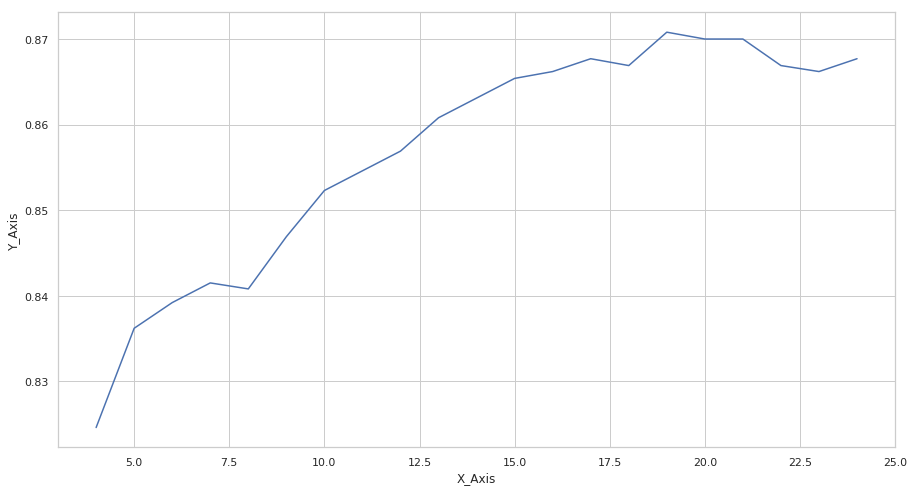

In [0]:
#TRYING DIFFERENT NEIGHBOURS
#Check for different neighbours from 4 to 20
xAxis = list()
yAxis = list()
for i in range(4,25,1):
  knn = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski',weights='distance') #p=2 ,Euclidean distance calculation with added weights

  #Fit the model
  knn.fit(data_train, label_train)
  xAxis.append(i)
  #Use the model for pridiction
  y_preds = knn.predict(data_test)
  
  #Model evaluation - check the accuracy score
  knn_accuracy = accuracy_score(label_test,y_preds)
  yAxis.append(round(knn_accuracy,4))
  print('Accuracy score for the KNN model with n_neighbors=', i,":",round(knn_accuracy,4))

linedata = pd.DataFrame({'X_Axis' : xAxis,
                         'Y_Axis' : yAxis})
#print(linedata)
#plot the line graph
fig, ax = plt.subplots(figsize=(15,8))
#sns.set_style("ticks")
sns.set_style("whitegrid")
sns.lineplot(x = 'X_Axis',y = 'Y_Axis', data=linedata,ax=ax)

knn_accuracy = max(yAxis)

## 4A. Modelling and Prediction (Logistic Regression)
#### 4A(a) Instantiate Logistic Regression
#### 4A(b) Fit the model
#### 4A(c) Use the model for prediction
#### 4A.(d) Model Evaluation using Accuracy score

In [0]:
#CHECK TEH LOGISTIC REGRESSION AND COMPARE WITH KNN
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression(class_weight='balanced') #with added weights

#Fit the model
logis.fit(data_train, label_train)

#Use model for prediction
y_pred = logis.predict(data_test)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
#Model evaluation using accuracy score
from sklearn.metrics import accuracy_score
logit_accuracy = accuracy_score(label_test,y_pred)
print('Accuracy score for the Logistic model:', logit_accuracy)

Accuracy score for the Logistic model: 0.7907692307692308


## 4A.Modelling and Prediction(Decision Tree)
#### 4A(a) Instantiate Logistic Regression
#### 4A(b) Fit the model
#### 4A(c) Use the model for prediction
#### 4A(d) Model Evaluation using Accuracy score

In [0]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(random_state = 0,class_weight='balanced') #with added weights
dtree.fit(data_train, label_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [0]:
from graphviz import Source
graph = Source( tree.export_graphviz(dtree, out_file=None,filled=True, 
                                rounded=True,  
                                special_characters=True, feature_names=temp_wine.columns))
graph.format = 'png'
graph.render('dtree_render',view=True)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.727138 to fit


'dtree_render.png'

In [0]:
#Use the model for prediction
y_pred_tree = dtree.predict(data_test)
print("Instantiated logistic regression, fit the model and complete prediction")

Instantiated logistic regression, fit the model and complete prediction


In [0]:
#Model evaluation using Accuracy score
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(label_test,y_pred_tree)
print('Accuracy score for the Decision Tree model:', dtree_accuracy)

Accuracy score for the Decision Tree model: 0.8430769230769231


In [0]:
# Decision Tree with Gridsearch
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0 ,class_weight='balanced') #with added weights


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            

grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(data_train, label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                   

In [0]:
#use the model for prediction
y_pred_tree_cv = grid_search.predict(data_test)

In [0]:
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(label_test,y_pred_tree_cv)
print('Accuracy score for Decision Tree model using grid search is:',dtree_accuracy )

Accuracy score for Decision Tree model using grid search is: 0.8407692307692308


In [0]:
#Model evaluation using confustion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(label_test, y_pred_tree_cv))

#get the quality data
qlty_data = wine_data.qualityclass.unique().tolist()
#print(type(qlty_data))
qlty_data.sort(reverse=False)
#print(qlty_data)
indexName = list()
colName = list()
for quality_no in qlty_data:
  indexName.append('Act ' + str(quality_no))
  colName.append('Pred ' + str(quality_no))
#print(indexName)

#confusion_matrix.index = ['Actual Poor','Actual Good','Actual Excellent']
confusion_matrix.index = indexName
#confusion_matrix.columns = ['Predicted Poor','Predicted Good','Predicted Excellent']
confusion_matrix.columns = colName
print(confusion_matrix)

       Pred 1  Pred 2  Pred 3
Act 1       1       4       1
Act 2       6     928     108
Act 3       0      88     164


## 4A. Model comparison using accuracy score

In [0]:
#model4 = pd.DataFrame({
#        'Model'          : ['LogReg_W-Outliers-QltyBin_&_WO-Type', 'kNN_W-Outliers-QltyBin_&_WO-Type'],
#        'Accuracy_score' : [logit_accuracy, knn_accuracy]
#    })
#models = models.append(model4,ignore_index=True)
#models.drop_duplicates(subset = None, keep = 'first', inplace = True) 
#models = models.sort_index(ascending=True)

#models


model4A = pd.DataFrame({
        'ModelName'         : ['Model 4A'],
        'Scaled?'           : ['No'],
        'Outliers?'         : ['Yes'],
        'Include Type?'     : ['No'],
        'Added Qlty Cat?'   : ['Yes'],
        'Added Wts?'        : ['Yes'],
        'Logit_score'       : [logit_accuracy],
        'KNN_score'         : [knn_accuracy],
        'DTREE_score'       : [dtree_accuracy]
    })
models = models.append(model4A,ignore_index=True)
models.drop_duplicates(subset = None, keep = 'first', inplace = True) 
models.sort_values(by='ModelName', ascending=True)

models

,ModelName,Scaled?,Outliers?,Include Type?,Added Qlty Cat?,Added Wts?,Logit_score,KNN_score,DTREE_score
0,Model 1,No,Yes,No,No,No,0.522308,0.482308,0.585385
1,Model 1A,No,Yes,No,No,Yes,0.441538,0.617692,0.600000
2,Model 2,No,Yes,Yes,No,No,0.517692,0.480800,0.590000
3,Model 2A,No,Yes,Yes,No,Yes,0.433846,0.616200,0.585385
4,Model 3,No,Yes,Yes,Yes,No,0.819231,0.803800,0.845385
5,Model 3A,No,Yes,Yes,Yes,Yes,0.790769,0.870000,0.833846
6,Model 4,No,Yes,No,Yes,No,0.820769,0.804600,0.837692
7,Model 4A,No,Yes,No,Yes,Yes,0.790769,0.870800,0.840769


## Observation
#### By dropping type and keeping only the qualityclass with 3 category for the qulity and add weight we see an  increase in the accuracy and KNN seems to be highest accuracy with 87% for n=19.
#### Let us try to see clean the data for outliers and ignore type and scaling.

## 5) Let us Try KNN Model , Logistic Regression and Decision Tree- where data is cleaned for outliers but not scaled and ignore type and try to predict the quality

### Prepare the data
#### Clean the data for outliers from red and white wine
#### Ignoring the Type column
#### Train / Test Split and check the shape

In [0]:
#wine_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv")     # Importing training dataset using pd.read_csv

#read the red wine report
file = "https://raw.githubusercontent.com/VenkateshNarayana/WineQuality-Classification/master/winequality-red.csv"

print("Started Reading data from file ..",file)

redwine_data = pd.read_csv(file)     # Importing training dataset using pd.read_csv

print("Reading data completed ..")

#Read the white wine data
file = "https://raw.githubusercontent.com/VenkateshNarayana/WineQuality-Classification/master/winequality-white.csv"
print("Started Reading data from file ..",file)

whitewine_data = pd.read_csv(file) # Importing training dataset using pd.read_csv

print("Reading data completed ..")

#Add Type as White
whitewine_data["Type"] = "White"
print("White wine type created ..")

#Add Type as Red
redwine_data["Type"] = "Red"
print("red wine type created ..")

Started Reading data from file .. https://raw.githubusercontent.com/VenkateshNarayana/WineQuality-Classification/master/winequality-red.csv
Reading data completed ..
Started Reading data from file .. https://raw.githubusercontent.com/VenkateshNarayana/WineQuality-Classification/master/winequality-white.csv
Reading data completed ..
White wine type created ..
red wine type created ..


In [0]:
#CLEAN THE REDWINE DATA FOR OUTLIERS
#check for volume of outliers for total sulfur dioxide
colname = "total sulfur dioxide"
outliervalue = 125.0

TotalRedWines = redwine_data[colname].count()
TotalActRedWines = TotalRedWines
print(TotalRedWines)

TotalOutliers = redwine_data[colname][redwine_data[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

#check for volume of outliers for total sulfur dioxide
#TotalTSD_Outliers = redwine_data["total sulfur dioxide"][redwine_data["total sulfur dioxide"]>125].count()
#print(TotalTSD_Outliers)
#print("total sulfur dioxide - outliers percentage=",round(TotalTSD_Outliers/TotalRedWines*100,2))

redwine_datacleaned = redwine_data[redwine_data[colname]<=outliervalue].copy()
print("After clean",redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count())
print("After clean count=",redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

#check for volume of outliers for free sulfur dioxide
colname = "free sulfur dioxide"
outliervalue = 45.0

TotalRedWines = redwine_datacleaned[colname].count()
TotalOutliers = redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

#check for volume of outliers for free sulfur dioxide
#TotalFSD_Outliers = redwine_data["free sulfur dioxide"][redwine_data["free sulfur dioxide"]>45].count()
#print(TotalFSD_Outliers)
#print("free sulfur dioxide - outliers percentage=",round(TotalFSD_Outliers/TotalRedWines*100,2))

redwine_datacleaned = redwine_datacleaned[redwine_datacleaned[colname]<=outliervalue]
print("After clean",redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count())
print("After clean count=",redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

#check for volume of outliers for sulphates
colname = "sulphates"
outliervalue = 1.0

TotalRedWines = redwine_datacleaned[colname].count()
TotalOutliers = redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

#check for volume of outliers for sulphates
#TotalSUL_Outliers = redwine_data[colname][redwine_data[colname]>1].count()
#print(TotalSUL_Outliers)
#print("sulphates - outliers percentage=",round(TotalSUL_Outliers/TotalRedWines*100,2))

redwine_datacleaned = redwine_datacleaned[redwine_datacleaned[colname]<=outliervalue]
print("After clean",redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count())
print("After clean count=",redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

#check for volume of outliers for residual sugar
colname = "residual sugar"
outliervalue = 4.8

TotalRedWines = redwine_datacleaned[colname].count()
TotalOutliers = redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

#check for volume of outliers for residual sugar
#TotalRES_Outliers = redwine_data["residual sugar"][redwine_data["residual sugar"]>4.8].count()
#print(TotalRES_Outliers)
#print("residual sugar - outliers percentage=",round(TotalRES_Outliers/TotalRedWines*100,2))

redwine_datacleaned = redwine_datacleaned[redwine_datacleaned[colname]<=outliervalue]
print("After clean",redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count())
print("After clean count=",redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

#check for volume of outliers for fixed acidity
colname = "fixed acidity"
outliervalue = 12.0

TotalRedWines = redwine_datacleaned[colname].count()
TotalOutliers = redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

#check for volume of outliers for fixed acidity
#TotalFAC_Outliers = redwine_data["fixed acidity"][redwine_data["fixed acidity"]>12].count()
#print(TotalFAC_Outliers)
#print("fixed acidity - outliers percentage=",round(TotalFAC_Outliers/TotalRedWines*100,2))

redwine_datacleaned = redwine_datacleaned[redwine_datacleaned[colname]<=outliervalue]
print("After clean",redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count())
print("After clean count=",redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

#check for volume of outliers for chlorides
colname = "chlorides"
outliervalue = 0.15

TotalRedWines = redwine_datacleaned[colname].count()
TotalOutliers = redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

#check for volume of outliers for chlorides
#TotalCHL_Outliers = redwine_data["chlorides"][redwine_data["chlorides"]>0.15].count()
#print(TotalCHL_Outliers)
#print("chlorides- outliers percentage=",round(TotalCHL_Outliers/TotalRedWines*100,2))

redwine_datacleaned = redwine_datacleaned[redwine_datacleaned[colname]<=outliervalue]
print("After clean",redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count())
print("After clean count=",redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

#check for volume of outliers for citric acid
colname = "citric acid"
outliervalue = 0.8

TotalRedWines = redwine_datacleaned[colname].count()
TotalOutliers = redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

#check for volume of outliers for citric acid
#TotalCAC_Outliers = redwine_data["citric acid"][redwine_data["citric acid"]>0.8].count()
#print(TotalCAC_Outliers)
#print("citric acid - outliers percentage=",round(TotalCAC_Outliers/TotalRedWines*100,2))

redwine_datacleaned = redwine_datacleaned[redwine_datacleaned[colname]<=outliervalue]
print("After clean",redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count())
print("After clean count=",redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

print("Original Count=",TotalActRedWines)
print("After Cleanup Count=",TotalRedWines)
print("After Removal Percentage=",round((TotalActRedWines-TotalRedWines)/TotalActRedWines*100,2))

1599
50
total sulfur dioxide - outliers percentage= 3.13
After clean 0
After clean count= 1549
Removal percentage= 3.13
19
free sulfur dioxide - outliers percentage= 1.23
After clean 0
After clean count= 1530
Removal percentage= 1.23
51
sulphates - outliers percentage= 3.33
After clean 0
After clean count= 1479
Removal percentage= 3.33
66
residual sugar - outliers percentage= 4.46
After clean 0
After clean count= 1413
Removal percentage= 4.46
53
fixed acidity - outliers percentage= 3.75
After clean 0
After clean count= 1360
Removal percentage= 3.75
34
chlorides - outliers percentage= 2.5
After clean 0
After clean count= 1326
Removal percentage= 2.5
0
citric acid - outliers percentage= 0.0
After clean 0
After clean count= 1326
Removal percentage= 0.0
Original Count= 1599
After Cleanup Count= 1326
After Removal Percentage= 17.07


In [0]:
#CLEAN THE WHITE WINE DATA FOR OUTLIERS
#check for volume of outliers for total sulfur dioxide
colname = "total sulfur dioxide"
outliervalue = 260.0

TotalRedWines = whitewine_data[colname].count()
TotalActRedWines = TotalRedWines
print(TotalRedWines)

TotalOutliers = whitewine_data[colname][whitewine_data[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

#check for volume of outliers for total sulfur dioxide
#TotalTSD_Outliers = whitewine_data["total sulfur dioxide"][whitewine_data["total sulfur dioxide"]>125].count()
#print(TotalTSD_Outliers)
#print("total sulfur dioxide - outliers percentage=",round(TotalTSD_Outliers/TotalRedWines*100,2))

whitewine_datacleaned = whitewine_data[whitewine_data[colname]<=outliervalue].copy()
print("After clean",whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count())
print("After clean count=",whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

#check for volume of outliers for free sulfur dioxide
colname = "free sulfur dioxide"
outliervalue = 80.0

TotalRedWines = whitewine_datacleaned[colname].count()
TotalOutliers = whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

#check for volume of outliers for free sulfur dioxide
#TotalFSD_Outliers = whitewine_data["free sulfur dioxide"][whitewine_data["free sulfur dioxide"]>45].count()
#print(TotalFSD_Outliers)
#print("free sulfur dioxide - outliers percentage=",round(TotalFSD_Outliers/TotalRedWines*100,2))

whitewine_datacleaned = whitewine_datacleaned[whitewine_datacleaned[colname]<=outliervalue]
print("After clean",whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count())
print("After clean count=",whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

#check for volume of outliers for sulphates
colname = "sulphates"
outliervalue = 0.7

TotalRedWines = whitewine_datacleaned[colname].count()
TotalOutliers = whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

#check for volume of outliers for sulphates
#TotalSUL_Outliers = whitewine_data[colname][whitewine_data[colname]>1].count()
#print(TotalSUL_Outliers)
#print("sulphates - outliers percentage=",round(TotalSUL_Outliers/TotalRedWines*100,2))

whitewine_datacleaned = whitewine_datacleaned[whitewine_datacleaned[colname]<=outliervalue]
print("After clean",whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count())
print("After clean count=",whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

#check for volume of outliers for residual sugar
colname = "residual sugar"
outliervalue = 25.0

TotalRedWines = whitewine_datacleaned[colname].count()
TotalOutliers = whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

#check for volume of outliers for residual sugar
#TotalRES_Outliers = whitewine_data["residual sugar"][whitewine_data["residual sugar"]>4.8].count()
#print(TotalRES_Outliers)
#print("residual sugar - outliers percentage=",round(TotalRES_Outliers/TotalRedWines*100,2))

whitewine_datacleaned = whitewine_datacleaned[whitewine_datacleaned[colname]<=outliervalue]
print("After clean",whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count())
print("After clean count=",whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

#check for volume of outliers for fixed acidity
colname = "fixed acidity"
outliervalue = 9.7

TotalRedWines = whitewine_datacleaned[colname].count()
TotalOutliers = whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

#check for volume of outliers for fixed acidity
#TotalFAC_Outliers = whitewine_data["fixed acidity"][whitewine_data["fixed acidity"]>12].count()
#print(TotalFAC_Outliers)
#print("fixed acidity - outliers percentage=",round(TotalFAC_Outliers/TotalRedWines*100,2))

whitewine_datacleaned = whitewine_datacleaned[whitewine_datacleaned[colname]<=outliervalue]
print("After clean",whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count())
print("After clean count=",whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

#check for volume of outliers for chlorides
colname = "chlorides"
outliervalue = 0.08

TotalRedWines = whitewine_datacleaned[colname].count()
TotalOutliers = whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

#check for volume of outliers for chlorides
#TotalCHL_Outliers = whitewine_data["chlorides"][whitewine_data["chlorides"]>0.15].count()
#print(TotalCHL_Outliers)
#print("chlorides- outliers percentage=",round(TotalCHL_Outliers/TotalRedWines*100,2))

whitewine_datacleaned = whitewine_datacleaned[whitewine_datacleaned[colname]<=outliervalue]
print("After clean",whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count())
print("After clean count=",whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

#check for volume of outliers for citric acid
colname = "citric acid"
outliervalue = 0.65

TotalRedWines = whitewine_datacleaned[colname].count()
TotalOutliers = whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

#check for volume of outliers for citric acid
#TotalCAC_Outliers = whitewine_data["citric acid"][whitewine_data["citric acid"]>0.8].count()
#print(TotalCAC_Outliers)
#print("citric acid - outliers percentage=",round(TotalCAC_Outliers/TotalRedWines*100,2))

whitewine_datacleaned = whitewine_datacleaned[whitewine_datacleaned[colname]<=outliervalue]
print("After clean",whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count())
print("After clean count=",whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

print("Original Count=",TotalActRedWines)
print("After Cleanup Count=",TotalRedWines)
print("After Removal Percentage=",round((TotalActRedWines-TotalRedWines)/TotalActRedWines*100,2))

4898
10
total sulfur dioxide - outliers percentage= 0.2
After clean 0
After clean count= 4888
Removal percentage= 0.2
46
free sulfur dioxide - outliers percentage= 0.94
After clean 0
After clean count= 4842
Removal percentage= 0.94
240
sulphates - outliers percentage= 4.96
After clean 0
After clean count= 4602
Removal percentage= 4.96
5
residual sugar - outliers percentage= 0.11
After clean 0
After clean count= 4597
Removal percentage= 0.11
20
fixed acidity - outliers percentage= 0.44
After clean 0
After clean count= 4577
Removal percentage= 0.44
158
chlorides - outliers percentage= 3.45
After clean 0
After clean count= 4419
Removal percentage= 3.45
81
citric acid - outliers percentage= 1.83
After clean 0
After clean count= 4338
Removal percentage= 1.83
Original Count= 4898
After Cleanup Count= 4419
After Removal Percentage= 9.78


In [0]:
#TRY with DATA CLEANING BUT NOT Standardized Data
wine_data = pd.concat([redwine_datacleaned, whitewine_datacleaned], ignore_index=True)

wine_data.head(10)

#remove type and just keep quality as label
temp_wine = wine_data.loc[:,wine_data.columns != 'Type']
temp_wine = temp_wine.loc[:,temp_wine.columns != 'Type']

#Label the quality column
label = temp_wine.pop('quality')
print('Label Quality created')

Label Quality created


In [0]:
#Train/Test data and check shape
from sklearn.model_selection import train_test_split
#data_train, data_test, label_train, label_test = train_test_split(wine_scale, label, test_size = 0.2, random_state = 42)
data_train, data_test, label_train, label_test = train_test_split(temp_wine, label, test_size = 0.2, random_state = 42)

print('There are {} samples in the training set and {} samples in the test set'.format(data_train.shape[0], data_test.shape[0]))

There are 4531 samples in the training set and 1133 samples in the test set


## 5. Modelling and prediction(KNN)
#### 5(a) Instantiate K nearest neighbour Classifier
#### 5(b) Fit the model
#### 5(c) Use the model for prediction
#### 5(d) Model evaluation using accuracy score

In [0]:
#Modelling and prediction
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski') #p=2 ,Euclidean distance calculation

#Fit the Model
knn.fit(data_train, label_train)

#Use the model for prediction
y_preds = knn.predict(data_test)

#Model evaluation using accuracy score
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(label_test,y_preds)
print('Accuracy score for the KNN model:', knn_accuracy)

Accuracy score for the KNN model: 0.47572815533980584


#### 5(e)Trying different neighbour (n) values to see if the accuracy increases

Accuracy score for the KNN model with n_neighbors= 4 : 0.4837
Accuracy score for the KNN model with n_neighbors= 5 : 0.4775
Accuracy score for the KNN model with n_neighbors= 6 : 0.466
Accuracy score for the KNN model with n_neighbors= 7 : 0.4757
Accuracy score for the KNN model with n_neighbors= 8 : 0.4678
Accuracy score for the KNN model with n_neighbors= 9 : 0.4722
Accuracy score for the KNN model with n_neighbors= 10 : 0.4722
Accuracy score for the KNN model with n_neighbors= 11 : 0.4784
Accuracy score for the KNN model with n_neighbors= 12 : 0.4784
Accuracy score for the KNN model with n_neighbors= 13 : 0.4801
Accuracy score for the KNN model with n_neighbors= 14 : 0.474
Accuracy score for the KNN model with n_neighbors= 15 : 0.4731
Accuracy score for the KNN model with n_neighbors= 16 : 0.4713
Accuracy score for the KNN model with n_neighbors= 17 : 0.4784
Accuracy score for the KNN model with n_neighbors= 18 : 0.474
Accuracy score for the KNN model with n_neighbors= 19 : 0.4722
A

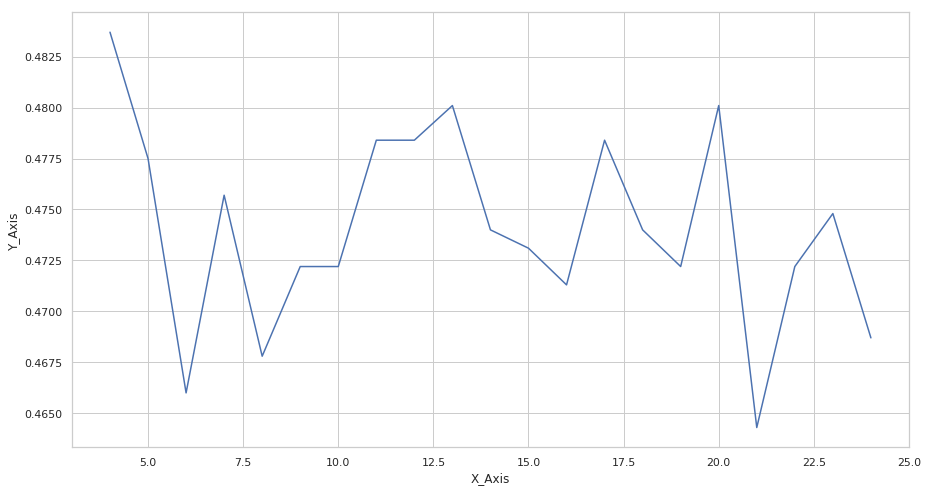

In [0]:
#TRYING DIFFERENT NEIGHBOURS
#Check for different neighbours from 4 to 20
xAxis = list()
yAxis = list()
for i in range(4,25,1):
  knn = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski') #p=2 ,Euclidean distance calculation

  #Fit the model
  knn.fit(data_train, label_train)
  xAxis.append(i)
  #Use the model for pridiction
  y_preds = knn.predict(data_test)
  
  #Model evaluation - check the accuracy score
  knn_accuracy = accuracy_score(label_test,y_preds)
  yAxis.append(round(knn_accuracy,4))
  print('Accuracy score for the KNN model with n_neighbors=', i,":",round(knn_accuracy,4))

linedata = pd.DataFrame({'X_Axis' : xAxis,
                         'Y_Axis' : yAxis})
#print(linedata)
#plot the line graph
fig, ax = plt.subplots(figsize=(15,8))
#sns.set_style("ticks")
sns.set_style("whitegrid")
sns.lineplot(x = 'X_Axis',y = 'Y_Axis', data=linedata,ax=ax)

knn_accuracy = max(yAxis)

## 5.Modelling and Prediction(Logistic Regression)
#### 5(a) Instantiate Logistic Regression
#### 5(b) Fit the model
#### 5(c) Use the model for prediction
#### 5(d) Model Evaluation using Accuracy score

In [0]:
#Instantiate Logistic Regression
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()

#Fit the model
logis.fit(data_train, label_train)

#Use the model for prediction
y_pred = logis.predict(data_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
#Model evaluation using Accuracy score
from sklearn.metrics import accuracy_score
logit_accuracy = accuracy_score(label_test,y_pred)
print('Accuracy score for the Logistic model:', logit_accuracy)

Accuracy score for the Logistic model: 0.5454545454545454


## 5.Modelling and Prediction(Decision Tree)
#### 5(a) Instantiate Logistic Regression
#### 5(b) Fit the model
#### 5(c) Use the model for prediction
#### 5(d) Model Evaluation using Accuracy score

In [0]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(random_state = 0)
dtree.fit(data_train, label_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [0]:
from graphviz import Source
graph = Source( tree.export_graphviz(dtree, out_file=None,filled=True, 
                                rounded=True,  
                                special_characters=True, feature_names=temp_wine.columns))
graph.format = 'png'
graph.render('dtree_render',view=True)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.324005 to fit


'dtree_render.png'

In [0]:
#Use the model for prediction
y_pred_tree = dtree.predict(data_test)
print("Instantiated logistic regression, fit the model and complete prediction")

Instantiated logistic regression, fit the model and complete prediction


In [0]:
#Model evaluation using Accuracy score
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(label_test,y_pred_tree)
print('Accuracy score for the Decision Tree model:', dtree_accuracy)

Accuracy score for the Decision Tree model: 0.6195939982347749


In [0]:
# Decision Tree with Gridsearch
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0)


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            

grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(data_train, label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                         

In [0]:
#use the model for prediction
y_pred_tree_cv = grid_search.predict(data_test)

In [0]:
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(label_test,y_pred_tree_cv)
print('Accuracy score for Decision Tree model using grid search is:',dtree_accuracy )

Accuracy score for Decision Tree model using grid search is: 0.617828773168579


In [0]:
#Model evaluation using confustion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(label_test, y_pred_tree_cv))

#get the quality data
qlty_data = wine_data.quality.unique().tolist()
#print(type(qlty_data))
qlty_data.sort(reverse=False)
#print(qlty_data)
indexName = list()
colName = list()
for quality_no in qlty_data:
  indexName.append('Act ' + str(quality_no))
  colName.append('Pred ' + str(quality_no))
#print(indexName)

#confusion_matrix.index = ['Actual Poor','Actual Good','Actual Excellent']
confusion_matrix.index = indexName
#confusion_matrix.columns = ['Predicted Poor','Predicted Good','Predicted Excellent']
confusion_matrix.columns = colName
print(confusion_matrix)

       Pred 3  Pred 4  Pred 5  Pred 6  Pred 7  Pred 8  Pred 9
Act 3       0       1       1       2       0       0       0
Act 4       0       7      13      13       5       0       0
Act 5       2      13     234      79      12       2       0
Act 6       0      12      96     333      74       8       1
Act 7       0       0      19      55     110      10       0
Act 8       0       0       3       4       8      16       0
Act 9       0       0       0       0       0       0       0


## 5. Model comparison using accuracy score

In [0]:
#model5 = pd.DataFrame({
#        'Model'          : ['LogReg_WO-Outliers-QltyBin-Type', 'kNN_WO-Outliers-QltyBin-Type'],
#        'Accuracy_score' : [logit_accuracy, knn_accuracy]
#    })
#models = models.append(model5,ignore_index=True)
#models.drop_duplicates(subset = None, keep = 'first', inplace = True) 
#models = models.sort_index(ascending=True)

#models

model5 = pd.DataFrame({
        'ModelName'         : ['Model 5'],
        'Scaled?'           : ['No'],
        'Outliers?'         : ['No'],
        'Include Type?'     : ['No'],
        'Added Qlty Cat?'   : ['No'],
        'Added Wts?'        : ['No'],
        'Logit_score'       : [logit_accuracy],
        'KNN_score'         : [knn_accuracy],
        'DTREE_score'       : [dtree_accuracy]
    })
models = models.append(model5,ignore_index=True)
models.drop_duplicates(subset = None, keep = 'first', inplace = True) 
models.sort_values(by='ModelName', ascending=True)

models

,ModelName,Scaled?,Outliers?,Include Type?,Added Qlty Cat?,Added Wts?,Logit_score,KNN_score,DTREE_score
0,Model 1,No,Yes,No,No,No,0.522308,0.482308,0.585385
1,Model 1A,No,Yes,No,No,Yes,0.441538,0.617692,0.600000
2,Model 2,No,Yes,Yes,No,No,0.517692,0.480800,0.590000
3,Model 2A,No,Yes,Yes,No,Yes,0.433846,0.616200,0.585385
4,Model 3,No,Yes,Yes,Yes,No,0.819231,0.803800,0.845385
5,Model 3A,No,Yes,Yes,Yes,Yes,0.790769,0.870000,0.833846
6,Model 4,No,Yes,No,Yes,No,0.820769,0.804600,0.837692
7,Model 4A,No,Yes,No,Yes,Yes,0.790769,0.870800,0.840769
8,Model 5,No,No,No,No,No,0.545455,0.483700,0.617829


## Observation
#### By cleaning up for outliers and ignoring the type data and data not scaled, we see an  decrease in the accuracy.

#### Let us try to see if adding weights can help in increasing the accuracy?

## 5A) Try with added weights for KNN Model , Logistic Regression and Decision Tree- where data is cleaned for outliers but not scaled and ignore type and try to predict the quality

## 5A. Modelling and prediction(KNN)
#### 5A(a) Instantiate K nearest neighbour Classifier
#### 5A(b) Fit the model
#### 5A(c) Use the model for prediction
#### 5A(d) Model evaluation using accuracy score

In [0]:
#Modelling and prediction
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski',weights='distance') #p=2 ,Euclidean distance calculation with added weights

#Fit the Model
knn.fit(data_train, label_train)

#Use the model for prediction
y_preds = knn.predict(data_test)

#Model evaluation using accuracy score
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(label_test,y_preds)
print('Accuracy score for the KNN model:', knn_accuracy)

Accuracy score for the KNN model: 0.5719329214474845


#### 5A(e)Trying different neighbour (n) values to see if the accuracy increases

Accuracy score for the KNN model with n_neighbors= 4 : 0.5728
Accuracy score for the KNN model with n_neighbors= 5 : 0.5666
Accuracy score for the KNN model with n_neighbors= 6 : 0.5702
Accuracy score for the KNN model with n_neighbors= 7 : 0.5719
Accuracy score for the KNN model with n_neighbors= 8 : 0.5816
Accuracy score for the KNN model with n_neighbors= 9 : 0.5984
Accuracy score for the KNN model with n_neighbors= 10 : 0.6011
Accuracy score for the KNN model with n_neighbors= 11 : 0.6028
Accuracy score for the KNN model with n_neighbors= 12 : 0.5984
Accuracy score for the KNN model with n_neighbors= 13 : 0.6055
Accuracy score for the KNN model with n_neighbors= 14 : 0.6064
Accuracy score for the KNN model with n_neighbors= 15 : 0.6064
Accuracy score for the KNN model with n_neighbors= 16 : 0.6064
Accuracy score for the KNN model with n_neighbors= 17 : 0.6081
Accuracy score for the KNN model with n_neighbors= 18 : 0.6117
Accuracy score for the KNN model with n_neighbors= 19 : 0.609

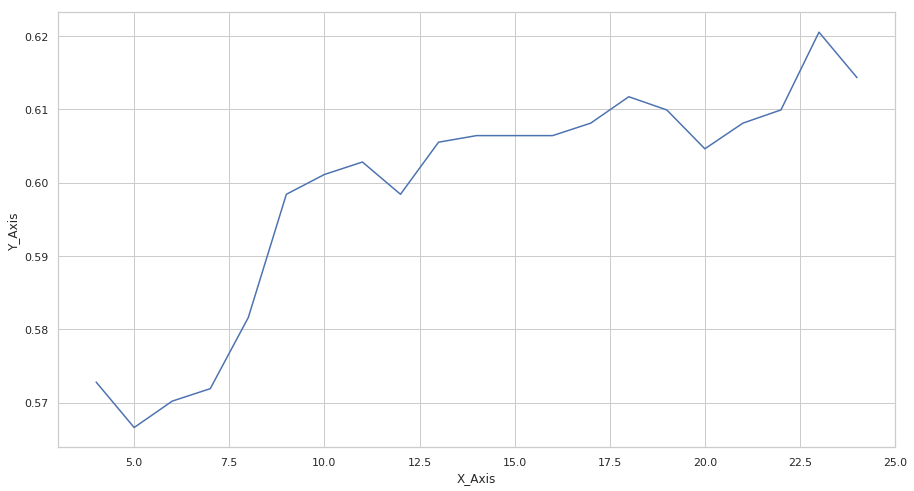

In [0]:
#TRYING DIFFERENT NEIGHBOURS
#Check for different neighbours from 4 to 20
xAxis = list()
yAxis = list()
for i in range(4,25,1):
  knn = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski',weights='distance') #p=2 ,Euclidean distance calculation with added weights

  #Fit the model
  knn.fit(data_train, label_train)
  xAxis.append(i)
  #Use the model for pridiction
  y_preds = knn.predict(data_test)
  
  #Model evaluation - check the accuracy score
  knn_accuracy = accuracy_score(label_test,y_preds)
  yAxis.append(round(knn_accuracy,4))
  print('Accuracy score for the KNN model with n_neighbors=', i,":",round(knn_accuracy,4))

linedata = pd.DataFrame({'X_Axis' : xAxis,
                         'Y_Axis' : yAxis})
#print(linedata)
#plot the line graph
fig, ax = plt.subplots(figsize=(15,8))
#sns.set_style("ticks")
sns.set_style("whitegrid")
sns.lineplot(x = 'X_Axis',y = 'Y_Axis', data=linedata,ax=ax)

knn_accuracy = max(yAxis)

## 5A.Modelling and Prediction(Logistic Regression)
#### 5A(a) Instantiate Logistic Regression
#### 5A(b) Fit the model
#### 5A(c) Use the model for prediction
#### 5A(d) Model Evaluation using Accuracy score

In [0]:
#Instantiate Logistic Regression
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression(class_weight='balanced') #with added weights

#Fit the model
logis.fit(data_train, label_train)

#Use the model for prediction
y_pred = logis.predict(data_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
#Model evaluation using Accuracy score
from sklearn.metrics import accuracy_score
logit_accuracy = accuracy_score(label_test,y_pred)
print('Accuracy score for the Logistic model:', logit_accuracy)

Accuracy score for the Logistic model: 0.4227714033539276


## 5A.Modelling and Prediction(Decision Tree)
#### 5A(a) Instantiate Logistic Regression
#### 5A(b) Fit the model
#### 5A(c) Use the model for prediction
#### 5A(d) Model Evaluation using Accuracy score

In [0]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(random_state = 0)
dtree.fit(data_train, label_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [0]:
from graphviz import Source
graph = Source( tree.export_graphviz(dtree, out_file=None,filled=True, 
                                rounded=True,  
                                special_characters=True, feature_names=temp_wine.columns))
graph.format = 'png'
graph.render('dtree_render',view=True)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.324005 to fit


'dtree_render.png'

In [0]:
#Use the model for prediction
y_pred_tree = dtree.predict(data_test)
print("Instantiated logistic regression, fit the model and complete prediction")

Instantiated logistic regression, fit the model and complete prediction


In [0]:
#Model evaluation using Accuracy score
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(label_test,y_pred_tree)
print('Accuracy score for the Decision Tree model:', dtree_accuracy)

Accuracy score for the Decision Tree model: 0.6195939982347749


In [0]:
# Decision Tree with Gridsearch
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0,class_weight='balanced') #with added weights


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            

grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(data_train, label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                   

In [0]:
#use the model for prediction
y_pred_tree_cv = grid_search.predict(data_test)

In [0]:
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(label_test,y_pred_tree_cv)
print('Accuracy score for Decision Tree model using grid search is:',dtree_accuracy )

Accuracy score for Decision Tree model using grid search is: 0.5904677846425419


In [0]:
#Model evaluation using confustion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(label_test, y_pred_tree_cv))

#get the quality data
qlty_data = wine_data.quality.unique().tolist()
#print(type(qlty_data))
qlty_data.sort(reverse=False)
#print(qlty_data)
indexName = list()
colName = list()
for quality_no in qlty_data:
  indexName.append('Act ' + str(quality_no))
  colName.append('Pred ' + str(quality_no))
#print(indexName)

#confusion_matrix.index = ['Actual Poor','Actual Good','Actual Excellent']
confusion_matrix.index = indexName
#confusion_matrix.columns = ['Predicted Poor','Predicted Good','Predicted Excellent']
confusion_matrix.columns = colName
print(confusion_matrix)

       Pred 3  Pred 4  Pred 5  Pred 6  Pred 7  Pred 8  Pred 9
Act 3       0       0       3       0       0       1       0
Act 4       0      10      15      11       2       0       0
Act 5       4       8     217      95      14       4       0
Act 6       1      17      97     322      72      13       2
Act 7       0       1      20      61     107       5       0
Act 8       0       0       2      11       5      13       0
Act 9       0       0       0       0       0       0       0


## 5A. Model comparison using accuracy score

In [0]:
#model5 = pd.DataFrame({
#        'Model'          : ['LogReg_WO-Outliers-QltyBin-Type', 'kNN_WO-Outliers-QltyBin-Type'],
#        'Accuracy_score' : [logit_accuracy, knn_accuracy]
#    })
#models = models.append(model5,ignore_index=True)
#models.drop_duplicates(subset = None, keep = 'first', inplace = True) 
#models = models.sort_index(ascending=True)

#models

model5A = pd.DataFrame({
        'ModelName'         : ['Model 5A'],
        'Scaled?'           : ['No'],
        'Outliers?'         : ['No'],
        'Include Type?'     : ['No'],
        'Added Qlty Cat?'   : ['No'],
        'Added Wts?'        : ['Yes'],
        'Logit_score'       : [logit_accuracy],
        'KNN_score'         : [knn_accuracy],
        'DTREE_score'       : [dtree_accuracy]
    })
models = models.append(model5A,ignore_index=True)
models.drop_duplicates(subset = None, keep = 'first', inplace = True) 
models.sort_values(by='ModelName', ascending=True)

models

,ModelName,Scaled?,Outliers?,Include Type?,Added Qlty Cat?,Added Wts?,Logit_score,KNN_score,DTREE_score
0,Model 1,No,Yes,No,No,No,0.522308,0.482308,0.585385
1,Model 1A,No,Yes,No,No,Yes,0.441538,0.617692,0.600000
2,Model 2,No,Yes,Yes,No,No,0.517692,0.480800,0.590000
3,Model 2A,No,Yes,Yes,No,Yes,0.433846,0.616200,0.585385
4,Model 3,No,Yes,Yes,Yes,No,0.819231,0.803800,0.845385
5,Model 3A,No,Yes,Yes,Yes,Yes,0.790769,0.870000,0.833846
6,Model 4,No,Yes,No,Yes,No,0.820769,0.804600,0.837692
7,Model 4A,No,Yes,No,Yes,Yes,0.790769,0.870800,0.840769
8,Model 5,No,No,No,No,No,0.545455,0.483700,0.617829
9,Model 5A,No,No,No,No,Yes,0.422771,0.620500,0.590468


## Observation
#### By Addign weights and cleaning up for outliers and ignoring type data and not scaled data, we see an  increase in the accuracy with 60% for KNN n =10 and 62% for n=20

#### Let us try to see if adding Type dummification can help in increasing the accuracy?

## 6) Let us Try KNN Model , Logistic Regression and Decision Tree- where data is cleaned for outliers but not scaled and we add the type and try to predict the quality

### Prepare the data
#### Clean the data for outliers from red and white wine
#### Add the Type column using dummies
#### Train / Test Split and check the shape

In [0]:
#TRY with DATA CLEANING BUT NOT Standardized Data
wine_data = pd.concat([redwine_datacleaned, whitewine_datacleaned], ignore_index=True)

#Get dummies for Type
wine_data = pd.get_dummies(wine_data, columns=['Type'], drop_first=True)
print('Dummies created for Type')

#Remove type after dummification
temp_wine = wine_data.loc[:,wine_data.columns != 'Type']

#Label the quality column
label = temp_wine.pop('quality')
print('quality label created')

Dummies created for Type
quality label created


In [0]:
#Train/Test data and check shape
from sklearn.model_selection import train_test_split
#data_train, data_test, label_train, label_test = train_test_split(wine_scale, label, test_size = 0.2, random_state = 42)
data_train, data_test, label_train, label_test = train_test_split(temp_wine, label, test_size = 0.2, random_state = 42)

print('There are {} samples in the training set and {} samples in the test set'.format(data_train.shape[0], data_test.shape[0]))

There are 4531 samples in the training set and 1133 samples in the test set


## 6. Modelling and prediction(KNN)
#### 6(a) Instantiate K nearest neighbour Classifier
#### 6(b) Fit the model
#### 6(c) Use the model for prediction
#### 6(d) Model evaluation using accuracy score

In [0]:
#Modelling and prediction
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski') #p=2 ,Euclidean distance calculation

#Fit the Model
knn.fit(data_train, label_train)

#Use the model for prediction
y_preds = knn.predict(data_test)

#Model evaluation using accuracy score
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(label_test,y_preds)
print('Accuracy score for the KNN model:', knn_accuracy)

Accuracy score for the KNN model: 0.4766107678729038


#### 6(e)Trying different neighbour (n) values to see if the accuracy increases

Accuracy score for the KNN model with n_neighbors= 4 : 0.4819
Accuracy score for the KNN model with n_neighbors= 5 : 0.4766
Accuracy score for the KNN model with n_neighbors= 6 : 0.4643
Accuracy score for the KNN model with n_neighbors= 7 : 0.4766
Accuracy score for the KNN model with n_neighbors= 8 : 0.4687
Accuracy score for the KNN model with n_neighbors= 9 : 0.4731
Accuracy score for the KNN model with n_neighbors= 10 : 0.4731
Accuracy score for the KNN model with n_neighbors= 11 : 0.4766
Accuracy score for the KNN model with n_neighbors= 12 : 0.4801
Accuracy score for the KNN model with n_neighbors= 13 : 0.481
Accuracy score for the KNN model with n_neighbors= 14 : 0.474
Accuracy score for the KNN model with n_neighbors= 15 : 0.474
Accuracy score for the KNN model with n_neighbors= 16 : 0.4722
Accuracy score for the KNN model with n_neighbors= 17 : 0.4766
Accuracy score for the KNN model with n_neighbors= 18 : 0.4695
Accuracy score for the KNN model with n_neighbors= 19 : 0.4731
A

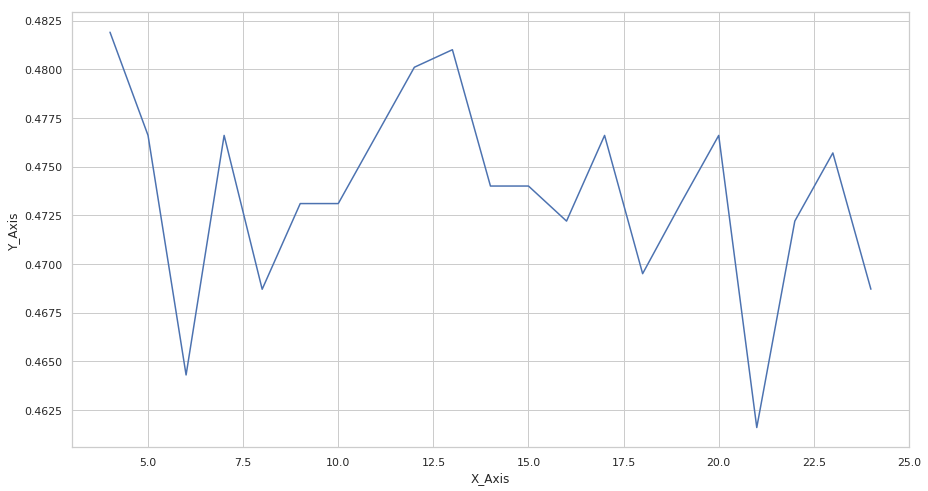

In [0]:
#TRYING DIFFERENT NEIGHBOURS
#Check for different neighbours from 4 to 20
xAxis = list()
yAxis = list()
for i in range(4,25,1):
  knn = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski') #p=2 ,Euclidean distance calculation

  #Fit the model
  knn.fit(data_train, label_train)
  xAxis.append(i)
  #Use the model for pridiction
  y_preds = knn.predict(data_test)
  
  #Model evaluation - check the accuracy score
  knn_accuracy = accuracy_score(label_test,y_preds)
  yAxis.append(round(knn_accuracy,4))
  print('Accuracy score for the KNN model with n_neighbors=', i,":",round(knn_accuracy,4))

linedata = pd.DataFrame({'X_Axis' : xAxis,
                         'Y_Axis' : yAxis})
#print(linedata)
#plot the line graph
fig, ax = plt.subplots(figsize=(15,8))
#sns.set_style("ticks")
sns.set_style("whitegrid")
sns.lineplot(x = 'X_Axis',y = 'Y_Axis', data=linedata,ax=ax)

knn_accuracy = max(yAxis)

## 6.Modelling and Prediction(Logistic Regression)
#### 6(a) Instantiate Logistic Regression
#### 6(b) Fit the model
#### 6(c) Use the model for prediction
#### 6(d) Model Evaluation using Accuracy score

In [0]:
#Instantiate Logistic Regression
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()

#Fit the model
logis.fit(data_train, label_train)

#Use the model for prediction
y_pred = logis.predict(data_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
#Model evaluation using Accuracy score
from sklearn.metrics import accuracy_score
logit_accuracy = accuracy_score(label_test,y_pred)
print('Accuracy score for the Logistic model:', logit_accuracy)

Accuracy score for the Logistic model: 0.5472197705207414


## 6.Modelling and Prediction(Decision Tree)
#### 6(a) Instantiate Logistic Regression
#### 6(b) Fit the model
#### 6(c) Use the model for prediction
#### 6(d) Model Evaluation using Accuracy score

In [0]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(random_state = 0)
dtree.fit(data_train, label_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [0]:
from graphviz import Source
graph = Source( tree.export_graphviz(dtree, out_file=None,filled=True, 
                                rounded=True,  
                                special_characters=True, feature_names=temp_wine.columns))
graph.format = 'png'
graph.render('dtree_render',view=True)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.320143 to fit


'dtree_render.png'

In [0]:
#Use the model for prediction
y_pred_tree = dtree.predict(data_test)
print("Instantiated logistic regression, fit the model and complete prediction")

Instantiated logistic regression, fit the model and complete prediction


In [0]:
#Model evaluation using Accuracy score
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(label_test,y_pred_tree)
print('Accuracy score for the Decision Tree model:', dtree_accuracy)

Accuracy score for the Decision Tree model: 0.6134157105030892


In [0]:
# Decision Tree with Gridsearch
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0)


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            

grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(data_train, label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                         

In [0]:
#use the model for prediction
y_pred_tree_cv = grid_search.predict(data_test)

In [0]:
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(label_test,y_pred_tree_cv)
print('Accuracy score for Decision Tree model using grid search is:',dtree_accuracy )

Accuracy score for Decision Tree model using grid search is: 0.5992939099735216


In [0]:
#Model evaluation using confustion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(label_test, y_pred_tree_cv))

#get the quality data
qlty_data = wine_data.quality.unique().tolist()
#print(type(qlty_data))
qlty_data.sort(reverse=False)
#print(qlty_data)
indexName = list()
colName = list()
for quality_no in qlty_data:
  indexName.append('Act ' + str(quality_no))
  colName.append('Pred ' + str(quality_no))
#print(indexName)

#confusion_matrix.index = ['Actual Poor','Actual Good','Actual Excellent']
confusion_matrix.index = indexName
#confusion_matrix.columns = ['Predicted Poor','Predicted Good','Predicted Excellent']
confusion_matrix.columns = colName
print(confusion_matrix)

       Pred 3  Pred 4  Pred 5  Pred 6  Pred 7  Pred 8  Pred 9
Act 3       0       1       3       0       0       0       0
Act 4       0       6      14      15       2       1       0
Act 5       2      11     228      79      19       3       0
Act 6       2       9     105     327      64      17       0
Act 7       0       2      18      61     104       9       0
Act 8       0       0       2       6       8      14       1
Act 9       0       0       0       0       0       0       0


## 6. Model comparison using accuracy score

In [0]:
#model6 = pd.DataFrame({
#        'Model'          : ['LogReg_WO-Outliers-QltyBin_&_W-Type', 'kNN_WO-Outliers-QltyBin_&_W-Type'],
#        'Accuracy_score' : [logit_accuracy, knn_accuracy]
#    })
#models = models.append(model6,ignore_index=True)
#models.drop_duplicates(subset = None, keep = 'first', inplace = True) 
#models = models.sort_index(ascending=True)

#models

model6 = pd.DataFrame({
        'ModelName'         : ['Model 6'],
        'Scaled?'           : ['No'],
        'Outliers?'         : ['No'],
        'Include Type?'     : ['Yes'],
        'Added Qlty Cat?'   : ['No'],
        'Added Wts?'        : ['No'],
        'Logit_score'       : [logit_accuracy],
        'KNN_score'         : [knn_accuracy],
        'DTREE_score'       : [dtree_accuracy]
    })
models = models.append(model6,ignore_index=True)
models.drop_duplicates(subset = None, keep = 'first', inplace = True) 
models.sort_values(by='ModelName', ascending=True)

models

,ModelName,Scaled?,Outliers?,Include Type?,Added Qlty Cat?,Added Wts?,Logit_score,KNN_score,DTREE_score
0,Model 1,No,Yes,No,No,No,0.522308,0.482308,0.585385
1,Model 1A,No,Yes,No,No,Yes,0.441538,0.617692,0.600000
2,Model 2,No,Yes,Yes,No,No,0.517692,0.480800,0.590000
3,Model 2A,No,Yes,Yes,No,Yes,0.433846,0.616200,0.585385
4,Model 3,No,Yes,Yes,Yes,No,0.819231,0.803800,0.845385
5,Model 3A,No,Yes,Yes,Yes,Yes,0.790769,0.870000,0.833846
6,Model 4,No,Yes,No,Yes,No,0.820769,0.804600,0.837692
7,Model 4A,No,Yes,No,Yes,Yes,0.790769,0.870800,0.840769
8,Model 5,No,No,No,No,No,0.545455,0.483700,0.617829
9,Model 5A,No,No,No,No,Yes,0.422771,0.620500,0.590468


## Observation
#### By including the type data also we see dont see any increase in the accuracy and hence we add the new label qaulityclass and segment quality into 3 categories poor, good and excellent,  to see if it improves the accuracy

#### Let us try to see if adding weights  can help in increasing the accuracy?

##6A) Let us try with added weights for KNN Model , Logistic Regression and Decision Tree- where data is cleaned for outliers but not scaled and we add the type and try to predict the quality

## 6A. Modelling and prediction(KNN)
#### 6A(a) Instantiate K nearest neighbour Classifier
#### 6A(b) Fit the model
#### 6A(c) Use the model for prediction
#### 6A(d) Model evaluation using accuracy score

In [0]:
#Modelling and prediction
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski',weights='distance') #p=2 ,Euclidean distance calculation with added weights

#Fit the Model
knn.fit(data_train, label_train)

#Use the model for prediction
y_preds = knn.predict(data_test)

#Model evaluation using accuracy score
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(label_test,y_preds)
print('Accuracy score for the KNN model:', knn_accuracy)

Accuracy score for the KNN model: 0.5736981465136805


#### 6A(e)Trying different neighbour (n) values to see if the accuracy increases

Accuracy score for the KNN model with n_neighbors= 4 : 0.5728
Accuracy score for the KNN model with n_neighbors= 5 : 0.5684
Accuracy score for the KNN model with n_neighbors= 6 : 0.5711
Accuracy score for the KNN model with n_neighbors= 7 : 0.5737
Accuracy score for the KNN model with n_neighbors= 8 : 0.5825
Accuracy score for the KNN model with n_neighbors= 9 : 0.5966
Accuracy score for the KNN model with n_neighbors= 10 : 0.6019
Accuracy score for the KNN model with n_neighbors= 11 : 0.6055
Accuracy score for the KNN model with n_neighbors= 12 : 0.6011
Accuracy score for the KNN model with n_neighbors= 13 : 0.6064
Accuracy score for the KNN model with n_neighbors= 14 : 0.6064
Accuracy score for the KNN model with n_neighbors= 15 : 0.6099
Accuracy score for the KNN model with n_neighbors= 16 : 0.6081
Accuracy score for the KNN model with n_neighbors= 17 : 0.6081
Accuracy score for the KNN model with n_neighbors= 18 : 0.6125
Accuracy score for the KNN model with n_neighbors= 19 : 0.609

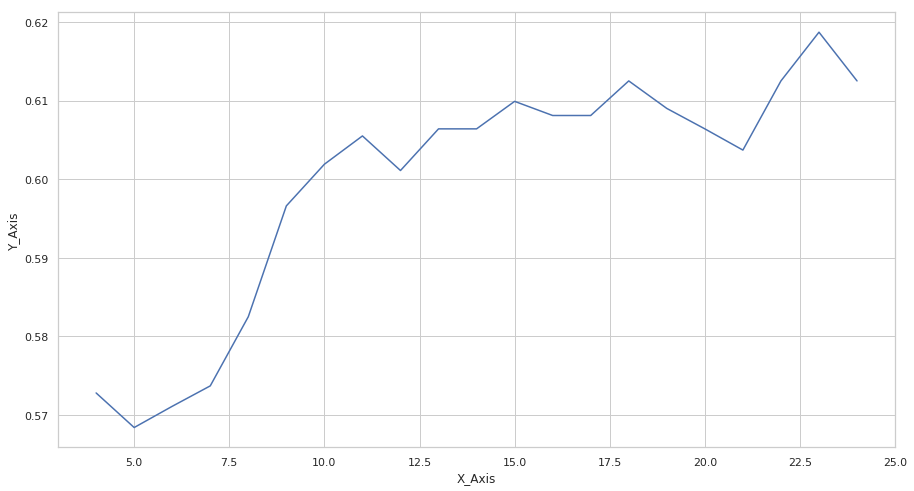

In [0]:
#TRYING DIFFERENT NEIGHBOURS
#Check for different neighbours from 4 to 20
xAxis = list()
yAxis = list()
for i in range(4,25,1):
  knn = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski',weights='distance') #p=2 ,Euclidean distance calculation with added weights

  #Fit the model
  knn.fit(data_train, label_train)
  xAxis.append(i)
  #Use the model for pridiction
  y_preds = knn.predict(data_test)
  
  #Model evaluation - check the accuracy score
  knn_accuracy = accuracy_score(label_test,y_preds)
  yAxis.append(round(knn_accuracy,4))
  print('Accuracy score for the KNN model with n_neighbors=', i,":",round(knn_accuracy,4))

linedata = pd.DataFrame({'X_Axis' : xAxis,
                         'Y_Axis' : yAxis})
#print(linedata)
#plot the line graph
fig, ax = plt.subplots(figsize=(15,8))
#sns.set_style("ticks")
sns.set_style("whitegrid")
sns.lineplot(x = 'X_Axis',y = 'Y_Axis', data=linedata,ax=ax)

knn_accuracy = max(yAxis)

## 6A.Modelling and Prediction(Logistic Regression)
#### 6A(a) Instantiate Logistic Regression
#### 6A(b) Fit the model
#### 6A(c) Use the model for prediction
#### 6A(d) Model Evaluation using Accuracy score

In [0]:
#Instantiate Logistic Regression
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression(class_weight='balanced') #with added weights

#Fit the model
logis.fit(data_train, label_train)

#Use the model for prediction
y_pred = logis.predict(data_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
#Model evaluation using Accuracy score
from sklearn.metrics import accuracy_score
logit_accuracy = accuracy_score(label_test,y_pred)
print('Accuracy score for the Logistic model:', logit_accuracy)

Accuracy score for the Logistic model: 0.4298323036187114


## 6A.Modelling and Prediction(Decision Tree)
#### 6A(a) Instantiate Logistic Regression
#### 6A(b) Fit the model
#### 6A(c) Use the model for prediction
#### 6A(d) Model Evaluation using Accuracy score

In [0]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(random_state = 0,class_weight='balanced') #with added weights
dtree.fit(data_train, label_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [0]:
from graphviz import Source
graph = Source( tree.export_graphviz(dtree, out_file=None,filled=True, 
                                rounded=True,  
                                special_characters=True, feature_names=temp_wine.columns))
graph.format = 'png'
graph.render('dtree_render',view=True)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.182549 to fit


'dtree_render.png'

In [0]:
#Use the model for prediction
y_pred_tree = dtree.predict(data_test)
print("Instantiated logistic regression, fit the model and complete prediction")

Instantiated logistic regression, fit the model and complete prediction


In [0]:
#Model evaluation using Accuracy score
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(label_test,y_pred_tree)
print('Accuracy score for the Decision Tree model:', dtree_accuracy)

Accuracy score for the Decision Tree model: 0.6116504854368932


In [0]:
# Decision Tree with Gridsearch
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0,class_weight='balanced') #with added weights


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            

grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(data_train, label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                   

In [0]:
#use the model for prediction
y_pred_tree_cv = grid_search.predict(data_test)

In [0]:
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(label_test,y_pred_tree_cv)
print('Accuracy score for Decision Tree model using grid search is:',dtree_accuracy )

Accuracy score for Decision Tree model using grid search is: 0.6072374227714034


In [0]:
#Model evaluation using confustion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(label_test, y_pred_tree_cv))

#get the quality data
qlty_data = wine_data.quality.unique().tolist()
#print(type(qlty_data))
qlty_data.sort(reverse=False)
#print(qlty_data)
indexName = list()
colName = list()
for quality_no in qlty_data:
  indexName.append('Act ' + str(quality_no))
  colName.append('Pred ' + str(quality_no))
#print(indexName)

#confusion_matrix.index = ['Actual Poor','Actual Good','Actual Excellent']
confusion_matrix.index = indexName
#confusion_matrix.columns = ['Predicted Poor','Predicted Good','Predicted Excellent']
confusion_matrix.columns = colName
print(confusion_matrix)

       Pred 3  Pred 4  Pred 5  Pred 6  Pred 7  Pred 8  Pred 9
Act 3       0       1       2       1       0       0       0
Act 4       0       9      12      12       3       2       0
Act 5       0      14     216      96      16       0       0
Act 6       0      10      88     335      76      12       3
Act 7       0       1      18      51     115       9       0
Act 8       0       0       1       7      10      13       0
Act 9       0       0       0       0       0       0       0


## 6A. Model comparison using accuracy score

In [0]:
#model6 = pd.DataFrame({
#        'Model'          : ['LogReg_WO-Outliers-QltyBin_&_W-Type', 'kNN_WO-Outliers-QltyBin_&_W-Type'],
#        'Accuracy_score' : [logit_accuracy, knn_accuracy]
#    })
#models = models.append(model6,ignore_index=True)
#models.drop_duplicates(subset = None, keep = 'first', inplace = True) 
#models = models.sort_index(ascending=True)

#models

model6A = pd.DataFrame({
        'ModelName'         : ['Model 6A'],
        'Scaled?'           : ['No'],
        'Outliers?'         : ['No'],
        'Include Type?'     : ['Yes'],
        'Added Qlty Cat?'   : ['No'],
        'Added Wts?'        : ['Yes'],
        'Logit_score'       : [logit_accuracy],
        'KNN_score'         : [knn_accuracy],
        'DTREE_score'       : [dtree_accuracy]
    })
models = models.append(model6A,ignore_index=True)
models.drop_duplicates(subset = None, keep = 'first', inplace = True) 
models.sort_values(by='ModelName', ascending=True)

models

,ModelName,Scaled?,Outliers?,Include Type?,Added Qlty Cat?,Added Wts?,Logit_score,KNN_score,DTREE_score
0,Model 1,No,Yes,No,No,No,0.522308,0.482308,0.585385
1,Model 1A,No,Yes,No,No,Yes,0.441538,0.617692,0.600000
2,Model 2,No,Yes,Yes,No,No,0.517692,0.480800,0.590000
3,Model 2A,No,Yes,Yes,No,Yes,0.433846,0.616200,0.585385
4,Model 3,No,Yes,Yes,Yes,No,0.819231,0.803800,0.845385
5,Model 3A,No,Yes,Yes,Yes,Yes,0.790769,0.870000,0.833846
6,Model 4,No,Yes,No,Yes,No,0.820769,0.804600,0.837692
7,Model 4A,No,Yes,No,Yes,Yes,0.790769,0.870800,0.840769
8,Model 5,No,No,No,No,No,0.545455,0.483700,0.617829
9,Model 5A,No,No,No,No,Yes,0.422771,0.620500,0.590468


## Observation
#### By adding weights we see an increase in accuracy for KNN (including the type data, removing the outliers and unscaled data)

#### Let us try to see if quality new categories  can help in increasing the accuracy?

## 7) Let us Try KNN Model , Logistic Regression and Decision Tree- where data is cleaned for outliers but not scaled and we add the type and add  3 new category to quality and try to predict qualityclass

### Prepare the data
#### Clean the data for outliers from red and white wine
#### Add the Type column using dummies
#### Add the 3 categores for quality column using lambda and drop quality
#### Train / Test Split and check the shape

In [0]:
#TRY with DATA CLEANING BUT NOT Standardized Data
wine_data = pd.concat([redwine_datacleaned, whitewine_datacleaned], ignore_index=True)

#Get dummies for Type
wine_data = pd.get_dummies(wine_data, columns=['Type'], drop_first=True)
print('Dummies created for Type')

#create the 3 new category
wine_data['qualityclass'] = wine_data.apply(lambda x: 1 if x['quality'] <= 3 else 2 if (x['quality'] > 3 and x['quality'] <= 6) else 3,axis=1)
print('qualityclass created with 3 categories 1 -poor,2 - good and 3 - excellent values')

#Remove type after dummification
temp_wine = wine_data.loc[:,wine_data.columns != 'Type']
temp_wine = temp_wine.loc[:,wine_data.columns != 'quality']

#Label the qualityclass column
label = temp_wine.pop('qualityclass')
print('qualityclass label created')

Dummies created for Type
qualityclass created with 3 categories 1 -poor,2 - good and 3 - excellent values
qualityclass label created


In [0]:
#Train/Test data and check shape
from sklearn.model_selection import train_test_split
#data_train, data_test, label_train, label_test = train_test_split(wine_scale, label, test_size = 0.2, random_state = 42)
data_train, data_test, label_train, label_test = train_test_split(temp_wine, label, test_size = 0.2, random_state = 42)

print('There are {} samples in the training set and {} samples in the test set'.format(data_train.shape[0], data_test.shape[0]))

There are 4531 samples in the training set and 1133 samples in the test set


## 7. Modelling and prediction(KNN)
#### 7(a) Instantiate K nearest neighbour Classifier
#### 7(b) Fit the model
#### 7(c) Use the model for prediction
#### 7(d) Model evaluation using accuracy score

In [0]:
#Modelling and prediction
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski') #p=2 ,Euclidean distance calculation

#Fit the Model
knn.fit(data_train, label_train)

#Use the model for prediction
y_preds = knn.predict(data_test)

#Model evaluation using accuracy score
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(label_test,y_preds)
print('Accuracy score for the KNN model:', knn_accuracy)

Accuracy score for the KNN model: 0.8049426301853486


#### 7(e)Trying different neighbour (n) values to see if the accuracy increases

Accuracy score for the KNN model with n_neighbors= 4 : 0.8155
Accuracy score for the KNN model with n_neighbors= 5 : 0.7979
Accuracy score for the KNN model with n_neighbors= 6 : 0.812
Accuracy score for the KNN model with n_neighbors= 7 : 0.8049
Accuracy score for the KNN model with n_neighbors= 8 : 0.8076
Accuracy score for the KNN model with n_neighbors= 9 : 0.8067
Accuracy score for the KNN model with n_neighbors= 10 : 0.7979
Accuracy score for the KNN model with n_neighbors= 11 : 0.7952
Accuracy score for the KNN model with n_neighbors= 12 : 0.8014
Accuracy score for the KNN model with n_neighbors= 13 : 0.7979
Accuracy score for the KNN model with n_neighbors= 14 : 0.8041
Accuracy score for the KNN model with n_neighbors= 15 : 0.7917
Accuracy score for the KNN model with n_neighbors= 16 : 0.8049
Accuracy score for the KNN model with n_neighbors= 17 : 0.797
Accuracy score for the KNN model with n_neighbors= 18 : 0.8041
Accuracy score for the KNN model with n_neighbors= 19 : 0.797
A

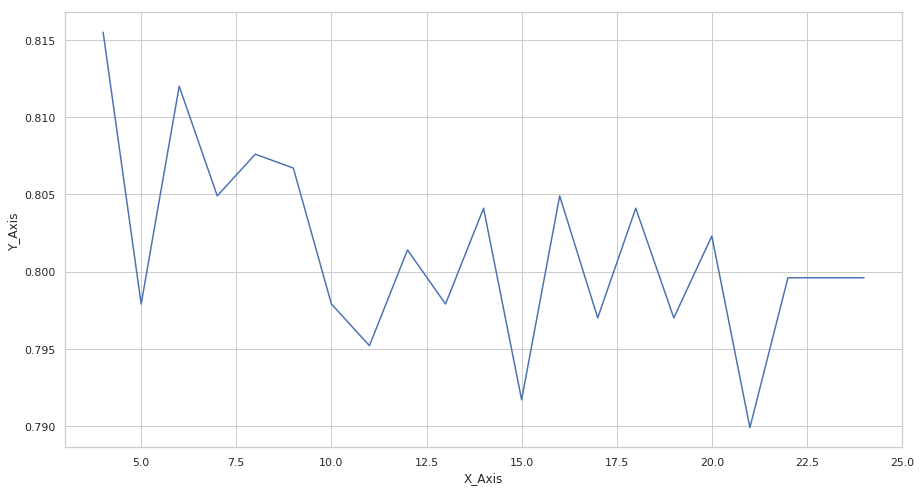

In [0]:
#TRYING DIFFERENT NEIGHBOURS
#Check for different neighbours from 4 to 20
xAxis = list()
yAxis = list()
for i in range(4,25,1):
  knn = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski') #p=2 ,Euclidean distance calculation

  #Fit the model
  knn.fit(data_train, label_train)
  xAxis.append(i)
  #Use the model for pridiction
  y_preds = knn.predict(data_test)
  
  #Model evaluation - check the accuracy score
  knn_accuracy = accuracy_score(label_test,y_preds)
  yAxis.append(round(knn_accuracy,4))
  print('Accuracy score for the KNN model with n_neighbors=', i,":",round(knn_accuracy,4))

linedata = pd.DataFrame({'X_Axis' : xAxis,
                         'Y_Axis' : yAxis})
#print(linedata)
#plot the line graph
fig, ax = plt.subplots(figsize=(15,8))
#sns.set_style("ticks")
sns.set_style("whitegrid")
sns.lineplot(x = 'X_Axis',y = 'Y_Axis', data=linedata,ax=ax)

knn_accuracy = max(yAxis)

## 7.Modelling and Prediction(Logistic Regression)
#### 7(a) Instantiate Logistic Regression
#### 7(b) Fit the model
#### 7(c) Use the model for prediction
#### 7(d) Model Evaluation using Accuracy score

In [0]:
#Instantiate Logistic Regression
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()

#Fit the model
logis.fit(data_train, label_train)

#Use the model for prediction
y_pred = logis.predict(data_test)
print("Instantiated logistic regression, fit the model and complete prediction")

Instantiated logistic regression, fit the model and complete prediction


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
#Model evaluation using Accuracy score
from sklearn.metrics import accuracy_score
logit_accuracy = accuracy_score(label_test,y_pred)
print('Accuracy score for the Logistic model:', logit_accuracy)

Accuracy score for the Logistic model: 0.8075904677846425


## 7.Modelling and Prediction(Decision Tree)
#### 7(a) Instantiate Logistic Regression
#### 7(b) Fit the model
#### 7(c) Use the model for prediction
#### 7(d) Model Evaluation using Accuracy score

In [0]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(random_state = 0)
dtree.fit(data_train, label_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [0]:
from graphviz import Source
graph = Source( tree.export_graphviz(dtree, out_file=None,filled=True, 
                                rounded=True,  
                                special_characters=True, feature_names=temp_wine.columns))
graph.format = 'png'
graph.render('dtree_render',view=True)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.898021 to fit


'dtree_render.png'

In [0]:
#Use the model for prediction
y_pred_tree = dtree.predict(data_test)
print("Instantiated logistic regression, fit the model and complete prediction")

Instantiated logistic regression, fit the model and complete prediction


In [0]:
#Model evaluation using Accuracy score
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(label_test,y_pred_tree)
print('Accuracy score for the Decision Tree model:', dtree_accuracy)

Accuracy score for the Decision Tree model: 0.8323036187113857


In [0]:
# Decision Tree with Gridsearch
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0)


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            

grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(data_train, label_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                         

In [0]:
#use the model for prediction
y_pred_tree_cv = grid_search.predict(data_test)

In [0]:
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(label_test,y_pred_tree_cv)
print('Accuracy score for Decision Tree model using grid search is:',dtree_accuracy )

Accuracy score for Decision Tree model using grid search is: 0.8331862312444837


In [0]:
#Model evaluation using confustion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(label_test, y_pred_tree_cv))

#get the quality data
qlty_data = wine_data.qualityclass.unique().tolist()
#print(type(qlty_data))
qlty_data.sort(reverse=False)
#print(qlty_data)
indexName = list()
colName = list()
for quality_no in qlty_data:
  indexName.append('Act ' + str(quality_no))
  colName.append('Pred ' + str(quality_no))
#print(indexName)

#confusion_matrix.index = ['Actual Poor','Actual Good','Actual Excellent']
confusion_matrix.index = indexName
#confusion_matrix.columns = ['Predicted Poor','Predicted Good','Predicted Excellent']
confusion_matrix.columns = colName
print(confusion_matrix)

       Pred 1  Pred 2  Pred 3
Act 1       0       4       0
Act 2       3     800     101
Act 3       0      81     144


## 7. Model comparison using accuracy score

In [0]:
#model7 = pd.DataFrame({
#        'Model'          : ['LogReg_WO-Outliers_&_W-Type-QltyBin', 'kNN_WO-Outliers_&_W-Type-QltyBin'],
#        'Accuracy_score' : [logit_accuracy, knn_accuracy]
#    })
#models = models.append(model7,ignore_index=True)
#models.drop_duplicates(subset = None, keep = 'first', inplace = True) 
#models = models.sort_index(ascending=True)

#models

model7 = pd.DataFrame({
        'ModelName'         : ['Model 7'],
        'Scaled?'           : ['No'],
        'Outliers?'         : ['No'],
        'Include Type?'     : ['Yes'],
        'Added Qlty Cat?'   : ['Yes'],
        'Added Wts?'        : ['No'],
        'Logit_score'       : [logit_accuracy],
        'KNN_score'         : [knn_accuracy],
        'DTREE_score'       : [dtree_accuracy]
    })
models = models.append(model7,ignore_index=True)
models.drop_duplicates(subset = None, keep = 'first', inplace = True) 
models.sort_values(by='ModelName', ascending=True)

models

,ModelName,Scaled?,Outliers?,Include Type?,Added Qlty Cat?,Added Wts?,Logit_score,KNN_score,DTREE_score
0,Model 1,No,Yes,No,No,No,0.522308,0.482308,0.585385
1,Model 1A,No,Yes,No,No,Yes,0.441538,0.617692,0.600000
2,Model 2,No,Yes,Yes,No,No,0.517692,0.480800,0.590000
3,Model 2A,No,Yes,Yes,No,Yes,0.433846,0.616200,0.585385
4,Model 3,No,Yes,Yes,Yes,No,0.819231,0.803800,0.845385
5,Model 3A,No,Yes,Yes,Yes,Yes,0.790769,0.870000,0.833846
6,Model 4,No,Yes,No,Yes,No,0.820769,0.804600,0.837692
7,Model 4A,No,Yes,No,Yes,Yes,0.790769,0.870800,0.840769
8,Model 5,No,No,No,No,No,0.545455,0.483700,0.617829
9,Model 5A,No,No,No,No,Yes,0.422771,0.620500,0.590468


## Observation
#### By including the type using dummies & adding a new label qaulityclass (segment quality into 3 categories 1-poor, 2-good and 3-excellent) we see the accuracy increased. Decision Tree had the best accuracy of 83%.

#### Let us try to see adding weights can help in increasing the accuracy?

##7A) Try with added weights for KNN Model , Logistic Regression and Decision Tree- where data is cleaned for outliers but not scaled and we add the type and add  3 new category to quality and try to predict qualityclass

## 7A. Modelling and prediction(KNN)
#### 7A(a) Instantiate K nearest neighbour Classifier
#### 7A(b) Fit the model
#### 7A(c) Use the model for prediction
#### 7A(d) Model evaluation using accuracy score

In [0]:
#Modelling and prediction
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski',weights='distance') #p=2 ,Euclidean distance calculation with added weights

#Fit the Model
knn.fit(data_train, label_train)

#Use the model for prediction
y_preds = knn.predict(data_test)

#Model evaluation using accuracy score
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(label_test,y_preds)
print('Accuracy score for the KNN model:', knn_accuracy)

Accuracy score for the KNN model: 0.8428949691085613


#### 7A(e)Trying different neighbour (n) values to see if the accuracy increases

Accuracy score for the KNN model with n_neighbors= 4 : 0.8235
Accuracy score for the KNN model with n_neighbors= 5 : 0.8279
Accuracy score for the KNN model with n_neighbors= 6 : 0.8394
Accuracy score for the KNN model with n_neighbors= 7 : 0.8429
Accuracy score for the KNN model with n_neighbors= 8 : 0.8544
Accuracy score for the KNN model with n_neighbors= 9 : 0.8508
Accuracy score for the KNN model with n_neighbors= 10 : 0.8491
Accuracy score for the KNN model with n_neighbors= 11 : 0.8491
Accuracy score for the KNN model with n_neighbors= 12 : 0.8526
Accuracy score for the KNN model with n_neighbors= 13 : 0.8447
Accuracy score for the KNN model with n_neighbors= 14 : 0.8482
Accuracy score for the KNN model with n_neighbors= 15 : 0.8464
Accuracy score for the KNN model with n_neighbors= 16 : 0.8517
Accuracy score for the KNN model with n_neighbors= 17 : 0.8535
Accuracy score for the KNN model with n_neighbors= 18 : 0.8544
Accuracy score for the KNN model with n_neighbors= 19 : 0.856

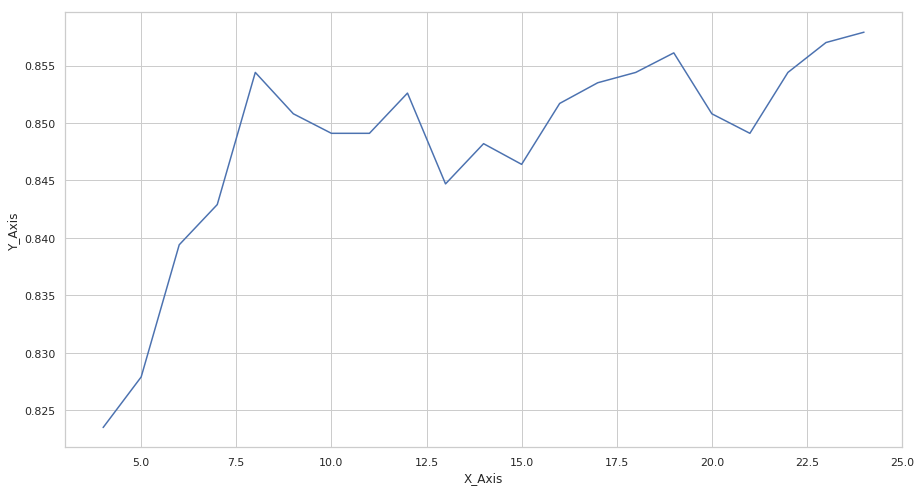

In [0]:
#TRYING DIFFERENT NEIGHBOURS
#Check for different neighbours from 4 to 20
xAxis = list()
yAxis = list()
for i in range(4,25,1):
  knn = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski',weights='distance') #p=2 ,Euclidean distance calculation with added weights

  #Fit the model
  knn.fit(data_train, label_train)
  xAxis.append(i)
  #Use the model for pridiction
  y_preds = knn.predict(data_test)
  
  #Model evaluation - check the accuracy score
  knn_accuracy = accuracy_score(label_test,y_preds)
  yAxis.append(round(knn_accuracy,4))
  print('Accuracy score for the KNN model with n_neighbors=', i,":",round(knn_accuracy,4))

linedata = pd.DataFrame({'X_Axis' : xAxis,
                         'Y_Axis' : yAxis})
#print(linedata)
#plot the line graph
fig, ax = plt.subplots(figsize=(15,8))
#sns.set_style("ticks")
sns.set_style("whitegrid")
sns.lineplot(x = 'X_Axis',y = 'Y_Axis', data=linedata,ax=ax)

knn_accuracy = max(yAxis)

## 7A.Modelling and Prediction(Logistic Regression)
#### 7A(a) Instantiate Logistic Regression
#### 7A(b) Fit the model
#### 7A(c) Use the model for prediction
#### 7A(d) Model Evaluation using Accuracy score

In [0]:
#Instantiate Logistic Regression
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression(class_weight='balanced') #with added weights

#Fit the model
logis.fit(data_train, label_train)

#Use the model for prediction
y_pred = logis.predict(data_test)
print("Instantiated logistic regression, fit the model and complete prediction")

Instantiated logistic regression, fit the model and complete prediction


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
#Model evaluation using Accuracy score
from sklearn.metrics import accuracy_score
logit_accuracy = accuracy_score(label_test,y_pred)
print('Accuracy score for the Logistic model:', logit_accuracy)

Accuracy score for the Logistic model: 0.7784642541924095


## 7A.Modelling and Prediction(Decision Tree)
#### 7A(a) Instantiate Logistic Regression
#### 7A(b) Fit the model
#### 7A(c) Use the model for prediction
#### 7A(d) Model Evaluation using Accuracy score

In [0]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(random_state = 0,class_weight='balanced') #with added weights
dtree.fit(data_train, label_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [0]:
from graphviz import Source
graph = Source( tree.export_graphviz(dtree, out_file=None,filled=True, 
                                rounded=True,  
                                special_characters=True, feature_names=temp_wine.columns))
graph.format = 'png'
graph.render('dtree_render',view=True)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.812432 to fit


'dtree_render.png'

In [0]:
#Use the model for prediction
y_pred_tree = dtree.predict(data_test)
print("Instantiated logistic regression, fit the model and complete prediction")

Instantiated logistic regression, fit the model and complete prediction


In [0]:
#Model evaluation using Accuracy score
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(label_test,y_pred_tree)
print('Accuracy score for the Decision Tree model:', dtree_accuracy)

Accuracy score for the Decision Tree model: 0.8358340688437775


In [0]:
# Decision Tree with Gridsearch
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0,class_weight='balanced') #with added weights


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            

grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(data_train, label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                   

In [0]:
#use the model for prediction
y_pred_tree_cv = grid_search.predict(data_test)

In [0]:
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(label_test,y_pred_tree_cv)
print('Accuracy score for Decision Tree model using grid search is:',dtree_accuracy )

Accuracy score for Decision Tree model using grid search is: 0.8499558693733451


In [0]:
#Model evaluation using confustion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(label_test, y_pred_tree_cv))

#get the quality data
qlty_data = wine_data.qualityclass.unique().tolist()
#print(type(qlty_data))
qlty_data.sort(reverse=False)
#print(qlty_data)
indexName = list()
colName = list()
for quality_no in qlty_data:
  indexName.append('Act ' + str(quality_no))
  colName.append('Pred ' + str(quality_no))
#print(indexName)

#confusion_matrix.index = ['Actual Poor','Actual Good','Actual Excellent']
confusion_matrix.index = indexName
#confusion_matrix.columns = ['Predicted Poor','Predicted Good','Predicted Excellent']
confusion_matrix.columns = colName
print(confusion_matrix)

       Pred 1  Pred 2  Pred 3
Act 1       0       4       0
Act 2       0     825      79
Act 3       0      87     138


## 7A. Model comparison using accuracy score

In [0]:
#model7 = pd.DataFrame({
#        'Model'          : ['LogReg_WO-Outliers_&_W-Type-QltyBin', 'kNN_WO-Outliers_&_W-Type-QltyBin'],
#        'Accuracy_score' : [logit_accuracy, knn_accuracy]
#    })
#models = models.append(model7,ignore_index=True)
#models.drop_duplicates(subset = None, keep = 'first', inplace = True) 
#models = models.sort_index(ascending=True)

#models

model7A = pd.DataFrame({
        'ModelName'         : ['Model 7A'],
        'Scaled?'           : ['No'],
        'Outliers?'         : ['No'],
        'Include Type?'     : ['Yes'],
        'Added Qlty Cat?'   : ['Yes'],
        'Added Wts?'        : ['Yes'],
        'Logit_score'       : [logit_accuracy],
        'KNN_score'         : [knn_accuracy],
        'DTREE_score'       : [dtree_accuracy]
    })
models = models.append(model7A,ignore_index=True)
models.drop_duplicates(subset = None, keep = 'first', inplace = True) 
models.sort_values(by='ModelName', ascending=True)

models

,ModelName,Scaled?,Outliers?,Include Type?,Added Qlty Cat?,Added Wts?,Logit_score,KNN_score,DTREE_score
0,Model 1,No,Yes,No,No,No,0.522308,0.482308,0.585385
1,Model 1A,No,Yes,No,No,Yes,0.441538,0.617692,0.600000
2,Model 2,No,Yes,Yes,No,No,0.517692,0.480800,0.590000
3,Model 2A,No,Yes,Yes,No,Yes,0.433846,0.616200,0.585385
4,Model 3,No,Yes,Yes,Yes,No,0.819231,0.803800,0.845385
5,Model 3A,No,Yes,Yes,Yes,Yes,0.790769,0.870000,0.833846
6,Model 4,No,Yes,No,Yes,No,0.820769,0.804600,0.837692
7,Model 4A,No,Yes,No,Yes,Yes,0.790769,0.870800,0.840769
8,Model 5,No,No,No,No,No,0.545455,0.483700,0.617829
9,Model 5A,No,No,No,No,Yes,0.422771,0.620500,0.590468


## Observation
#### By adding weights ,type using dummies & adding a new label qaulityclass (segment quality into 3 categories 1-poor, 2-good and 3-excellent) we see there is slight increase in accuracy. KNN had the best accuracy 85% for n = 9

#### Let us try to see if scaling the data can help in increasing the accuracy?

## 8) Let us Try KNN Model , Logistic Regression and Decision Tree - where data is cleaned for outliers , scaled ,add type and add  3 new category to quality and try to predict qualityclass

### Prepare the data
#### Clean the data for outliers from red and white wine
#### Transform data to standard scale  
#### Add the Type column using dummies
#### Add the 3 categores for quality column using lambda and drop quality
#### Train / Test Split and check the shape

In [0]:
#TRY with DATA CLEANING BUT NOT Standardized Data
wine_data = pd.concat([redwine_datacleaned, whitewine_datacleaned], ignore_index=True)

#Get dummies for Type
wine_data = pd.get_dummies(wine_data, columns=['Type'], drop_first=True)
print('Dummies created for Type')

#create the 3 new category
wine_data['qualityclass'] = wine_data.apply(lambda x: 1 if x['quality'] <= 3 else 2 if (x['quality'] > 3 and x['quality'] <= 6) else 3,axis=1)
print('qualityclass created with 3 categories 1 -poor,2 - good and 3 - excellent values')

# Using StandardScaler to standardize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#Remove type after dummification
temp_wine = wine_data.loc[:,wine_data.columns != 'Type']
temp_wine = temp_wine.loc[:,wine_data.columns != 'quality']

#Label the qualityclass column
label = temp_wine.pop('qualityclass')
print('qualityclass label created')


sc.fit(temp_wine)                                                                                 # fit the data to Standardscaler

#wine_scale = temp_wine.copy()
wine_scale = sc.transform(temp_wine)                                                               # transform the data

print('After standardizing our features, the first 5 rows of our data now look like this:\n')   # print the first 5 value after standardization
print(pd.DataFrame(wine_scale, columns=temp_wine.columns).head())                                  # Put it to dataframe                              

Dummies created for Type
qualityclass created with 3 categories 1 -poor,2 - good and 3 - excellent values
qualityclass label created
After standardizing our features, the first 5 rows of our data now look like this:

   fixed acidity  volatile acidity  ...   alcohol  Type_White
0       0.230708          2.252033  ... -0.952983   -1.808727
1       0.577700          3.367098  ... -0.615631   -1.808727
2       0.577700          2.623721  ... -0.615631   -1.808727
3       3.527135         -0.349787  ... -0.615631   -1.808727
4       0.230708          2.252033  ... -0.952983   -1.808727

[5 rows x 12 columns]


In [0]:
#Train/Test data and check shape
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(wine_scale, label, test_size = 0.2, random_state = 42)
#data_train, data_test, label_train, label_test = train_test_split(temp_wine, label, test_size = 0.2, random_state = 42)

print('There are {} samples in the training set and {} samples in the test set'.format(data_train.shape[0], data_test.shape[0]))

There are 4531 samples in the training set and 1133 samples in the test set


## 8. Modelling and prediction(KNN)
#### 8(a) Instantiate K nearest neighbour Classifier
#### 8(b) Fit the model
#### 8(c) Use the model for prediction
#### 8(d) Model evaluation using accuracy score

In [0]:
#Modelling and prediction
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski') #p=2 ,Euclidean distance calculation

#Fit the Model
knn.fit(data_train, label_train)

#Use the model for prediction
y_preds = knn.predict(data_test)

#Model evaluation using accuracy score
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(label_test,y_preds)
print('Accuracy score for the KNN model:', knn_accuracy)

Accuracy score for the KNN model: 0.8331862312444837


#### 8(e)Trying different neighbour (n) values to see if the accuracy increases

Accuracy score for the KNN model with n_neighbors= 4 : 0.8358
Accuracy score for the KNN model with n_neighbors= 5 : 0.8323
Accuracy score for the KNN model with n_neighbors= 6 : 0.8411
Accuracy score for the KNN model with n_neighbors= 7 : 0.8332
Accuracy score for the KNN model with n_neighbors= 8 : 0.8367
Accuracy score for the KNN model with n_neighbors= 9 : 0.8305
Accuracy score for the KNN model with n_neighbors= 10 : 0.835
Accuracy score for the KNN model with n_neighbors= 11 : 0.8297
Accuracy score for the KNN model with n_neighbors= 12 : 0.8323
Accuracy score for the KNN model with n_neighbors= 13 : 0.8279
Accuracy score for the KNN model with n_neighbors= 14 : 0.8385
Accuracy score for the KNN model with n_neighbors= 15 : 0.8305
Accuracy score for the KNN model with n_neighbors= 16 : 0.8314
Accuracy score for the KNN model with n_neighbors= 17 : 0.835
Accuracy score for the KNN model with n_neighbors= 18 : 0.8473
Accuracy score for the KNN model with n_neighbors= 19 : 0.842
A

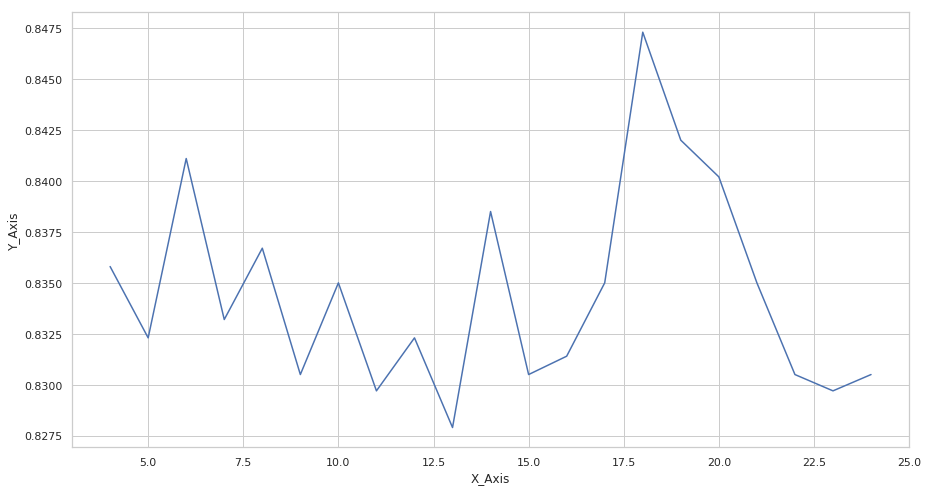

In [0]:
#TRYING DIFFERENT NEIGHBOURS
#Check for different neighbours from 4 to 20
xAxis = list()
yAxis = list()
for i in range(4,25,1):
  knn = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski') #p=2 ,Euclidean distance calculation

  #Fit the model
  knn.fit(data_train, label_train)
  xAxis.append(i)
  #Use the model for pridiction
  y_preds = knn.predict(data_test)
  
  #Model evaluation - check the accuracy score
  knn_accuracy = accuracy_score(label_test,y_preds)
  yAxis.append(round(knn_accuracy,4))
  print('Accuracy score for the KNN model with n_neighbors=', i,":",round(knn_accuracy,4))

linedata = pd.DataFrame({'X_Axis' : xAxis,
                         'Y_Axis' : yAxis})
#print(linedata)
#plot the line graph
fig, ax = plt.subplots(figsize=(15,8))
#sns.set_style("ticks")
sns.set_style("whitegrid")
sns.lineplot(x = 'X_Axis',y = 'Y_Axis', data=linedata,ax=ax)

knn_accuracy = max(yAxis)

## 8.Modelling and Prediction(Logistic Regression)
#### 8(a) Instantiate Logistic Regression
#### 8(b) Fit the model
#### 8(c) Use the model for prediction
#### 8(d) Model Evaluation using Accuracy score

In [0]:
#Instantiate Logistic Regression
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()

#Fit the model
logis.fit(data_train, label_train)

#Use the model for prediction
y_pred = logis.predict(data_test)
print("Instantiated logistic regression, fit the model and complete prediction")

Instantiated logistic regression, fit the model and complete prediction


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
#Model evaluation using Accuracy score
from sklearn.metrics import accuracy_score
logit_accuracy = accuracy_score(label_test,y_pred)
print('Accuracy score for the Logistic model:', logit_accuracy)

Accuracy score for the Logistic model: 0.8172992056487202


## 8.Modelling and Prediction(Decision Tree)
#### 8(a) Instantiate Logistic Regression
#### 8(b) Fit the model
#### 8(c) Use the model for prediction
#### 8(d) Model Evaluation using Accuracy score

In [0]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(random_state = 0)
dtree.fit(data_train, label_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [0]:
from graphviz import Source
graph = Source( tree.export_graphviz(dtree, out_file=None,filled=True, 
                                rounded=True,  
                                special_characters=True, feature_names=temp_wine.columns))
graph.format = 'png'
graph.render('dtree_render',view=True)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.885978 to fit


'dtree_render.png'

In [0]:
#Use the model for prediction
y_pred_tree = dtree.predict(data_test)
print("Instantiated logistic regression, fit the model and complete prediction")

Instantiated logistic regression, fit the model and complete prediction


In [0]:
#Model evaluation using Accuracy score
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(label_test,y_pred_tree)
print('Accuracy score for the Decision Tree model:', dtree_accuracy)

Accuracy score for the Decision Tree model: 0.8305383936451898


Applying __GridsearchCV__ method for __exhaustive search over specified parameter values__ of estimator.
To know more about the different parameters in decision tree classifier, refer the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). <br/>
Below we will apply gridsearch over the following parameters:
- criterion 
- max_depth 
- max_features


In [0]:
# Decision Tree with Gridsearch
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0)


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            

grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(data_train, label_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                         

In [0]:
#use the model for prediction
y_pred_tree_cv = grid_search.predict(data_test)

In [0]:
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(label_test,y_pred_tree_cv)
print('Accuracy score for Decision Tree model using grid search is:', accuracy_score(label_test,y_pred_tree_cv))

Accuracy score for Decision Tree model using grid search is: 0.8323036187113857


In [0]:
#Model evaluation using confustion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(label_test, y_pred_tree_cv))

confusion_matrix.index = ['Actual Poor','Actual Good','Actual Excellent']
confusion_matrix.columns = ['Predicted Poor','Predicted Good','Predicted Excellent']
print(confusion_matrix)

                  Predicted Poor  Predicted Good  Predicted Excellent
Actual Poor                    0               4                    0
Actual Good                    3             800                  101
Actual Excellent               0              82                  143


## 8 Model comparisons using accuracy score

In [0]:
#model8 = pd.DataFrame({
#        'Model'          : ['LogReg_WO-Outliers_&_W-Type-QltyBin-ScaledData', 'kNN_WO-Outliers_&_W-Type-QltyBin-ScaledData'],
#        'Accuracy_score' : [logit_accuracy, knn_accuracy]
#    })
#models = models.append(model8,ignore_index=True)
#models.drop_duplicates(subset = None, keep = 'first', inplace = True) 
#models = models.sort_index(ascending=True)

#models

model8 = pd.DataFrame({
        'ModelName'         : ['Model 8'],
        'Scaled?'           : ['Yes'],
        'Outliers?'         : ['No'],
        'Include Type?'     : ['Yes'],
        'Added Qlty Cat?'   : ['Yes'],
        'Added Wts?'        : ['No'],
        'Logit_score'       : [logit_accuracy],
        'KNN_score'         : [knn_accuracy],
        'DTREE_score'       : [dtree_accuracy]
    })
models = models.append(model8,ignore_index=True)
models.drop_duplicates(subset = None, keep = 'first', inplace = True) 
models.sort_values(by='ModelName', ascending=True)

models

,ModelName,Scaled?,Outliers?,Include Type?,Added Qlty Cat?,Added Wts?,Logit_score,KNN_score,DTREE_score
0,Model 1,No,Yes,No,No,No,0.522308,0.482308,0.585385
1,Model 1A,No,Yes,No,No,Yes,0.441538,0.617692,0.600000
2,Model 2,No,Yes,Yes,No,No,0.517692,0.480800,0.590000
3,Model 2A,No,Yes,Yes,No,Yes,0.433846,0.616200,0.585385
4,Model 3,No,Yes,Yes,Yes,No,0.819231,0.803800,0.845385
5,Model 3A,No,Yes,Yes,Yes,Yes,0.790769,0.870000,0.833846
6,Model 4,No,Yes,No,Yes,No,0.820769,0.804600,0.837692
7,Model 4A,No,Yes,No,Yes,Yes,0.790769,0.870800,0.840769
8,Model 5,No,No,No,No,No,0.545455,0.483700,0.617829
9,Model 5A,No,No,No,No,Yes,0.422771,0.620500,0.590468


## Observation
#### By including the standardised scale data ,type and a new label qaulityclass (segment quality into 3 categories 1-poor, 2-good and 3-excellent) we dont see too much improvement or decrement in accuracy. KNN provided the best accuracy 84% for n = 6

#### Lets us try to add weights and check if it improves the accuracy?.


##8A) Try with added weights for KNN Model , Logistic Regression and Decision Tree - where data is cleaned for outliers , scaled ,add type and add  3 new category to quality and try to predict qualityclass

## 8A. Modelling and prediction(KNN)
#### 8A(a) Instantiate K nearest neighbour Classifier
#### 8A(b) Fit the model
#### 8A(c) Use the model for prediction
#### 8A(d) Model evaluation using accuracy score

In [0]:
#Modelling and prediction
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski',weights='distance') #p=2 ,Euclidean distance calculation with added weights

#Fit the Model
knn.fit(data_train, label_train)

#Use the model for prediction
y_preds = knn.predict(data_test)

#Model evaluation using accuracy score
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(label_test,y_preds)
print('Accuracy score for the KNN model:', knn_accuracy)

Accuracy score for the KNN model: 0.8720211827007943


#### 8A(e)Trying different neighbour (n) values to see if the accuracy increases

Accuracy score for the KNN model with n_neighbors= 4 : 0.8605
Accuracy score for the KNN model with n_neighbors= 5 : 0.8676
Accuracy score for the KNN model with n_neighbors= 6 : 0.8694
Accuracy score for the KNN model with n_neighbors= 7 : 0.872
Accuracy score for the KNN model with n_neighbors= 8 : 0.8729
Accuracy score for the KNN model with n_neighbors= 9 : 0.8747
Accuracy score for the KNN model with n_neighbors= 10 : 0.8738
Accuracy score for the KNN model with n_neighbors= 11 : 0.8764
Accuracy score for the KNN model with n_neighbors= 12 : 0.8756
Accuracy score for the KNN model with n_neighbors= 13 : 0.872
Accuracy score for the KNN model with n_neighbors= 14 : 0.8764
Accuracy score for the KNN model with n_neighbors= 15 : 0.8773
Accuracy score for the KNN model with n_neighbors= 16 : 0.88
Accuracy score for the KNN model with n_neighbors= 17 : 0.8808
Accuracy score for the KNN model with n_neighbors= 18 : 0.8853
Accuracy score for the KNN model with n_neighbors= 19 : 0.8826
Ac

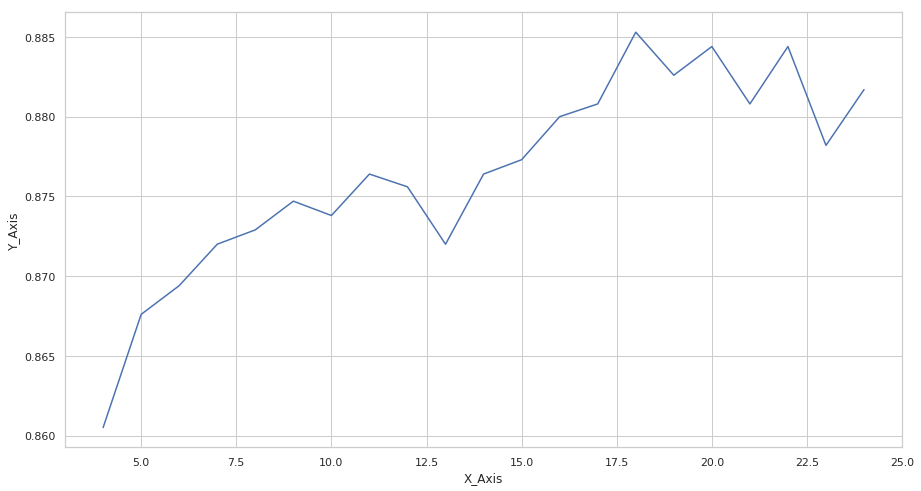

In [0]:
#TRYING DIFFERENT NEIGHBOURS
#Check for different neighbours from 4 to 20
xAxis = list()
yAxis = list()
for i in range(4,25,1):
  knn = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski' ,weights='distance') #p=2 ,Euclidean distance calculation with added weights

  #Fit the model
  knn.fit(data_train, label_train)
  xAxis.append(i)
  #Use the model for pridiction
  y_preds = knn.predict(data_test)
  
  #Model evaluation - check the accuracy score
  knn_accuracy = accuracy_score(label_test,y_preds)
  yAxis.append(round(knn_accuracy,4))
  print('Accuracy score for the KNN model with n_neighbors=', i,":",round(knn_accuracy,4))

linedata = pd.DataFrame({'X_Axis' : xAxis,
                         'Y_Axis' : yAxis})
#print(linedata)
#plot the line graph
fig, ax = plt.subplots(figsize=(15,8))
#sns.set_style("ticks")
sns.set_style("whitegrid")
sns.lineplot(x = 'X_Axis',y = 'Y_Axis', data=linedata,ax=ax)

knn_accuracy = max(yAxis)

## 8A.Modelling and Prediction(Logistic Regression)
#### 8A(a) Instantiate Logistic Regression
#### 8A(b) Fit the model
#### 8A(c) Use the model for prediction
#### 8A(d) Model Evaluation using Accuracy score

In [0]:
#Instantiate Logistic Regression
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression(class_weight='balanced') #with added weights

#Fit the model
logis.fit(data_train, label_train)

#Use the model for prediction
y_pred = logis.predict(data_test)
print("Instantiated logistic regression, fit the model and complete prediction")

Instantiated logistic regression, fit the model and complete prediction


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
#Model evaluation using Accuracy score
from sklearn.metrics import accuracy_score
logit_accuracy = accuracy_score(label_test,y_pred)
print('Accuracy score for the Logistic model:', logit_accuracy)

Accuracy score for the Logistic model: 0.7766990291262136


## 8A.Modelling and Prediction(Decision Tree)
#### 8A(a) Instantiate Logistic Regression
#### 8A(b) Fit the model
#### 8A(c) Use the model for prediction
#### 8A(d) Model Evaluation using Accuracy score

In [0]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(random_state = 0,class_weight='balanced') #with added weights
dtree.fit(data_train, label_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [0]:
from graphviz import Source
graph = Source( tree.export_graphviz(dtree, out_file=None,filled=True, 
                                rounded=True,  
                                special_characters=True, feature_names=temp_wine.columns))
graph.format = 'png'
graph.render('dtree_render',view=True)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.811868 to fit


'dtree_render.png'

In [0]:
#Use the model for prediction
y_pred_tree = dtree.predict(data_test)
print("Instantiated logistic regression, fit the model and complete prediction")

Instantiated logistic regression, fit the model and complete prediction


In [0]:
#Model evaluation using Accuracy score
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(label_test,y_pred_tree)
print('Accuracy score for the Decision Tree model:', dtree_accuracy)

Accuracy score for the Decision Tree model: 0.8367166813768756


Applying __GridsearchCV__ method for __exhaustive search over specified parameter values__ of estimator.
To know more about the different parameters in decision tree classifier, refer the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). <br/>
Below we will apply gridsearch over the following parameters:
- criterion 
- max_depth 
- max_features


In [0]:
# Decision Tree with Gridsearch
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0,class_weight='balanced') #with added weights


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            

grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(data_train, label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                   

In [0]:
#use the model for prediction
y_pred_tree_cv = grid_search.predict(data_test)

In [0]:
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(label_test,y_pred_tree_cv)
print('Accuracy score for Decision Tree model using grid search is:', accuracy_score(label_test,y_pred_tree_cv))

Accuracy score for Decision Tree model using grid search is: 0.8499558693733451


In [0]:
#Model evaluation using confustion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(label_test, y_pred_tree_cv))

#get the quality data
qlty_data = wine_data.qualityclass.unique().tolist()
#print(type(qlty_data))
qlty_data.sort(reverse=False)
#print(qlty_data)
indexName = list()
colName = list()
for quality_no in qlty_data:
  indexName.append('Act ' + str(quality_no))
  colName.append('Pred ' + str(quality_no))
#print(indexName)

#confusion_matrix.index = ['Actual Poor','Actual Good','Actual Excellent']
confusion_matrix.index = indexName
#confusion_matrix.columns = ['Predicted Poor','Predicted Good','Predicted Excellent']
confusion_matrix.columns = colName
print(confusion_matrix)

       Pred 1  Pred 2  Pred 3
Act 1       0       4       0
Act 2       0     825      79
Act 3       0      87     138


## 8A Model comparisons using accuracy score

In [0]:
#model8 = pd.DataFrame({
#        'Model'          : ['LogReg_WO-Outliers_&_W-Type-QltyBin-ScaledData', 'kNN_WO-Outliers_&_W-Type-QltyBin-ScaledData'],
#        'Accuracy_score' : [logit_accuracy, knn_accuracy]
#    })
#models = models.append(model8,ignore_index=True)
#models.drop_duplicates(subset = None, keep = 'first', inplace = True) 
#models = models.sort_index(ascending=True)

#models

model8A = pd.DataFrame({
        'ModelName'         : ['Model 8A'],
        'Scaled?'           : ['Yes'],
        'Outliers?'         : ['No'],
        'Include Type?'     : ['Yes'],
        'Added Qlty Cat?'   : ['Yes'],
        'Added Wts?'        : ['Yes'],
        'Logit_score'       : [logit_accuracy],
        'KNN_score'         : [knn_accuracy],
        'DTREE_score'       : [dtree_accuracy]
    })
models = models.append(model8A,ignore_index=True)
models.drop_duplicates(subset = None, keep = 'first', inplace = True) 
models.sort_values(by='ModelName', ascending=True)

models

,ModelName,Scaled?,Outliers?,Include Type?,Added Qlty Cat?,Added Wts?,Logit_score,KNN_score,DTREE_score
0,Model 1,No,Yes,No,No,No,0.522308,0.482308,0.585385
1,Model 1A,No,Yes,No,No,Yes,0.441538,0.617692,0.600000
2,Model 2,No,Yes,Yes,No,No,0.517692,0.480800,0.590000
3,Model 2A,No,Yes,Yes,No,Yes,0.433846,0.616200,0.585385
4,Model 3,No,Yes,Yes,Yes,No,0.819231,0.803800,0.845385
5,Model 3A,No,Yes,Yes,Yes,Yes,0.790769,0.870000,0.833846
6,Model 4,No,Yes,No,Yes,No,0.820769,0.804600,0.837692
7,Model 4A,No,Yes,No,Yes,Yes,0.790769,0.870800,0.840769
8,Model 5,No,No,No,No,No,0.545455,0.483700,0.617829
9,Model 5A,No,No,No,No,Yes,0.422771,0.620500,0.590468


In [0]:
models.sort_values(by=['Added Qlty Cat?','Added Wts?','Include Type?','Outliers?','ModelName'], ascending=[True,True,True,True,True])


,ModelName,Scaled?,Outliers?,Include Type?,Added Qlty Cat?,Added Wts?,Logit_score,KNN_score,DTREE_score
8,Model 5,No,No,No,No,No,0.545455,0.483700,0.617829
0,Model 1,No,Yes,No,No,No,0.522308,0.482308,0.585385
10,Model 6,No,No,Yes,No,No,0.547220,0.481900,0.599294
2,Model 2,No,Yes,Yes,No,No,0.517692,0.480800,0.590000
9,Model 5A,No,No,No,No,Yes,0.422771,0.620500,0.590468
1,Model 1A,No,Yes,No,No,Yes,0.441538,0.617692,0.600000
11,Model 6A,No,No,Yes,No,Yes,0.429832,0.618700,0.607237
3,Model 2A,No,Yes,Yes,No,Yes,0.433846,0.616200,0.585385
6,Model 4,No,Yes,No,Yes,No,0.820769,0.804600,0.837692
12,Model 7,No,No,Yes,Yes,No,0.807590,0.815500,0.833186


##Observation
####Based on the data available we try the following approaches to see if the model built on these gives a good accuracy.
- Check a Model which doesnt includes type information, keep the outliers, doesnt scale data nor add any weights (due to imbalance data) and see if the KNN, Logistic Regression or Decision Tree -provide good accuracy.
- Check if we add weights but ignore type, keep outliers and use unscaled data.
- Check if accuracy improves if we add type, remove outliers, scale data and add weights for predicting the quality

####After trying all the above it was observed that accuracy could not go beyond 61% even after adding type, removing outliers, standardised data to scale and adding weights.

####The approach is to see if we can bin the class "quality" from 0-10 to 3 major categories 0-2 [poor] ,3-6 [good] and 7-10 [excellent]. and see if the same Model is able to predict the class "quality" now more accurately.

####For the new class (with 3 category) we found that by adding weights , standardised scale data ,including type the accuracy increased and the best was for KNN 88% for n = 16.

####And, The best score for Logistic regression and Decision Tree was model 4 with 82% and Model 8A with 84% respectively.

##Conclusion
####When the class "quality" was binned into 3 categorised into sub category of poor, good and excellent the accuracey improved from 61% to 87%.
####When the class "quality" was binned into 4 categorised into sub category of poor, average,good and excellent the accuracey improved from 61% to 87%.
####Model8A with KNN provides the highest accuracy of 87% with n=7 and hence that is selected.

## 9) Let us Try KNN Model , Logistic Regression and Decision Tree - where data is cleaned for outliers , scaled ,add type and add  4 category to quality and try to predict qualityclass

### Prepare the data
#### Clean the data for outliers from red and white wine
#### Transform data to standard scale  
#### Add the Type column using dummies
#### Add the 4 categores for quality column using lambda and drop quality
#### Train / Test Split and check the shape

In [0]:
#TRY with DATA CLEANING BUT NOT Standardized Data
wine_data = pd.concat([redwine_datacleaned, whitewine_datacleaned], ignore_index=True)

#Get dummies for Type
wine_data = pd.get_dummies(wine_data, columns=['Type'], drop_first=True)
print('Dummies created for Type')

#create the 4 new category
wine_data['qualityclass'] = wine_data.apply(lambda x: 1 if x['quality'] <= 3 else 2 if (x['quality'] > 3 and x['quality'] <= 5) else 3 if (x['quality'] > 5 and x['quality'] <= 7) else 4,axis=1)
print('qualityclass created with 3 categories 1 -poor,2-average, 3 - good and 4 - excellent values')

# Using StandardScaler to standardize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#Remove type after dummification
temp_wine = wine_data.loc[:,wine_data.columns != 'Type']
temp_wine = temp_wine.loc[:,wine_data.columns != 'quality']

#Label the qualityclass column
label = temp_wine.pop('qualityclass')
print('qualityclass label created')


sc.fit(temp_wine)                                                                                 # fit the data to Standardscaler

#wine_scale = temp_wine.copy()
wine_scale = sc.transform(temp_wine)                                                               # transform the data

print('After standardizing our features, the first 5 rows of our data now look like this:\n')   # print the first 5 value after standardization
print(pd.DataFrame(wine_scale, columns=temp_wine.columns).head())                                  # Put it to dataframe                              

Dummies created for Type
qualityclass created with 3 categories 1 -poor,2-average, 3 - good and 4 - excellent values
qualityclass label created
After standardizing our features, the first 5 rows of our data now look like this:

   fixed acidity  volatile acidity  ...   alcohol  Type_White
0       0.230708          2.252033  ... -0.952983   -1.808727
1       0.577700          3.367098  ... -0.615631   -1.808727
2       0.577700          2.623721  ... -0.615631   -1.808727
3       3.527135         -0.349787  ... -0.615631   -1.808727
4       0.230708          2.252033  ... -0.952983   -1.808727

[5 rows x 12 columns]


In [0]:
#Train/Test data and check shape
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(wine_scale, label, test_size = 0.2, random_state = 42)
#data_train, data_test, label_train, label_test = train_test_split(temp_wine, label, test_size = 0.2, random_state = 42)

print('There are {} samples in the training set and {} samples in the test set'.format(data_train.shape[0], data_test.shape[0]))

There are 4531 samples in the training set and 1133 samples in the test set


In [0]:
#wine_scale
#temp_wine.head(10)
wine_data.qualityclass.unique()

array([2, 3, 4, 1])

## 9. Modelling and prediction(KNN)
#### 9(a) Instantiate K nearest neighbour Classifier
#### 9(b) Fit the model
#### 9(c) Use the model for prediction
#### 9(d) Model evaluation using accuracy score

In [0]:
#Modelling and prediction
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski', weights = 'distance') #p=2 ,Euclidean distance calculation with added weights

#Fit the Model
knn.fit(data_train, label_train)

#Use the model for prediction
y_preds = knn.predict(data_test)

#Model evaluation using accuracy score
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(label_test,y_preds)
print('Accuracy score for the KNN model:', knn_accuracy)

Accuracy score for the KNN model: 0.8005295675198588


#### 9(e)Trying different neighbour (n) values to see if the accuracy increases

Accuracy score for the KNN model with n_neighbors= 4 : 0.7855
Accuracy score for the KNN model with n_neighbors= 5 : 0.7891
Accuracy score for the KNN model with n_neighbors= 6 : 0.8005
Accuracy score for the KNN model with n_neighbors= 7 : 0.8005
Accuracy score for the KNN model with n_neighbors= 8 : 0.8049
Accuracy score for the KNN model with n_neighbors= 9 : 0.797
Accuracy score for the KNN model with n_neighbors= 10 : 0.7996
Accuracy score for the KNN model with n_neighbors= 11 : 0.7952
Accuracy score for the KNN model with n_neighbors= 12 : 0.7996
Accuracy score for the KNN model with n_neighbors= 13 : 0.7944
Accuracy score for the KNN model with n_neighbors= 14 : 0.797
Accuracy score for the KNN model with n_neighbors= 15 : 0.7926
Accuracy score for the KNN model with n_neighbors= 16 : 0.7917
Accuracy score for the KNN model with n_neighbors= 17 : 0.7944
Accuracy score for the KNN model with n_neighbors= 18 : 0.8005
Accuracy score for the KNN model with n_neighbors= 19 : 0.8058


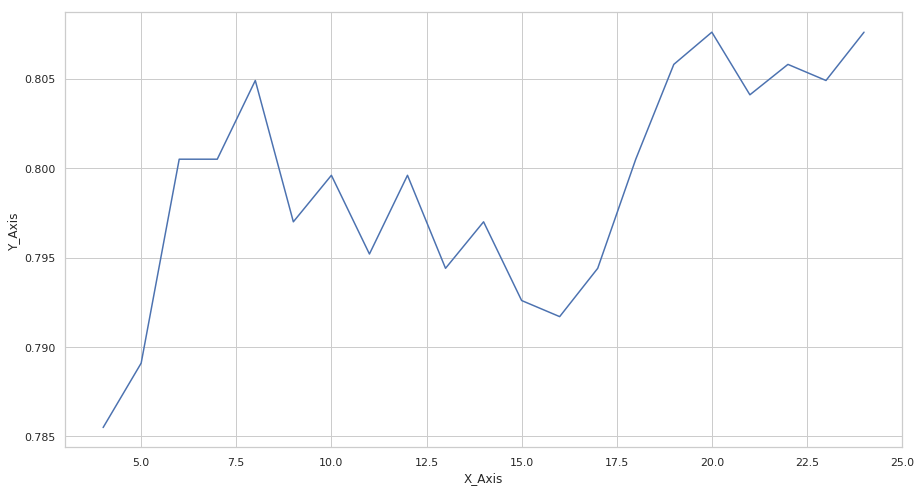

In [0]:
#TRYING DIFFERENT NEIGHBOURS
#Check for different neighbours from 4 to 20
xAxis = list()
yAxis = list()
for i in range(4,25,1):
  knn = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski', weights = 'distance') #p=2 ,Euclidean distance calculation with added weights

  #Fit the model
  knn.fit(data_train, label_train)
  xAxis.append(i)
  #Use the model for pridiction
  y_preds = knn.predict(data_test)
  
  #Model evaluation - check the accuracy score
  knn_accuracy = accuracy_score(label_test,y_preds)
  yAxis.append(round(knn_accuracy,4))
  print('Accuracy score for the KNN model with n_neighbors=', i,":",round(knn_accuracy,4))

linedata = pd.DataFrame({'X_Axis' : xAxis,
                         'Y_Axis' : yAxis})
#print(linedata)
#plot the line graph
fig, ax = plt.subplots(figsize=(15,8))
#sns.set_style("ticks")
sns.set_style("whitegrid")
sns.lineplot(x = 'X_Axis',y = 'Y_Axis', data=linedata,ax=ax)

knn_accuracy = max(yAxis)

## 9.Modelling and Prediction(Logistic Regression)
#### 9(a) Instantiate Logistic Regression
#### 9(b) Fit the model
#### 9(c) Use the model for prediction
#### 9(d) Model Evaluation using Accuracy score

In [0]:
#Instantiate Logistic Regression
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression(class_weight='balanced')

#Fit the model
logis.fit(data_train, label_train)

#Use the model for prediction
y_pred = logis.predict(data_test)
print("Instantiated logistic regression, fit the model and complete prediction")

Instantiated logistic regression, fit the model and complete prediction


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
#Model evaluation using Accuracy score
from sklearn.metrics import accuracy_score
logit_accuracy = accuracy_score(label_test,y_pred)
print('Accuracy score for the Logistic model:', logit_accuracy)

Accuracy score for the Logistic model: 0.6963812886142984


In [0]:
#Model evaluation using confustion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(label_test, y_pred))

#get the quality data
qlty_data = wine_data.qualityclass.unique().tolist()
#print(type(qlty_data))
qlty_data.sort(reverse=False)
#print(qlty_data)
indexName = list()
colName = list()
for quality_no in qlty_data:
  indexName.append('Act ' + str(quality_no))
  colName.append('Pred ' + str(quality_no))
#print(indexName)

#confusion_matrix.index = ['Actual Poor','Actual Good','Actual Excellent']
confusion_matrix.index = indexName
#confusion_matrix.columns = ['Predicted Poor','Predicted Good','Predicted Excellent']
confusion_matrix.columns = colName
print(confusion_matrix)

       Pred 1  Pred 2  Pred 3  Pred 4
Act 1       0       3       1       0
Act 2      22     236     120       2
Act 3      24     133     550      11
Act 4       0       5      23       3


## 9.Modelling and Prediction(Decision Tree)
#### 9(a) Instantiate Logistic Regression
#### 9(b) Fit the model
#### 9(c) Use the model for prediction
#### 9(d) Model Evaluation using Accuracy score

In [0]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(random_state = 0,class_weight='balanced')
dtree.fit(data_train, label_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [0]:
#Use the model for prediction
y_pred_tree = dtree.predict(data_test)
print("Instantiated logistic regression, fit the model and complete prediction")

Instantiated logistic regression, fit the model and complete prediction


In [0]:
#Model evaluation using Accuracy score
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(label_test,y_pred_tree)
print('Accuracy score for the Decision Tree model:', dtree_accuracy)

Accuracy score for the Decision Tree model: 0.7405119152691968


In [0]:
#Model evaluation using confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(label_test, y_pred_tree))

#get the quality data
qlty_data = wine_data.qualityclass.unique().tolist()
#print(type(qlty_data))
qlty_data.sort(reverse=False)
#print(qlty_data)
indexName = list()
colName = list()
for quality_no in qlty_data:
  indexName.append('Act ' + str(quality_no))
  colName.append('Pred ' + str(quality_no))
#print(indexName)

#confusion_matrix.index = ['Actual Poor','Actual Good','Actual Excellent']
confusion_matrix.index = indexName
#confusion_matrix.columns = ['Predicted Poor','Predicted Good','Predicted Excellent']
confusion_matrix.columns = colName
print(confusion_matrix)

       Pred 1  Pred 2  Pred 3  Pred 4
Act 1       0       4       0       0
Act 2       2     255     122       1
Act 3       0     115     569      34
Act 4       0       1      15      15


#### 9(e) Applying __GridsearchCV__ method for __exhaustive search over specified parameter values__ of estimator.

Below we will apply gridsearch over the following parameters:
- criterion 
- max_depth 
- max_features


In [0]:
# Decision Tree with Gridsearch
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0, class_weight='balanced')


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            

grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(data_train, label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                   

In [0]:
#use the model for prediction
y_pred_tree_cv = grid_search.predict(data_test)

In [0]:
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(label_test,y_pred_tree_cv)
print('Accuracy score for Decision Tree model using grid search is:', accuracy_score(label_test,y_pred_tree_cv))

Accuracy score for Decision Tree model using grid search is: 0.7449249779346867


In [0]:
#Model evaluation using confustion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(label_test, y_pred_tree_cv))

#get the quality data
qlty_data = wine_data.qualityclass.unique().tolist()
#print(type(qlty_data))
qlty_data.sort(reverse=False)
#print(qlty_data)
indexName = list()
colName = list()
for quality_no in qlty_data:
  indexName.append('Act ' + str(quality_no))
  colName.append('Pred ' + str(quality_no))
#print(indexName)

#confusion_matrix.index = ['Actual Poor','Actual Good','Actual Excellent']
confusion_matrix.index = indexName
#confusion_matrix.columns = ['Predicted Poor','Predicted Good','Predicted Excellent']
confusion_matrix.columns = colName
print(confusion_matrix)

       Pred 1  Pred 2  Pred 3  Pred 4
Act 1       0       2       2       0
Act 2       2     262     113       3
Act 3       0     124     566      28
Act 4       0       1      14      16


## 9.Modelling and Prediction(Random Forrest)
#### 9(a) Instantiate Random Forrest
#### 9(b) Fit the model
#### 9(c) Use the model for prediction
#### 9(d) Model Evaluation using Accuracy score

In [0]:
# Random Forrest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

randaom_forrest_classifier = RandomForestClassifier(random_state = 1,n_estimators=20, class_weight='balanced')
randaom_forrest_classifier.fit(data_train, label_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=20, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)

In [0]:
#use the model for prediction
y_pred_rndforrest = randaom_forrest_classifier.predict(data_test)

from sklearn.metrics import accuracy_score
rndforrest_accuracy = accuracy_score(label_test,y_pred_rndforrest)
print('Accuracy score for Random Forrest model using grid search is:', rndforrest_accuracy)

Accuracy score for Random Forrest model using grid search is: 0.8049426301853486


In [0]:
#Model evaluation using confustion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(label_test, y_pred_rndforrest))

#get the quality data
qlty_data = wine_data.qualityclass.unique().tolist()
#print(type(qlty_data))
qlty_data.sort(reverse=False)
#print(qlty_data)
indexName = list()
colName = list()
for quality_no in qlty_data:
  indexName.append('Act ' + str(quality_no))
  colName.append('Pred ' + str(quality_no))
#print(indexName)

#confusion_matrix.index = ['Actual Poor','Actual Good','Actual Excellent']
confusion_matrix.index = indexName
#confusion_matrix.columns = ['Predicted Poor','Predicted Good','Predicted Excellent']
confusion_matrix.columns = colName
print(confusion_matrix)

       Pred 1  Pred 2  Pred 3  Pred 4
Act 1       0       4       0       0
Act 2       0     275     105       0
Act 3       0      93     625       0
Act 4       0       0      19      12


## 9 Model comparisons using accuracy score

In [0]:
#model8 = pd.DataFrame({
#        'Model'          : ['LogReg_WO-Outliers_&_W-Type-QltyBin-ScaledData', 'kNN_WO-Outliers_&_W-Type-QltyBin-ScaledData'],
#        'Accuracy_score' : [logit_accuracy, knn_accuracy]
#    })
#models = models.append(model8,ignore_index=True)
#models.drop_duplicates(subset = None, keep = 'first', inplace = True) 
#models = models.sort_index(ascending=True)

#models

model9 = pd.DataFrame({
        'ModelName'         : ['Model 9'],
        'Scaled?'           : ['Yes'],
        'Outliers?'         : ['No'],
        'Include Type?'     : ['Yes'],
        'Added Qlty Cat?'   : ['Yes'],
        'Added Wts?'        : ['Yes'],
        'Logit_score'       : [logit_accuracy],
        'KNN_score'         : [knn_accuracy],
        'DTREE_score'       : [dtree_accuracy],
        'RndFor_score'      : [rndforrest_accuracy]
    })
#models = models.append(model9,ignore_index=True)
#models.drop_duplicates(subset = None, keep = 'first', inplace = True) 
#models.sort_values(by='ModelName', ascending=True)

model9

,ModelName,Scaled?,Outliers?,Include Type?,Added Qlty Cat?,Added Wts?,Logit_score,KNN_score,DTREE_score,RndFor_score
0,Model 9,Yes,No,Yes,Yes,Yes,0.696381,0.8076,0.744925,0.804943


## Observation
#### By increasing qaulityclass (segment quality into 4 categories 1-poor, 2-moderate,3-good and 4-excellent) we dont see a decrement in accuracy. KNN & Random Forrest provided the best accuracy 80% for n = 6 and n_estimator =20.

#### This means as we increase the bin size the accuracy of prediction seems to drop. Hence we retain the bin to 3 categories of poor, good and excellent.


## 10) Let us Try KNN Model , Logistic Regression , Decision Tree and Random Forrest  &  Try to predict type of wine(Red/White)

### Prepare the data
#### Clean the data for outliers from red and white wine
#### Transform data to standard scale  
#### Add the Type column using dummies
#### Add the 4 categores for quality column using lambda and drop quality
#### Train / Test Split and check the shape

In [0]:
#TRY with DATA CLEANING BUT NOT Standardized Data
#wine_data = pd.concat([redwine_datacleaned, whitewine_datacleaned], ignore_index=True)
wine_data = pd.concat([redwine_data, whitewine_data], ignore_index=True)

#Get dummies for Type
wine_data = pd.get_dummies(wine_data, columns=['Type'], drop_first=True)
print('Dummies created for Type')

#create the 4 new category
wine_data['qualityclass'] = wine_data.apply(lambda x: 1 if x['quality'] <= 3 else 2 if (x['quality'] > 3 and x['quality'] <= 5) else 3 if (x['quality'] > 5 and x['quality'] <= 7) else 4,axis=1)
print('qualityclass created with 3 categories 1 -poor,2-average, 3 - good and 4 - excellent values')

# Using StandardScaler to standardize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#Remove type after dummification
temp_wine = wine_data.loc[:,wine_data.columns != 'Type']
temp_wine = temp_wine.loc[:,temp_wine.columns != 'quality']
temp_wine = temp_wine.loc[:,temp_wine.columns != 'qualityclass']

print(temp_wine.head(10))

#Label the qualityclass column
label = temp_wine.pop('Type_White')
print('TypeWhite label created')


sc.fit(temp_wine)                                                                                 # fit the data to Standardscaler

wine_scale = temp_wine.copy()
wine_scale = sc.transform(temp_wine)                                                               # transform the data

print('After standardizing our features, the first 5 rows of our data now look like this:\n')   # print the first 5 value after standardization
print(pd.DataFrame(wine_scale, columns=temp_wine.columns).head())                                  # Put it to dataframe                              

Dummies created for Type
qualityclass created with 3 categories 1 -poor,2-average, 3 - good and 4 - excellent values
   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  Type_White
0            7.4              0.70         0.00  ...       0.56      9.4           0
1            7.8              0.88         0.00  ...       0.68      9.8           0
2            7.8              0.76         0.04  ...       0.65      9.8           0
3           11.2              0.28         0.56  ...       0.58      9.8           0
4            7.4              0.70         0.00  ...       0.56      9.4           0
5            7.4              0.66         0.00  ...       0.56      9.4           0
6            7.9              0.60         0.06  ...       0.46      9.4           0
7            7.3              0.65         0.00  ...       0.47     10.0           0
8            7.8              0.58         0.02  ...       0.57      9.5           0
9            7.5              0.5

In [0]:
#Train/Test data and check shape
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(wine_scale, label, test_size = 0.2, random_state = 42)
#data_train, data_test, label_train, label_test = train_test_split(temp_wine, label, test_size = 0.2, random_state = 42)

print('There are {} samples in the training set and {} samples in the test set'.format(data_train.shape[0], data_test.shape[0]))

There are 5197 samples in the training set and 1300 samples in the test set


In [0]:
#wine_scale
#temp_wine.head(10)
wine_data.qualityclass.unique()

array([2, 3, 4, 1])

## 10. Modelling and prediction(KNN)
#### 10(a) Instantiate K nearest neighbour Classifier
#### 10(b) Fit the model
#### 10(c) Use the model for prediction
#### 10(d) Model evaluation using accuracy score

In [0]:
#Modelling and prediction
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski', weights = 'distance') #p=2 ,Euclidean distance calculation with added weights

#Fit the Model
knn.fit(data_train, label_train)

#Use the model for prediction
y_preds = knn.predict(data_test)

#Model evaluation using accuracy score
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(label_test,y_preds)
print('Accuracy score for the KNN model:', knn_accuracy)

Accuracy score for the KNN model: 0.9915384615384616


#### 10(e)Model evaluation using confusion matrix

In [0]:
#Model evaluation using confustion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(label_test, y_preds))

#get the quality data
qlty_data = wine_data.Type_White.unique().tolist()
#print(type(qlty_data))
qlty_data.sort(reverse=False)
#print(qlty_data)
indexName = list()
colName = list()
for quality_no in qlty_data:
  if quality_no ==0 :
    indexName.append('Act Red' + str(quality_no))
    colName.append('Pred Red' + str(quality_no))
  else:
    indexName.append('Act White' + str(quality_no))
    colName.append('Pred White' + str(quality_no))
  
#print(indexName)

#confusion_matrix.index = ['Actual Poor','Actual Good','Actual Excellent']
confusion_matrix.index = indexName
#confusion_matrix.columns = ['Predicted Poor','Predicted Good','Predicted Excellent']
confusion_matrix.columns = colName
print(confusion_matrix)

            Pred Red0  Pred White1
Act Red0          336            5
Act White1          6          953


#### 10(e)Trying different neighbour (n) values to see if the accuracy increases

Accuracy score for the KNN model with n_neighbors= 4 : 0.9923
Accuracy score for the KNN model with n_neighbors= 5 : 0.9915
Accuracy score for the KNN model with n_neighbors= 6 : 0.9915
Accuracy score for the KNN model with n_neighbors= 7 : 0.9915
Accuracy score for the KNN model with n_neighbors= 8 : 0.9915
Accuracy score for the KNN model with n_neighbors= 9 : 0.9908
Accuracy score for the KNN model with n_neighbors= 10 : 0.9915
Accuracy score for the KNN model with n_neighbors= 11 : 0.9915
Accuracy score for the KNN model with n_neighbors= 12 : 0.9915
Accuracy score for the KNN model with n_neighbors= 13 : 0.99
Accuracy score for the KNN model with n_neighbors= 14 : 0.9908
Accuracy score for the KNN model with n_neighbors= 15 : 0.9892
Accuracy score for the KNN model with n_neighbors= 16 : 0.9892
Accuracy score for the KNN model with n_neighbors= 17 : 0.9892
Accuracy score for the KNN model with n_neighbors= 18 : 0.9892
Accuracy score for the KNN model with n_neighbors= 19 : 0.9892


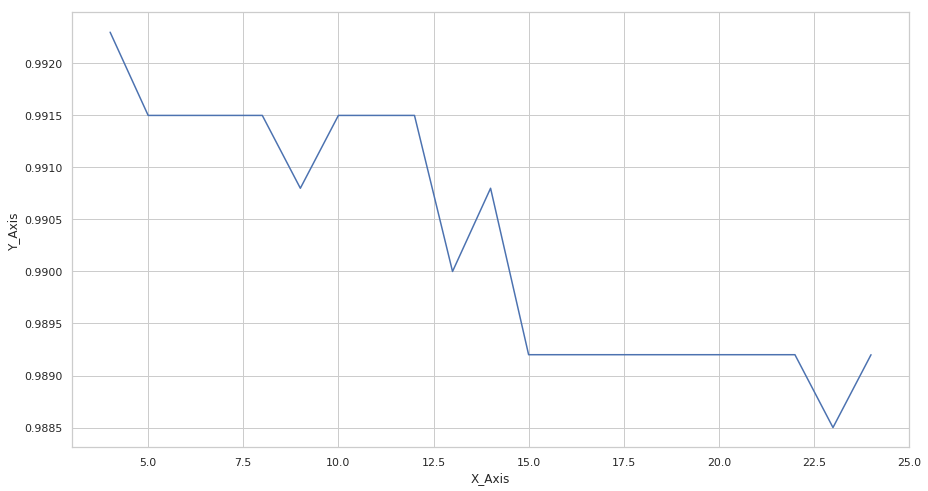

In [0]:
#TRYING DIFFERENT NEIGHBOURS
#Check for different neighbours from 4 to 20
xAxis = list()
yAxis = list()
for i in range(4,25,1):
  knn = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski', weights = 'distance') #p=2 ,Euclidean distance calculation with added weights

  #Fit the model
  knn.fit(data_train, label_train)
  xAxis.append(i)
  #Use the model for pridiction
  y_preds = knn.predict(data_test)
  
  #Model evaluation - check the accuracy score
  knn_accuracy = accuracy_score(label_test,y_preds)
  yAxis.append(round(knn_accuracy,4))
  print('Accuracy score for the KNN model with n_neighbors=', i,":",round(knn_accuracy,4))

linedata = pd.DataFrame({'X_Axis' : xAxis,
                         'Y_Axis' : yAxis})
#print(linedata)
#plot the line graph
fig, ax = plt.subplots(figsize=(15,8))
#sns.set_style("ticks")
sns.set_style("whitegrid")
sns.lineplot(x = 'X_Axis',y = 'Y_Axis', data=linedata,ax=ax)

knn_accuracy = max(yAxis)

## 10.Modelling and Prediction(Logistic Regression)
#### 10(a) Instantiate Logistic Regression
#### 10(b) Fit the model
#### 10(c) Use the model for prediction
#### 10(d) Model Evaluation using Accuracy score

In [0]:
#Instantiate Logistic Regression
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression(class_weight='balanced')

#Fit the model
logis.fit(data_train, label_train)

#Use the model for prediction
y_pred = logis.predict(data_test)
print("Instantiated logistic regression, fit the model and complete prediction")

Instantiated logistic regression, fit the model and complete prediction


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
#Model evaluation using Accuracy score
from sklearn.metrics import accuracy_score
logit_accuracy = accuracy_score(label_test,y_pred)
print('Accuracy score for the Logistic model:', logit_accuracy)

Accuracy score for the Logistic model: 0.9892307692307692


In [0]:
#Model evaluation using confustion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(label_test, y_pred))

#get the quality data
qlty_data = wine_data.Type_White.unique().tolist()
#print(type(qlty_data))
qlty_data.sort(reverse=False)
#print(qlty_data)
indexName = list()
colName = list()
for quality_no in qlty_data:
  if quality_no ==0 :
    indexName.append('Act Red' + str(quality_no))
    colName.append('Pred Red' + str(quality_no))
  else:
    indexName.append('Act White' + str(quality_no))
    colName.append('Pred White' + str(quality_no))
  
#print(indexName)

#confusion_matrix.index = ['Actual Poor','Actual Good','Actual Excellent']
confusion_matrix.index = indexName
#confusion_matrix.columns = ['Predicted Poor','Predicted Good','Predicted Excellent']
confusion_matrix.columns = colName
print(confusion_matrix)

            Pred Red0  Pred White1
Act Red0          336            5
Act White1          9          950


## 10.Modelling and Prediction(Decision Tree)
#### 10(a) Instantiate Logistic Regression
#### 10(b) Fit the model
#### 10(c) Use the model for prediction
#### 10(d) Model Evaluation using Accuracy score

In [0]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(random_state = 0,class_weight='balanced')
dtree.fit(data_train, label_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [0]:
#Use the model for prediction
y_pred_tree = dtree.predict(data_test)
print("Instantiated decision tree, fit the model and complete prediction")

Instantiated decision tree, fit the model and complete prediction


In [0]:
#Model evaluation using Accuracy score
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(label_test,y_pred_tree)
print('Accuracy score for the Decision Tree model:', dtree_accuracy)

Accuracy score for the Decision Tree model: 0.9830769230769231


In [0]:
#Model evaluation using confustion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(label_test, y_pred_tree))

#get the quality data
qlty_data = wine_data.Type_White.unique().tolist()
#print(type(qlty_data))
qlty_data.sort(reverse=False)
#print(qlty_data)
indexName = list()
colName = list()
for quality_no in qlty_data:
  if quality_no ==0 :
    indexName.append('Act Red' + str(quality_no))
    colName.append('Pred Red' + str(quality_no))
  else:
    indexName.append('Act White' + str(quality_no))
    colName.append('Pred White' + str(quality_no))
  
#print(indexName)

#confusion_matrix.index = ['Actual Poor','Actual Good','Actual Excellent']
confusion_matrix.index = indexName
#confusion_matrix.columns = ['Predicted Poor','Predicted Good','Predicted Excellent']
confusion_matrix.columns = colName
print(confusion_matrix)

            Pred Red0  Pred White1
Act Red0          329           12
Act White1         10          949


#### 10(e) Applying __GridsearchCV__ method for __exhaustive search over specified parameter values__ of estimator.

Below we will apply gridsearch over the following parameters:
- criterion 
- max_depth 
- max_features


In [0]:
# Decision Tree with Gridsearch
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0, class_weight='balanced')


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            

grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(data_train, label_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                   

In [0]:
#use the model for prediction
y_pred_tree_cv = grid_search.predict(data_test)

In [0]:
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(label_test,y_pred_tree_cv)
print('Accuracy score for Decision Tree model using grid search is:', accuracy_score(label_test,y_pred_tree_cv))

Accuracy score for Decision Tree model using grid search is: 0.9869230769230769


In [0]:
#Model evaluation using confustion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(label_test, y_pred_tree_cv))

#get the quality data
qlty_data = wine_data.Type_White.unique().tolist()
#print(type(qlty_data))
qlty_data.sort(reverse=False)
#print(qlty_data)
indexName = list()
colName = list()
for quality_no in qlty_data:
  if quality_no ==0 :
    indexName.append('Act Red' + str(quality_no))
    colName.append('Pred Red' + str(quality_no))
  else:
    indexName.append('Act White' + str(quality_no))
    colName.append('Pred White' + str(quality_no))
  
#print(indexName)


#confusion_matrix.index = ['Actual Poor','Actual Good','Actual Excellent']
confusion_matrix.index = indexName
#confusion_matrix.columns = ['Predicted Poor','Predicted Good','Predicted Excellent']
confusion_matrix.columns = colName
print(confusion_matrix)

            Pred Red0  Pred White1
Act Red0          330           11
Act White1          6          953


## 10.Modelling and Prediction(Random Forrest)
#### 10(a) Instantiate Random Forrest
#### 10(b) Fit the model
#### 10(c) Use the model for prediction
#### 10(d) Model Evaluation using Accuracy score

In [0]:
# Random Forrest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

randaom_forrest_classifier = RandomForestClassifier(random_state = 1,n_estimators=20, class_weight='balanced')
randaom_forrest_classifier.fit(data_train, label_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=20, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)

In [0]:
#use the model for prediction
y_pred_rndforrest = randaom_forrest_classifier.predict(data_test)

from sklearn.metrics import accuracy_score
rndforrest_accuracy = accuracy_score(label_test,y_pred_rndforrest)
print('Accuracy score for Random Forrest model using grid search is:', rndforrest_accuracy)

Accuracy score for Random Forrest model using grid search is: 0.9953846153846154


In [0]:
#Model evaluation using confustion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(label_test, y_pred_rndforrest))

#get the quality data
qlty_data = wine_data.Type_White.unique().tolist()
#print(type(qlty_data))
qlty_data.sort(reverse=False)
#print(qlty_data)
indexName = list()
colName = list()
for quality_no in qlty_data:
  if quality_no ==0 :
    indexName.append('Act Red' + str(quality_no))
    colName.append('Pred Red' + str(quality_no))
  else:
    indexName.append('Act White' + str(quality_no))
    colName.append('Pred White' + str(quality_no))
  
#print(indexName)


#confusion_matrix.index = ['Actual Poor','Actual Good','Actual Excellent']
confusion_matrix.index = indexName
#confusion_matrix.columns = ['Predicted Poor','Predicted Good','Predicted Excellent']
confusion_matrix.columns = colName
print(confusion_matrix)

            Pred Red0  Pred White1
Act Red0          336            5
Act White1          1          958


####10(e) Trying different estimators to see if accuracy improves

Accuracy score for the Random Forrest model with n_estimators= 15 : 0.9931
Accuracy score for the Random Forrest model with n_estimators= 20 : 0.9954
Accuracy score for the Random Forrest model with n_estimators= 25 : 0.9946
Accuracy score for the Random Forrest model with n_estimators= 30 : 0.9962
Accuracy score for the Random Forrest model with n_estimators= 35 : 0.9946
Accuracy score for the Random Forrest model with n_estimators= 40 : 0.9954
Accuracy score for the Random Forrest model with n_estimators= 45 : 0.9946
Accuracy score for the Random Forrest model with n_estimators= 50 : 0.9954
Accuracy score for the Random Forrest model with n_estimators= 55 : 0.9954
Accuracy score for the Random Forrest model with n_estimators= 60 : 0.9954
Accuracy score for the Random Forrest model with n_estimators= 65 : 0.9954
Accuracy score for the Random Forrest model with n_estimators= 70 : 0.9954
Accuracy score for the Random Forrest model with n_estimators= 75 : 0.9954
Accuracy score for the Ra

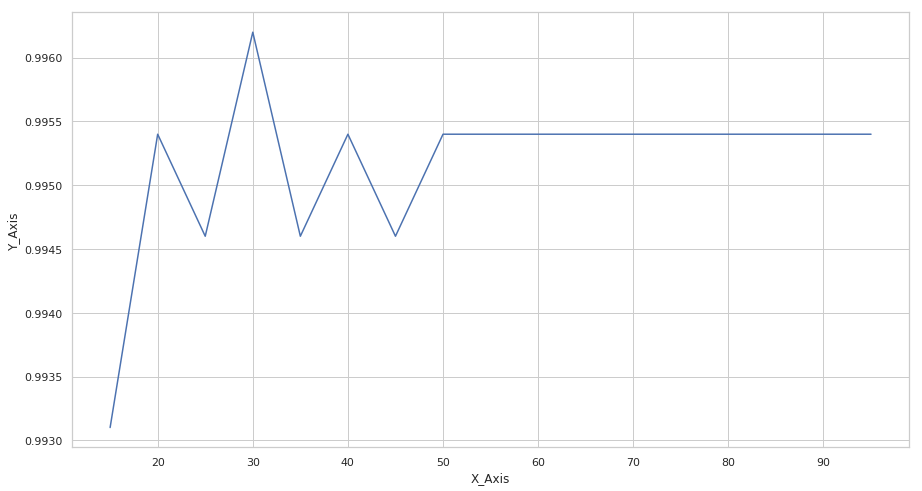

In [0]:
#TRYING DIFFERENT n estimator
#Check for different estimator from 15 to 100
xAxis = list()
yAxis = list()
for i in range(15,100,5):
  rndforrest = RandomForestClassifier(random_state = 1,n_estimators=i, class_weight='balanced')

  #Fit the model
  rndforrest.fit(data_train, label_train)
  xAxis.append(i)
  #Use the model for pridiction
  y_preds = rndforrest.predict(data_test)
  
  #Model evaluation - check the accuracy score
  rndforrest_accuracy = accuracy_score(label_test,y_preds)
  yAxis.append(round(rndforrest_accuracy,4))
  print('Accuracy score for the Random Forrest model with n_estimators=', i,":",round(rndforrest_accuracy,4))

linedata = pd.DataFrame({'X_Axis' : xAxis,
                         'Y_Axis' : yAxis})
#print(linedata)
#plot the line graph
fig, ax = plt.subplots(figsize=(15,8))
#sns.set_style("ticks")
sns.set_style("whitegrid")
sns.lineplot(x = 'X_Axis',y = 'Y_Axis', data=linedata,ax=ax)

rndforrest_accuracy = max(yAxis)

In [0]:
#Model evaluation using confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(label_test, y_pred_rndforrest))

#get the quality data
qlty_data = wine_data.Type_White.unique().tolist()
#print(type(qlty_data))
qlty_data.sort(reverse=False)
#print(qlty_data)
indexName = list()
colName = list()
for quality_no in qlty_data:
  if quality_no ==0 :
    indexName.append('Act Red' + str(quality_no))
    colName.append('Pred Red' + str(quality_no))
  else:
    indexName.append('Act White' + str(quality_no))
    colName.append('Pred White' + str(quality_no))
  
#print(indexName)

#confusion_matrix.index = ['Actual Poor','Actual Good','Actual Excellent']
confusion_matrix.index = indexName
#confusion_matrix.columns = ['Predicted Poor','Predicted Good','Predicted Excellent']
confusion_matrix.columns = colName
print(confusion_matrix)

            Pred Red0  Pred White1
Act Red0          336            5
Act White1          1          958


## 10 Model comparisons using accuracy score

In [0]:
#model8 = pd.DataFrame({
#        'Model'          : ['LogReg_WO-Outliers_&_W-Type-QltyBin-ScaledData', 'kNN_WO-Outliers_&_W-Type-QltyBin-ScaledData'],
#        'Accuracy_score' : [logit_accuracy, knn_accuracy]
#    })
#models = models.append(model8,ignore_index=True)
#models.drop_duplicates(subset = None, keep = 'first', inplace = True) 
#models = models.sort_index(ascending=True)

#models

model10 = pd.DataFrame({
        'ModelName'         : ['Model 10'],
        'Scaled?'           : ['Yes'],
        'Outliers?'         : ['Yes'],
        'Include Type?'     : ['Yes'],
        'Added Qlty Cat?'   : ['Yes'],
        'Added Wts?'        : ['Yes'],
        'Logit_score'       : [logit_accuracy],
        'KNN_score'         : [knn_accuracy],
        'DTREE_score'       : [dtree_accuracy],
        'RndFor_score'      : [rndforrest_accuracy]
    })
#models = models.append(model9,ignore_index=True)
#models.drop_duplicates(subset = None, keep = 'first', inplace = True) 
#models.sort_values(by='ModelName', ascending=True)

model10

,ModelName,Scaled?,Outliers?,Include Type?,Added Qlty Cat?,Added Wts?,Logit_score,KNN_score,DTREE_score,RndFor_score
0,Model 10,Yes,Yes,Yes,Yes,Yes,0.989231,0.9923,0.986923,0.9962


## Observation
#### When we change the class to type of wine and do the prediction. We can see that since there are only 2 types of wine the accuracy of the prediction increased to 99.5%. for random forrest and almost the same wiht other models as well. Hence, we can see that as the bin size increases the prediction of accuracy decreases.

#### For future consideration we can also try KMEAN clustering to determine a new label and then try a prediction on that. 